# Future ENSO impact on MDB Rainfall Risk

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
from scipy.stats import pearsonr
from calendar import month_abbr
import regionmask
import pandas as pd
import geopandas as gp
import scipy.stats as stats
import dask
import bottleneck
import dask.diagnostics
dask.diagnostics.ProgressBar().register()

In [2]:
from dask.distributed import Client  
client = Client()
client

<Client: 'tcp://127.0.0.1:35205' processes=7 threads=28, memory=251.19 GiB>

## Import Data

### SST (Nino3.4 | #ens | El Nino year | La Nina year)

In [3]:
# CESM2
nino34_CESM2_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_CESM2_S_O_N.nc').tos
ens_num_CESM2 = len(nino34_CESM2_S_O_N)
elnino_year_CESM2 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CESM2.npy',allow_pickle=True)
lanina_year_CESM2 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CESM2.npy',allow_pickle=True)

In [4]:
# GFDL_ESM2M
nino34_GFDL_E_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_GFDL_E_S_O_N.nc').tos
ens_num_GFDL_E = len(nino34_GFDL_E_S_O_N)
elnino_year_GFDL_E = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_GFDL_E.npy',allow_pickle=True)
lanina_year_GFDL_E = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_GFDL_E.npy',allow_pickle=True)

In [5]:
# GFDL_SPEAR_MED
nino34_GFDL_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_GFDL_S_O_N.nc').tos
ens_num_GFDL = len(nino34_GFDL_S_O_N)
elnino_year_GFDL = np.load('/g/data/w97/ah3693-2/Project_with_Nicola/elnino_year_GFDL.npy',allow_pickle=True)
lanina_year_GFDL = np.load('/g/data/w97/ah3693-2/Project_with_Nicola/lanina_year_GFDL.npy',allow_pickle=True)

In [6]:
# MIROC6
nino34_MIROC6_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_MIROC6_S_O_N.nc').tos
ens_num_MIROC6 = len(nino34_MIROC6_S_O_N)
elnino_year_MIROC6 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_MIROC6.npy',allow_pickle=True)
lanina_year_MIROC6 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_MIROC6.npy',allow_pickle=True)

In [7]:
# MPI_GE_CMIP6
nino34_MPI_GE_CMIP6_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_MPI_GE_CMIP6_S_O_N.nc').tos
ens_num_MPI_GE_CMIP6 = len(nino34_MPI_GE_CMIP6_S_O_N)
elnino_year_MPI_GE_CMIP6 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_MPI_GE_CMIP6.npy',allow_pickle=True)
lanina_year_MPI_GE_CMIP6 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_MPI_GE_CMIP6.npy',allow_pickle=True)

In [8]:
# ACCESS
nino34_ACCESS_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_ACCESS_S_O_N.nc').tos
ens_num_ACCESS = len(nino34_ACCESS_S_O_N)
elnino_year_ACCESS = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_ACCESS.npy',allow_pickle=True)
lanina_year_ACCESS = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_ACCESS.npy',allow_pickle=True)

In [9]:
# CanESM5
nino34_CanESM5_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_CanESM5_S_O_N.nc').tos
ens_num_CanESM5 = len(nino34_CanESM5_S_O_N)
elnino_year_CanESM5 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CanESM5.npy',allow_pickle=True)
lanina_year_CanESM5 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CanESM5.npy',allow_pickle=True)

In [10]:
# CESM1
nino34_CESM1_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_CESM1_S_O_N.nc').tos
ens_num_CESM1 = len(nino34_CESM1_S_O_N)
elnino_year_CESM1 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CESM1.npy',allow_pickle=True)
lanina_year_CESM1 = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CESM1.npy',allow_pickle=True)

In [11]:
# CSIRO
nino34_CSIRO_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_CSIRO_S_O_N.nc').tos
ens_num_CSIRO = len(nino34_CSIRO_S_O_N)
elnino_year_CSIRO = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CSIRO.npy',allow_pickle=True)
lanina_year_CSIRO = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CSIRO.npy',allow_pickle=True)

In [12]:
# MPI_GE
nino34_MPI_GE_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_MPI_GE_S_O_N.nc').tos.squeeze()
ens_num_MPI_GE = len(nino34_MPI_GE_S_O_N)
elnino_year_MPI_GE = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_MPI_GE.npy',allow_pickle=True)
lanina_year_MPI_GE = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_MPI_GE.npy',allow_pickle=True)

In [13]:
# Observation 1921-2000 / 1900 - 2022
nino34_obs_S_O_N = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/nino34_obs_S_O_N.nc').tos
elnino_year_obs = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_obs.npy',allow_pickle=True)
lanina_year_obs = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_obs.npy',allow_pickle=True)

### Rainfall (S_O_N precip in MDB)

In [15]:
# Rainfall
NRM_clusters = '/g/data/w97/ah3693-2/Honours/NRM_clusters.zip'
NRM = gp.read_file('zip://'+NRM_clusters)

def MDB_precip_S_O_N(precip_anom, time_factor = 3600*24*91/3):
    lon = precip_anom.sel(lon = slice(110,160), lat = slice(-45,-5)).lon
    lat = precip_anom.sel(lon = slice(110,160), lat = slice(-45,-5)).lat
    NRMmask = regionmask.mask_3D_geopandas(NRM,lon,lat)
    NRM_precip = precip_anom.sel(lon = slice(110,160), lat = slice(-45,-5)).where(NRMmask)
    MDB_precip = NRM_precip.sel(region = [0,2]).mean(dim=['lat','lon','region']).compute()
    MDB_precip_S_O_N = MDB_precip.sel(time = MDB_precip.time.dt.month.isin([9, 10, 11]))*time_factor
    return MDB_precip_S_O_N

In [16]:
# CESM2
pr_CESM2_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_CESM2_regrid_anom.nc').pr
MDB_precip_CESM2_S_O_N = MDB_precip_S_O_N(pr_CESM2_regrid_anom, time_factor = 1000*3600*24*91/3)

In [17]:
# GFDL_ESM2M
pr_GFDL_E_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_GFDL_E_regrid_anom.nc').pr
MDB_precip_GFDL_E_S_O_N = MDB_precip_S_O_N(pr_GFDL_E_regrid_anom)

In [18]:
# GFDL_SPEAR_MED
pr_GFDL_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_GFDL_regrid_anom.nc').pr
MDB_precip_GFDL_S_O_N = MDB_precip_S_O_N(pr_GFDL_regrid_anom)

In [19]:
# MIROC6
pr_MIROC6_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_MIROC6_regrid_anom.nc').pr
MDB_precip_MIROC6_S_O_N = MDB_precip_S_O_N(pr_MIROC6_regrid_anom)

In [20]:
# MPI_GE_CMIP6
pr_MPI_GE_CMIP6_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_MPI_GE_CMIP6_regrid_anom.nc').pr
MDB_precip_MPI_GE_CMIP6_S_O_N = MDB_precip_S_O_N(pr_MPI_GE_CMIP6_regrid_anom)

In [21]:
# ACCESS
pr_ACCESS_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_ACCESS_regrid_anom.nc').pr
MDB_precip_ACCESS_S_O_N = MDB_precip_S_O_N(pr_ACCESS_regrid_anom)

In [22]:
# CanESM5
pr_CanESM5_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_CanESM5_regrid_anom.nc').pr
MDB_precip_CanESM5_S_O_N = MDB_precip_S_O_N(pr_CanESM5_regrid_anom)

In [23]:
# CESM1
pr_CESM1_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_CESM1_regrid_anom.nc').pr
MDB_precip_CESM1_S_O_N = MDB_precip_S_O_N(pr_CESM1_regrid_anom)

In [24]:
# CSIRO
pr_CSIRO_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_CSIRO_regrid_anom.nc').pr
MDB_precip_CSIRO_S_O_N = MDB_precip_S_O_N(pr_CSIRO_regrid_anom)

In [25]:
# MPI_GE
pr_MPI_GE_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_MPI_GE_regrid_anom.nc').pr
MDB_precip_MPI_GE_S_O_N = MDB_precip_S_O_N(pr_MPI_GE_regrid_anom)

In [26]:
# Observation 1921-2000
pr_obs_19212000_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_obs_19212000_regrid_anom.nc').pr
MDB_precip_obs_19212000_S_O_N = MDB_precip_S_O_N(pr_obs_19212000_regrid_anom, time_factor = 1)

In [27]:
# Observation 1900 - 2022
pr_obs_19002022_regrid_anom = xr.load_dataset('/g/data/x77/ah3693/Rainfall_risk_project/pr_obs_19002022_regrid_anom.nc').pr
MDB_precip_obs_19002022_S_O_N = MDB_precip_S_O_N(pr_obs_19002022_regrid_anom, time_factor = 1)

## Figure 1. Scatter plot of nino3.4 vs rainfall

In [28]:
def divide_2000_2050(file, ii = 1):
    if ii == 1:
        file_1921_2000 = file.where((file['time.year']>=1921) & (file['time.year']<=2000), drop = True)
        file_2001_2050 = file.where((file['time.year']>=2001) & (file['time.year']<=2050), drop = True)
        file_2051_2100 = file.where(file['time.year']>=2051, drop = True)
    else:
        file_1921_2000 = [[] for _ in range(ii)]
        file_2001_2050 = [[] for _ in range(ii)]
        file_2051_2100 = [[] for _ in range(ii)]
        for i in range(ii):
            file_1921_2000[i] = file[i].where(file[i]['time.year']<=2000, drop = True)
            file_2001_2050[i] = file[i].where((file[i]['time.year']>=2001) & (file[i]['time.year']<=2050), drop = True)
            file_2051_2100[i] = file[i].where(file[i]['time.year']>=2051, drop = True)
    return file_1921_2000, file_2001_2050, file_2051_2100

nino_range = xr.DataArray(np.linspace(-4,4,101), dims=['precip'], coords=dict(nino34_value=(['precip'],np.linspace(-4,4,101))))

def quadratic_trend(x, y, ens_num):
    quadratic_list = []
    for i in range(ens_num):
        pf = np.polyfit(x.isel(ens_number = i), y.isel(ens_number = i), 2)
        quadratic_coefficient = xr.DataArray(pf, coords=[('degree',[2,1,0])])
        quadratic_fit = xr.polyval(nino_range, quadratic_coefficient)
        quadratic_list.append(quadratic_fit)

    quadratic_ensemble = xr.concat(quadratic_list, dim = 'ens_number')
    return quadratic_ensemble

def quadratic_trend_obs(x, y):
    quadratic_list = []
    pf = np.polyfit(x, y, 2)
    quadratic_coefficient = xr.DataArray(pf, coords=[('degree',[2,1,0])])
    quadratic_fit = xr.polyval(nino_range, quadratic_coefficient)
    
    return quadratic_fit

def quadratic_trend_allpoints(nino34, precip):
    nino34_stacked = nino34.stack(allpoints=['time','ens_number'])
    precip_stacked = precip.stack(allpoints=['time','ens_number'])
    quadratic = np.polyfit(nino34_stacked, precip_stacked, 2)
    quadratic_fit = np.polyval(quadratic, nino_range)
    return quadratic_fit

In [29]:
# CESM2
MDB_precip_CESM2_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_CESM2_S_O_N)
nino34_CESM2_SON_1921_2000, _, _ = divide_2000_2050(nino34_CESM2_S_O_N)
CESM2_quadratic_ensemble = quadratic_trend(nino34_CESM2_SON_1921_2000, MDB_precip_CESM2_SON_1921_2000, ens_num_CESM2)
CESM2_quadratic_allpoints = quadratic_trend_allpoints(nino34_CESM2_SON_1921_2000, MDB_precip_CESM2_SON_1921_2000)

In [30]:
# GFDL_E
MDB_precip_GFDL_E_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_GFDL_E_S_O_N)
nino34_GFDL_E_SON_1921_2000, _, _ = divide_2000_2050(nino34_GFDL_E_S_O_N)
GFDL_E_quadratic_ensemble = quadratic_trend(nino34_GFDL_E_SON_1921_2000, MDB_precip_GFDL_E_SON_1921_2000, ens_num_GFDL_E)
GFDL_E_quadratic_allpoints = quadratic_trend_allpoints(nino34_GFDL_E_SON_1921_2000, MDB_precip_GFDL_E_SON_1921_2000)

In [31]:
# GFDL_S
MDB_precip_GFDL_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_GFDL_S_O_N)
nino34_GFDL_SON_1921_2000, _, _ = divide_2000_2050(nino34_GFDL_S_O_N)
GFDL_quadratic_ensemble = quadratic_trend(nino34_GFDL_SON_1921_2000, MDB_precip_GFDL_SON_1921_2000, ens_num_GFDL)
GFDL_quadratic_allpoints = quadratic_trend_allpoints(nino34_GFDL_SON_1921_2000, MDB_precip_GFDL_SON_1921_2000)

In [32]:
# MIROC6
MDB_precip_MIROC6_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_MIROC6_S_O_N)
nino34_MIROC6_SON_1921_2000, _, _ = divide_2000_2050(nino34_MIROC6_S_O_N)
MIROC6_quadratic_ensemble = quadratic_trend(nino34_MIROC6_SON_1921_2000, MDB_precip_MIROC6_SON_1921_2000, ens_num_MIROC6)
MIROC6_quadratic_allpoints = quadratic_trend_allpoints(nino34_MIROC6_SON_1921_2000, MDB_precip_MIROC6_SON_1921_2000)

In [33]:
# MPI_GE_CMIP6
MDB_precip_MPI_GE_CMIP6_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_S_O_N)
nino34_MPI_GE_CMIP6_SON_1921_2000, _, _ = divide_2000_2050(nino34_MPI_GE_CMIP6_S_O_N)
MPI_GE_CMIP6_quadratic_ensemble = quadratic_trend(nino34_MPI_GE_CMIP6_SON_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_1921_2000, ens_num_MPI_GE_CMIP6)
MPI_GE_CMIP6_quadratic_allpoints = quadratic_trend_allpoints(nino34_MPI_GE_CMIP6_SON_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_1921_2000)

In [34]:
# ACCESS
MDB_precip_ACCESS_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_ACCESS_S_O_N)
nino34_ACCESS_SON_1921_2000, _, _ = divide_2000_2050(nino34_ACCESS_S_O_N)
ACCESS_quadratic_ensemble = quadratic_trend(nino34_ACCESS_SON_1921_2000, MDB_precip_ACCESS_SON_1921_2000, ens_num_ACCESS)
ACCESS_quadratic_allpoints = quadratic_trend_allpoints(nino34_ACCESS_SON_1921_2000, MDB_precip_ACCESS_SON_1921_2000)

In [35]:
# CanESM5
MDB_precip_CanESM5_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_CanESM5_S_O_N)
nino34_CanESM5_SON_1921_2000, _, _ = divide_2000_2050(nino34_CanESM5_S_O_N)
CanESM5_quadratic_ensemble = quadratic_trend(nino34_CanESM5_SON_1921_2000, MDB_precip_CanESM5_SON_1921_2000, ens_num_CanESM5)
CanESM5_quadratic_allpoints = quadratic_trend_allpoints(nino34_CanESM5_SON_1921_2000, MDB_precip_CanESM5_SON_1921_2000)

In [36]:
# CESM1
MDB_precip_CESM1_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_CESM1_S_O_N)
nino34_CESM1_SON_1921_2000, _, _ = divide_2000_2050(nino34_CESM1_S_O_N)
CESM1_quadratic_ensemble = quadratic_trend(nino34_CESM1_SON_1921_2000, MDB_precip_CESM1_SON_1921_2000, ens_num_CESM1)
CESM1_quadratic_allpoints = quadratic_trend_allpoints(nino34_CESM1_SON_1921_2000, MDB_precip_CESM1_SON_1921_2000)

In [37]:
# CSIRO
MDB_precip_CSIRO_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_CSIRO_S_O_N)
nino34_CSIRO_SON_1921_2000, _, _ = divide_2000_2050(nino34_CSIRO_S_O_N)
CSIRO_quadratic_ensemble = quadratic_trend(nino34_CSIRO_SON_1921_2000, MDB_precip_CSIRO_SON_1921_2000, ens_num_CSIRO)
CSIRO_quadratic_allpoints = quadratic_trend_allpoints(nino34_CSIRO_SON_1921_2000, MDB_precip_CSIRO_SON_1921_2000)

In [38]:
# MPI_GE
MDB_precip_MPI_GE_SON_1921_2000, _, _ = divide_2000_2050(MDB_precip_MPI_GE_S_O_N)
nino34_MPI_GE_SON_1921_2000, _, _ = divide_2000_2050(nino34_MPI_GE_S_O_N)
MPI_GE_quadratic_ensemble = quadratic_trend(nino34_MPI_GE_SON_1921_2000, MDB_precip_MPI_GE_SON_1921_2000, ens_num_MPI_GE)
MPI_GE_quadratic_allpoints = quadratic_trend_allpoints(nino34_MPI_GE_SON_1921_2000, MDB_precip_MPI_GE_SON_1921_2000)

In [39]:
# Observation 1921-2000
MDB_precip_obs_SON_1921_2000 = MDB_precip_obs_19212000_S_O_N
nino34_obs_SON_1921_2000 = nino34_obs_S_O_N.where((nino34_obs_S_O_N['time.year']>=1921) & (nino34_obs_S_O_N['time.year']<=2000), drop = True)
obs_19212000_quadratic_allpoints = quadratic_trend_obs(nino34_obs_SON_1921_2000, MDB_precip_obs_SON_1921_2000)

In [40]:
# Observation 1900-2022
MDB_precip_obs_SON_1900_2022 = MDB_precip_obs_19002022_S_O_N
nino34_obs_SON_1900_2022 = nino34_obs_S_O_N.where((nino34_obs_S_O_N['time.year']>=1900) & (nino34_obs_S_O_N['time.year']<=2022), drop = True)
obs_19002022_quadratic_allpoints = quadratic_trend_obs(nino34_obs_SON_1900_2022, MDB_precip_obs_SON_1900_2022)

In [41]:
def plot_scatter_nino34_rainfall(name, alphabet, ax_x, ax_y, ens_number, nino34_SON_1921_2000, MDB_precip_SON_1921_2000, quadratic_ensemble, quadratic_allpoints, xlabel = False, ylabel = False):
    ax = axes[ax_x, ax_y]
    ax.annotate(alphabet, xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    for i in range(ens_number):
        ax.scatter(nino34_SON_1921_2000.isel(ens_number = i).to_numpy(), MDB_precip_SON_1921_2000.isel(ens_number = i).to_numpy(), s = 1, color='black')
        ax.plot(quadratic_ensemble.isel(ens_number = i).nino34_value, quadratic_ensemble.isel(ens_number = i), linestyle = '--', color = 'grey', linewidth = 0.5)
        
    ax.plot(nino_range, obs_19212000_quadratic_allpoints, linestyle = '--', color = 'magenta', linewidth = 2)
    ax.plot(nino_range, quadratic_allpoints, linestyle = '-', color = 'cyan', linewidth = 2)
    ax.set_xlim((-5,5))
    ax.set_ylim((-80,140))
    ax.set_yticks(np.arange(-80,141,20))
    ax.axvline(-0.5, linestyle = '--', c = 'b')
    ax.axvline(0.5, linestyle = '--', c = 'r')
    
    if xlabel == True:
        ax.set_xlabel('Niño3.4 SSTA', fontsize = 12)
    if ylabel == True:
        ax.set_ylabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)
    
    ax.set_title(name, fontsize = 16)
    ax.grid()

def plot_scatter_nino34_rainfall_obs(name, alphabet, ax_x, ax_y, nino34_SON_1921_2000, MDB_precip_SON_1921_2000, quadratic_allpoints, xlabel = False, ylabel = False, solid_magenta = False):
    ax = axes[ax_x, ax_y]
    ax.annotate(alphabet, xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    
    ax.scatter(nino34_SON_1921_2000.to_numpy(), MDB_precip_SON_1921_2000.to_numpy(), s = 0.7, color='black')
    
    ax.plot(nino_range, obs_19212000_quadratic_allpoints, linestyle = '--', color = 'magenta', linewidth = 2)
    ax.set_xlim((-5,5))
    ax.set_ylim((-80,140))
    ax.set_yticks(np.arange(-80,141,20))
    ax.axvline(-0.5, linestyle = '--', c = 'b')
    ax.axvline(0.5, linestyle = '--', c = 'r')

    if solid_magenta == True:
        ax.plot(nino_range, quadratic_allpoints, linestyle = '-', color = 'magenta', linewidth = 2)
    
    if xlabel == True:
        ax.set_xlabel('Niño3.4 SSTA', fontsize = 12)
    if ylabel == True:
        ax.set_ylabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)
    
    ax.set_title(name, fontsize = 16)
    ax.grid()

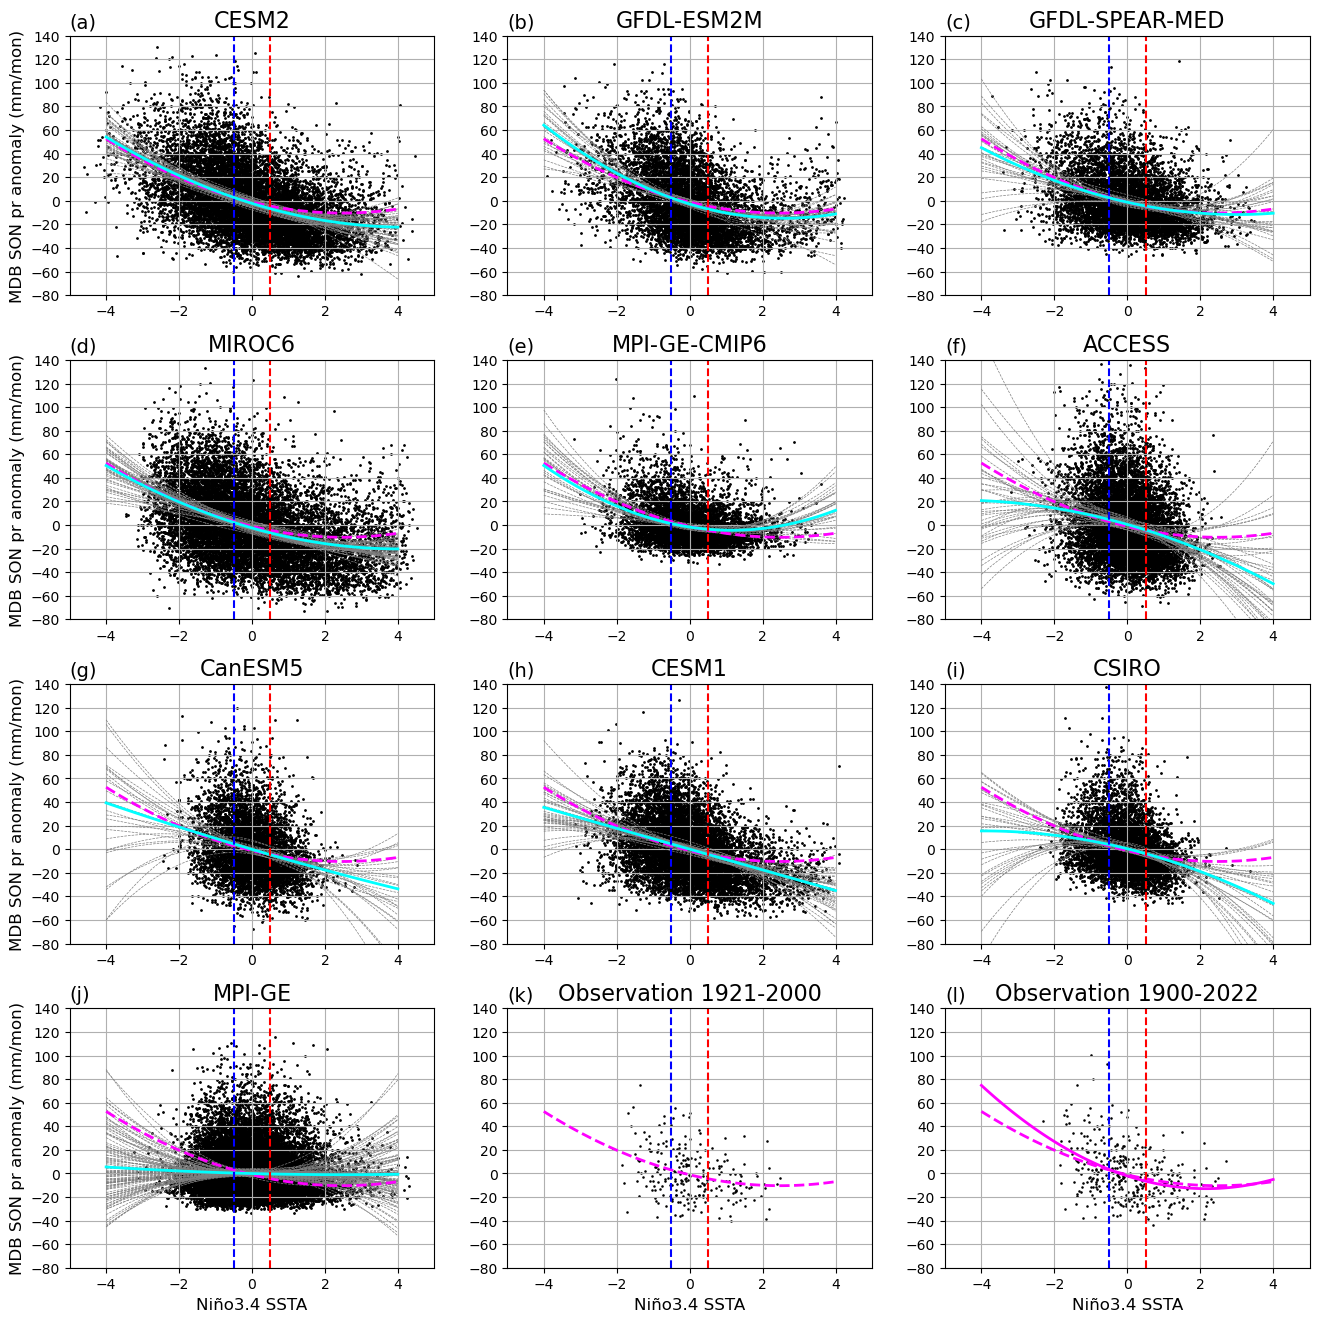

In [42]:
fig, axes = plt.subplots(4, 3, figsize=(16,16))
plot_scatter_nino34_rainfall('CESM2', '(a)', 0, 0, ens_num_CESM2, nino34_CESM2_SON_1921_2000, MDB_precip_CESM2_SON_1921_2000, CESM2_quadratic_ensemble, CESM2_quadratic_allpoints, xlabel = False, ylabel = True)
plot_scatter_nino34_rainfall('GFDL-ESM2M', '(b)', 0, 1, ens_num_GFDL_E, nino34_GFDL_E_SON_1921_2000, MDB_precip_GFDL_E_SON_1921_2000, GFDL_E_quadratic_ensemble, GFDL_E_quadratic_allpoints)
plot_scatter_nino34_rainfall('GFDL-SPEAR-MED', '(c)', 0, 2, ens_num_GFDL, nino34_GFDL_SON_1921_2000, MDB_precip_GFDL_SON_1921_2000, GFDL_quadratic_ensemble, GFDL_quadratic_allpoints)
plot_scatter_nino34_rainfall('MIROC6', '(d)', 1, 0, ens_num_MIROC6, nino34_MIROC6_SON_1921_2000, MDB_precip_MIROC6_SON_1921_2000, MIROC6_quadratic_ensemble, MIROC6_quadratic_allpoints, xlabel = False, ylabel = True)
plot_scatter_nino34_rainfall('MPI-GE-CMIP6', '(e)', 1, 1, ens_num_MPI_GE_CMIP6, nino34_MPI_GE_CMIP6_SON_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_1921_2000, MPI_GE_CMIP6_quadratic_ensemble, MPI_GE_CMIP6_quadratic_allpoints)
plot_scatter_nino34_rainfall('ACCESS', '(f)', 1, 2, ens_num_ACCESS, nino34_ACCESS_SON_1921_2000, MDB_precip_ACCESS_SON_1921_2000, ACCESS_quadratic_ensemble, ACCESS_quadratic_allpoints)
plot_scatter_nino34_rainfall('CanESM5', '(g)', 2, 0, ens_num_CanESM5, nino34_CanESM5_SON_1921_2000, MDB_precip_CanESM5_SON_1921_2000, CanESM5_quadratic_ensemble, CanESM5_quadratic_allpoints, xlabel = False, ylabel = True)
plot_scatter_nino34_rainfall('CESM1', '(h)', 2, 1, ens_num_CESM1, nino34_CESM1_SON_1921_2000, MDB_precip_CESM1_SON_1921_2000, CESM1_quadratic_ensemble, CESM1_quadratic_allpoints)
plot_scatter_nino34_rainfall('CSIRO', '(i)', 2, 2, ens_num_CSIRO, nino34_CSIRO_SON_1921_2000, MDB_precip_CSIRO_SON_1921_2000, CSIRO_quadratic_ensemble, CSIRO_quadratic_allpoints)
plot_scatter_nino34_rainfall('MPI-GE', '(j)', 3, 0, ens_num_MPI_GE, nino34_MPI_GE_SON_1921_2000, MDB_precip_MPI_GE_SON_1921_2000, MPI_GE_quadratic_ensemble, MPI_GE_quadratic_allpoints, xlabel = True, ylabel = True)
plot_scatter_nino34_rainfall_obs('Observation 1921-2000', '(k)', 3, 1, nino34_obs_SON_1921_2000, MDB_precip_obs_SON_1921_2000, obs_19212000_quadratic_allpoints, xlabel = True, ylabel = False)
plot_scatter_nino34_rainfall_obs('Observation 1900-2022', '(l)', 3, 2, nino34_obs_SON_1900_2022, MDB_precip_obs_SON_1900_2022, obs_19002022_quadratic_allpoints, xlabel = True, ylabel = False, solid_magenta = True)

plt.subplots_adjust(wspace=0.2,hspace=0.25)

plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/Fig1_pr_anom_scatter.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()

## Figure 2. CDF plot

In [43]:
# output 1) res at specific x values 2) ensemble mean res 3) ensemble std OR [ensemble 10th percentile, ensemble 90th percentile]
x_precip_general = np.linspace(-80,140,111)
x_percentile = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

def cdf_evaluate(precip_list, ens_num, x_precip):
    res_precip = [stats.ecdf(precip_list[i].to_numpy()) for i in range(ens_num)]
    same_x_res = [res_precip[i].cdf.evaluate(x_precip) for i in range(ens_num)]

    mean = np.mean(same_x_res, axis = 0)
    # std = np.std(same_x_res, axis = 0)
    
    percentile10 = np.percentile(same_x_res, 10, axis = 0)
    percentile90 = np.percentile(same_x_res, 90, axis = 0)

    interpolation = np.array([np.interp(x_percentile, res_precip[i].cdf.probabilities, res_precip[i].cdf.quantiles) for i in range(ens_num)])
    
    return same_x_res, mean, [percentile10, percentile90], interpolation

def cdf_evaluate_obs(precip_list, x_precip):
    res_precip = stats.ecdf(precip_list.to_numpy())
    same_x_res = res_precip.cdf.evaluate(x_precip)

    interpolation = np.interp(x_percentile, res_precip.cdf.probabilities, res_precip.cdf.quantiles)
    
    return same_x_res, interpolation

In [44]:
# CESM2

# EN precip / LN precip / neutral precip
MDB_precip_CESM2_SON_EN = [[] for _ in range(ens_num_CESM2)]
MDB_precip_CESM2_SON_LN = [[] for _ in range(ens_num_CESM2)]
neutral_year_CESM2 = [[] for _ in range(ens_num_CESM2)]
MDB_precip_CESM2_SON_N = [[] for _ in range(ens_num_CESM2)]

for i in range(ens_num_CESM2):
    MDB_precip_CESM2_SON_EN[i] = MDB_precip_CESM2_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM2_S_O_N.time.dt.year.isin(elnino_year_CESM2[i]))
    MDB_precip_CESM2_SON_LN[i] = MDB_precip_CESM2_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM2_S_O_N.time.dt.year.isin(lanina_year_CESM2[i]))
    neutral_year_CESM2[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CESM2[i],elnino_year_CESM2[i]))
    MDB_precip_CESM2_SON_N[i] = MDB_precip_CESM2_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM2_S_O_N.time.dt.year.isin(neutral_year_CESM2[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_CESM2_SON_EN_1921_2000, MDB_precip_CESM2_SON_EN_2001_2050, MDB_precip_CESM2_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_CESM2_SON_EN, ii = ens_num_CESM2)
MDB_precip_CESM2_SON_LN_1921_2000, MDB_precip_CESM2_SON_LN_2001_2050, MDB_precip_CESM2_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_CESM2_SON_LN, ii = ens_num_CESM2)
MDB_precip_CESM2_SON_N_1921_2000, MDB_precip_CESM2_SON_N_2001_2050, MDB_precip_CESM2_SON_N_2051_2100 = divide_2000_2050(MDB_precip_CESM2_SON_N, ii = ens_num_CESM2)

# CDF
res_MDB_precip_CESM2_EN_1921_2000, res_MDB_precip_CESM2_EN_mean_1921_2000, res_MDB_precip_CESM2_EN_std_1921_2000, res_MDB_precip_CESM2_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_CESM2_SON_EN_1921_2000, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_EN_2001_2050, res_MDB_precip_CESM2_EN_mean_2001_2050, res_MDB_precip_CESM2_EN_std_2001_2050, res_MDB_precip_CESM2_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_CESM2_SON_EN_2001_2050, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_EN_2051_2100, res_MDB_precip_CESM2_EN_mean_2051_2100, res_MDB_precip_CESM2_EN_std_2051_2100, res_MDB_precip_CESM2_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_CESM2_SON_EN_2051_2100, ens_num_CESM2, x_precip_general)

res_MDB_precip_CESM2_LN_1921_2000, res_MDB_precip_CESM2_LN_mean_1921_2000, res_MDB_precip_CESM2_LN_std_1921_2000, res_MDB_precip_CESM2_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_CESM2_SON_LN_1921_2000, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_LN_2001_2050, res_MDB_precip_CESM2_LN_mean_2001_2050, res_MDB_precip_CESM2_LN_std_2001_2050, res_MDB_precip_CESM2_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_CESM2_SON_LN_2001_2050, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_LN_2051_2100, res_MDB_precip_CESM2_LN_mean_2051_2100, res_MDB_precip_CESM2_LN_std_2051_2100, res_MDB_precip_CESM2_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_CESM2_SON_LN_2051_2100, ens_num_CESM2, x_precip_general)

res_MDB_precip_CESM2_N_1921_2000, res_MDB_precip_CESM2_N_mean_1921_2000, res_MDB_precip_CESM2_N_std_1921_2000, res_MDB_precip_CESM2_N_interp_1921_2000 = cdf_evaluate(MDB_precip_CESM2_SON_N_1921_2000, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_N_2001_2050, res_MDB_precip_CESM2_N_mean_2001_2050, res_MDB_precip_CESM2_N_std_2001_2050, res_MDB_precip_CESM2_N_interp_2001_2050 = cdf_evaluate(MDB_precip_CESM2_SON_N_2001_2050, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_N_2051_2100, res_MDB_precip_CESM2_N_mean_2051_2100, res_MDB_precip_CESM2_N_std_2051_2100, res_MDB_precip_CESM2_N_interp_2051_2100 = cdf_evaluate(MDB_precip_CESM2_SON_N_2051_2100, ens_num_CESM2, x_precip_general)

In [45]:
# GFDL_ESM2M

# EN precip / LN precip / neutral precip
MDB_precip_GFDL_E_SON_EN = [[] for _ in range(ens_num_GFDL_E)]
MDB_precip_GFDL_E_SON_LN = [[] for _ in range(ens_num_GFDL_E)]
neutral_year_GFDL_E = [[] for _ in range(ens_num_GFDL_E)]
MDB_precip_GFDL_E_SON_N = [[] for _ in range(ens_num_GFDL_E)]

for i in range(ens_num_GFDL_E):
    MDB_precip_GFDL_E_SON_EN[i] = MDB_precip_GFDL_E_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_E_S_O_N.time.dt.year.isin(elnino_year_GFDL_E[i]))
    MDB_precip_GFDL_E_SON_LN[i] = MDB_precip_GFDL_E_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_E_S_O_N.time.dt.year.isin(lanina_year_GFDL_E[i]))
    neutral_year_GFDL_E[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_GFDL_E[i],elnino_year_GFDL_E[i]))
    MDB_precip_GFDL_E_SON_N[i] = MDB_precip_GFDL_E_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_E_S_O_N.time.dt.year.isin(neutral_year_GFDL_E[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_GFDL_E_SON_EN_1921_2000, MDB_precip_GFDL_E_SON_EN_2001_2050, MDB_precip_GFDL_E_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_GFDL_E_SON_EN, ii = ens_num_GFDL_E)
MDB_precip_GFDL_E_SON_LN_1921_2000, MDB_precip_GFDL_E_SON_LN_2001_2050, MDB_precip_GFDL_E_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_GFDL_E_SON_LN, ii = ens_num_GFDL_E)
MDB_precip_GFDL_E_SON_N_1921_2000, MDB_precip_GFDL_E_SON_N_2001_2050, MDB_precip_GFDL_E_SON_N_2051_2100 = divide_2000_2050(MDB_precip_GFDL_E_SON_N, ii = ens_num_GFDL_E)

# CDF
res_MDB_precip_GFDL_E_EN_1921_2000, res_MDB_precip_GFDL_E_EN_mean_1921_2000, res_MDB_precip_GFDL_E_EN_std_1921_2000, res_MDB_precip_GFDL_E_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_GFDL_E_SON_EN_1921_2000, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_EN_2001_2050, res_MDB_precip_GFDL_E_EN_mean_2001_2050, res_MDB_precip_GFDL_E_EN_std_2001_2050, res_MDB_precip_GFDL_E_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_GFDL_E_SON_EN_2001_2050, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_EN_2051_2100, res_MDB_precip_GFDL_E_EN_mean_2051_2100, res_MDB_precip_GFDL_E_EN_std_2051_2100, res_MDB_precip_GFDL_E_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_GFDL_E_SON_EN_2051_2100, ens_num_GFDL_E, x_precip_general)

res_MDB_precip_GFDL_E_LN_1921_2000, res_MDB_precip_GFDL_E_LN_mean_1921_2000, res_MDB_precip_GFDL_E_LN_std_1921_2000, res_MDB_precip_GFDL_E_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_GFDL_E_SON_LN_1921_2000, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_LN_2001_2050, res_MDB_precip_GFDL_E_LN_mean_2001_2050, res_MDB_precip_GFDL_E_LN_std_2001_2050, res_MDB_precip_GFDL_E_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_GFDL_E_SON_LN_2001_2050, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_LN_2051_2100, res_MDB_precip_GFDL_E_LN_mean_2051_2100, res_MDB_precip_GFDL_E_LN_std_2051_2100, res_MDB_precip_GFDL_E_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_GFDL_E_SON_LN_2051_2100, ens_num_GFDL_E, x_precip_general)

res_MDB_precip_GFDL_E_N_1921_2000, res_MDB_precip_GFDL_E_N_mean_1921_2000, res_MDB_precip_GFDL_E_N_std_1921_2000, res_MDB_precip_GFDL_E_N_interp_1921_2000 = cdf_evaluate(MDB_precip_GFDL_E_SON_N_1921_2000, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_N_2001_2050, res_MDB_precip_GFDL_E_N_mean_2001_2050, res_MDB_precip_GFDL_E_N_std_2001_2050, res_MDB_precip_GFDL_E_N_interp_2001_2050 = cdf_evaluate(MDB_precip_GFDL_E_SON_N_2001_2050, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_N_2051_2100, res_MDB_precip_GFDL_E_N_mean_2051_2100, res_MDB_precip_GFDL_E_N_std_2051_2100, res_MDB_precip_GFDL_E_N_interp_2051_2100 = cdf_evaluate(MDB_precip_GFDL_E_SON_N_2051_2100, ens_num_GFDL_E, x_precip_general)

In [46]:
# GFDL_SPEAR_MED

# EN precip / LN precip / neutral precip
MDB_precip_GFDL_SON_EN = [[] for _ in range(ens_num_GFDL)]
MDB_precip_GFDL_SON_LN = [[] for _ in range(ens_num_GFDL)]
neutral_year_GFDL = [[] for _ in range(ens_num_GFDL)]
MDB_precip_GFDL_SON_N = [[] for _ in range(ens_num_GFDL)]

for i in range(ens_num_GFDL):
    MDB_precip_GFDL_SON_EN[i] = MDB_precip_GFDL_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_S_O_N.time.dt.year.isin(elnino_year_GFDL[i]))
    MDB_precip_GFDL_SON_LN[i] = MDB_precip_GFDL_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_S_O_N.time.dt.year.isin(lanina_year_GFDL[i]))
    neutral_year_GFDL[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_GFDL[i],elnino_year_GFDL[i]))
    MDB_precip_GFDL_SON_N[i] = MDB_precip_GFDL_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_S_O_N.time.dt.year.isin(neutral_year_GFDL[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_GFDL_SON_EN_1921_2000, MDB_precip_GFDL_SON_EN_2001_2050, MDB_precip_GFDL_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_GFDL_SON_EN, ii = ens_num_GFDL)
MDB_precip_GFDL_SON_LN_1921_2000, MDB_precip_GFDL_SON_LN_2001_2050, MDB_precip_GFDL_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_GFDL_SON_LN, ii = ens_num_GFDL)
MDB_precip_GFDL_SON_N_1921_2000, MDB_precip_GFDL_SON_N_2001_2050, MDB_precip_GFDL_SON_N_2051_2100 = divide_2000_2050(MDB_precip_GFDL_SON_N, ii = ens_num_GFDL)

# CDF
res_MDB_precip_GFDL_EN_1921_2000, res_MDB_precip_GFDL_EN_mean_1921_2000, res_MDB_precip_GFDL_EN_std_1921_2000, res_MDB_precip_GFDL_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_GFDL_SON_EN_1921_2000, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_EN_2001_2050, res_MDB_precip_GFDL_EN_mean_2001_2050, res_MDB_precip_GFDL_EN_std_2001_2050, res_MDB_precip_GFDL_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_GFDL_SON_EN_2001_2050, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_EN_2051_2100, res_MDB_precip_GFDL_EN_mean_2051_2100, res_MDB_precip_GFDL_EN_std_2051_2100, res_MDB_precip_GFDL_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_GFDL_SON_EN_2051_2100, ens_num_GFDL, x_precip_general)

res_MDB_precip_GFDL_LN_1921_2000, res_MDB_precip_GFDL_LN_mean_1921_2000, res_MDB_precip_GFDL_LN_std_1921_2000, res_MDB_precip_GFDL_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_GFDL_SON_LN_1921_2000, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_LN_2001_2050, res_MDB_precip_GFDL_LN_mean_2001_2050, res_MDB_precip_GFDL_LN_std_2001_2050, res_MDB_precip_GFDL_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_GFDL_SON_LN_2001_2050, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_LN_2051_2100, res_MDB_precip_GFDL_LN_mean_2051_2100, res_MDB_precip_GFDL_LN_std_2051_2100, res_MDB_precip_GFDL_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_GFDL_SON_LN_2051_2100, ens_num_GFDL, x_precip_general)

res_MDB_precip_GFDL_N_1921_2000, res_MDB_precip_GFDL_N_mean_1921_2000, res_MDB_precip_GFDL_N_std_1921_2000, res_MDB_precip_GFDL_N_interp_1921_2000 = cdf_evaluate(MDB_precip_GFDL_SON_N_1921_2000, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_N_2001_2050, res_MDB_precip_GFDL_N_mean_2001_2050, res_MDB_precip_GFDL_N_std_2001_2050, res_MDB_precip_GFDL_N_interp_2001_2050 = cdf_evaluate(MDB_precip_GFDL_SON_N_2001_2050, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_N_2051_2100, res_MDB_precip_GFDL_N_mean_2051_2100, res_MDB_precip_GFDL_N_std_2051_2100, res_MDB_precip_GFDL_N_interp_2051_2100 = cdf_evaluate(MDB_precip_GFDL_SON_N_2051_2100, ens_num_GFDL, x_precip_general)

In [47]:
# MIROC6

# EN precip / LN precip / neutral precip
MDB_precip_MIROC6_SON_EN = [[] for _ in range(ens_num_MIROC6)]
MDB_precip_MIROC6_SON_LN = [[] for _ in range(ens_num_MIROC6)]
neutral_year_MIROC6 = [[] for _ in range(ens_num_MIROC6)]
MDB_precip_MIROC6_SON_N = [[] for _ in range(ens_num_MIROC6)]

for i in range(ens_num_MIROC6):
    MDB_precip_MIROC6_SON_EN[i] = MDB_precip_MIROC6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MIROC6_S_O_N.time.dt.year.isin(elnino_year_MIROC6[i]))
    MDB_precip_MIROC6_SON_LN[i] = MDB_precip_MIROC6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MIROC6_S_O_N.time.dt.year.isin(lanina_year_MIROC6[i]))
    neutral_year_MIROC6[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_MIROC6[i],elnino_year_MIROC6[i]))
    MDB_precip_MIROC6_SON_N[i] = MDB_precip_MIROC6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MIROC6_S_O_N.time.dt.year.isin(neutral_year_MIROC6[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_MIROC6_SON_EN_1921_2000, MDB_precip_MIROC6_SON_EN_2001_2050, MDB_precip_MIROC6_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_MIROC6_SON_EN, ii = ens_num_MIROC6)
MDB_precip_MIROC6_SON_LN_1921_2000, MDB_precip_MIROC6_SON_LN_2001_2050, MDB_precip_MIROC6_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_MIROC6_SON_LN, ii = ens_num_MIROC6)
MDB_precip_MIROC6_SON_N_1921_2000, MDB_precip_MIROC6_SON_N_2001_2050, MDB_precip_MIROC6_SON_N_2051_2100 = divide_2000_2050(MDB_precip_MIROC6_SON_N, ii = ens_num_MIROC6)

# CDF
res_MDB_precip_MIROC6_EN_1921_2000, res_MDB_precip_MIROC6_EN_mean_1921_2000, res_MDB_precip_MIROC6_EN_std_1921_2000, res_MDB_precip_MIROC6_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_MIROC6_SON_EN_1921_2000, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_EN_2001_2050, res_MDB_precip_MIROC6_EN_mean_2001_2050, res_MDB_precip_MIROC6_EN_std_2001_2050, res_MDB_precip_MIROC6_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_MIROC6_SON_EN_2001_2050, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_EN_2051_2100, res_MDB_precip_MIROC6_EN_mean_2051_2100, res_MDB_precip_MIROC6_EN_std_2051_2100, res_MDB_precip_MIROC6_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_MIROC6_SON_EN_2051_2100, ens_num_MIROC6, x_precip_general)

res_MDB_precip_MIROC6_LN_1921_2000, res_MDB_precip_MIROC6_LN_mean_1921_2000, res_MDB_precip_MIROC6_LN_std_1921_2000, res_MDB_precip_MIROC6_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_MIROC6_SON_LN_1921_2000, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_LN_2001_2050, res_MDB_precip_MIROC6_LN_mean_2001_2050, res_MDB_precip_MIROC6_LN_std_2001_2050, res_MDB_precip_MIROC6_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_MIROC6_SON_LN_2001_2050, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_LN_2051_2100, res_MDB_precip_MIROC6_LN_mean_2051_2100, res_MDB_precip_MIROC6_LN_std_2051_2100, res_MDB_precip_MIROC6_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_MIROC6_SON_LN_2051_2100, ens_num_MIROC6, x_precip_general)

res_MDB_precip_MIROC6_N_1921_2000, res_MDB_precip_MIROC6_N_mean_1921_2000, res_MDB_precip_MIROC6_N_std_1921_2000, res_MDB_precip_MIROC6_N_interp_1921_2000 = cdf_evaluate(MDB_precip_MIROC6_SON_N_1921_2000, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_N_2001_2050, res_MDB_precip_MIROC6_N_mean_2001_2050, res_MDB_precip_MIROC6_N_std_2001_2050, res_MDB_precip_MIROC6_N_interp_2001_2050 = cdf_evaluate(MDB_precip_MIROC6_SON_N_2001_2050, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_N_2051_2100, res_MDB_precip_MIROC6_N_mean_2051_2100, res_MDB_precip_MIROC6_N_std_2051_2100, res_MDB_precip_MIROC6_N_interp_2051_2100 = cdf_evaluate(MDB_precip_MIROC6_SON_N_2051_2100, ens_num_MIROC6, x_precip_general)

In [48]:
# MPI_GE_CMIP6

# EN precip / LN precip / neutral precip
MDB_precip_MPI_GE_CMIP6_SON_EN = [[] for _ in range(ens_num_MPI_GE_CMIP6)]
MDB_precip_MPI_GE_CMIP6_SON_LN = [[] for _ in range(ens_num_MPI_GE_CMIP6)]
neutral_year_MPI_GE_CMIP6 = [[] for _ in range(ens_num_MPI_GE_CMIP6)]
MDB_precip_MPI_GE_CMIP6_SON_N = [[] for _ in range(ens_num_MPI_GE_CMIP6)]

for i in range(ens_num_MPI_GE_CMIP6):
    MDB_precip_MPI_GE_CMIP6_SON_EN[i] = MDB_precip_MPI_GE_CMIP6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_CMIP6_S_O_N.time.dt.year.isin(elnino_year_MPI_GE_CMIP6[i]))
    MDB_precip_MPI_GE_CMIP6_SON_LN[i] = MDB_precip_MPI_GE_CMIP6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_CMIP6_S_O_N.time.dt.year.isin(lanina_year_MPI_GE_CMIP6[i]))
    neutral_year_MPI_GE_CMIP6[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_MPI_GE_CMIP6[i],elnino_year_MPI_GE_CMIP6[i]))
    MDB_precip_MPI_GE_CMIP6_SON_N[i] = MDB_precip_MPI_GE_CMIP6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_CMIP6_S_O_N.time.dt.year.isin(neutral_year_MPI_GE_CMIP6[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_MPI_GE_CMIP6_SON_EN_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_EN_2001_2050, MDB_precip_MPI_GE_CMIP6_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_SON_EN, ii = ens_num_MPI_GE_CMIP6)
MDB_precip_MPI_GE_CMIP6_SON_LN_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_LN_2001_2050, MDB_precip_MPI_GE_CMIP6_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_SON_LN, ii = ens_num_MPI_GE_CMIP6)
MDB_precip_MPI_GE_CMIP6_SON_N_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_N_2001_2050, MDB_precip_MPI_GE_CMIP6_SON_N_2051_2100 = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_SON_N, ii = ens_num_MPI_GE_CMIP6)

# CDF
res_MDB_precip_MPI_GE_CMIP6_EN_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_EN_1921_2000, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_EN_2001_2050, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2001_2050, res_MDB_precip_MPI_GE_CMIP6_EN_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_EN_2001_2050, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_EN_2051_2100, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2051_2100, res_MDB_precip_MPI_GE_CMIP6_EN_std_2051_2100, res_MDB_precip_MPI_GE_CMIP6_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_EN_2051_2100, ens_num_MPI_GE_CMIP6, x_precip_general)

res_MDB_precip_MPI_GE_CMIP6_LN_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_LN_1921_2000, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_LN_2001_2050, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2001_2050, res_MDB_precip_MPI_GE_CMIP6_LN_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_LN_2001_2050, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_LN_2051_2100, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2051_2100, res_MDB_precip_MPI_GE_CMIP6_LN_std_2051_2100, res_MDB_precip_MPI_GE_CMIP6_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_LN_2051_2100, ens_num_MPI_GE_CMIP6, x_precip_general)

res_MDB_precip_MPI_GE_CMIP6_N_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_interp_1921_2000 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_N_1921_2000, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_N_2001_2050, res_MDB_precip_MPI_GE_CMIP6_N_mean_2001_2050, res_MDB_precip_MPI_GE_CMIP6_N_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_N_interp_2001_2050 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_N_2001_2050, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_N_2051_2100, res_MDB_precip_MPI_GE_CMIP6_N_mean_2051_2100, res_MDB_precip_MPI_GE_CMIP6_N_std_2051_2100, res_MDB_precip_MPI_GE_CMIP6_N_interp_2051_2100 = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_N_2051_2100, ens_num_MPI_GE_CMIP6, x_precip_general)

In [49]:
# ACCESS

# EN precip / LN precip / neutral precip
MDB_precip_ACCESS_SON_EN = [[] for _ in range(ens_num_ACCESS)]
MDB_precip_ACCESS_SON_LN = [[] for _ in range(ens_num_ACCESS)]
neutral_year_ACCESS = [[] for _ in range(ens_num_ACCESS)]
MDB_precip_ACCESS_SON_N = [[] for _ in range(ens_num_ACCESS)]

for i in range(ens_num_ACCESS):
    MDB_precip_ACCESS_SON_EN[i] = MDB_precip_ACCESS_S_O_N.isel(ens_number = i).sel(time = MDB_precip_ACCESS_S_O_N.time.dt.year.isin(elnino_year_ACCESS[i]))
    MDB_precip_ACCESS_SON_LN[i] = MDB_precip_ACCESS_S_O_N.isel(ens_number = i).sel(time = MDB_precip_ACCESS_S_O_N.time.dt.year.isin(lanina_year_ACCESS[i]))
    neutral_year_ACCESS[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_ACCESS[i],elnino_year_ACCESS[i]))
    MDB_precip_ACCESS_SON_N[i] = MDB_precip_ACCESS_S_O_N.isel(ens_number = i).sel(time = MDB_precip_ACCESS_S_O_N.time.dt.year.isin(neutral_year_ACCESS[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_ACCESS_SON_EN_1921_2000, MDB_precip_ACCESS_SON_EN_2001_2050, MDB_precip_ACCESS_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_ACCESS_SON_EN, ii = ens_num_ACCESS)
MDB_precip_ACCESS_SON_LN_1921_2000, MDB_precip_ACCESS_SON_LN_2001_2050, MDB_precip_ACCESS_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_ACCESS_SON_LN, ii = ens_num_ACCESS)
MDB_precip_ACCESS_SON_N_1921_2000, MDB_precip_ACCESS_SON_N_2001_2050, MDB_precip_ACCESS_SON_N_2051_2100 = divide_2000_2050(MDB_precip_ACCESS_SON_N, ii = ens_num_ACCESS)

# CDF
res_MDB_precip_ACCESS_EN_1921_2000, res_MDB_precip_ACCESS_EN_mean_1921_2000, res_MDB_precip_ACCESS_EN_std_1921_2000, res_MDB_precip_ACCESS_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_ACCESS_SON_EN_1921_2000, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_EN_2001_2050, res_MDB_precip_ACCESS_EN_mean_2001_2050, res_MDB_precip_ACCESS_EN_std_2001_2050, res_MDB_precip_ACCESS_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_ACCESS_SON_EN_2001_2050, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_EN_2051_2100, res_MDB_precip_ACCESS_EN_mean_2051_2100, res_MDB_precip_ACCESS_EN_std_2051_2100, res_MDB_precip_ACCESS_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_ACCESS_SON_EN_2051_2100, ens_num_ACCESS, x_precip_general)

res_MDB_precip_ACCESS_LN_1921_2000, res_MDB_precip_ACCESS_LN_mean_1921_2000, res_MDB_precip_ACCESS_LN_std_1921_2000, res_MDB_precip_ACCESS_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_ACCESS_SON_LN_1921_2000, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_LN_2001_2050, res_MDB_precip_ACCESS_LN_mean_2001_2050, res_MDB_precip_ACCESS_LN_std_2001_2050, res_MDB_precip_ACCESS_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_ACCESS_SON_LN_2001_2050, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_LN_2051_2100, res_MDB_precip_ACCESS_LN_mean_2051_2100, res_MDB_precip_ACCESS_LN_std_2051_2100, res_MDB_precip_ACCESS_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_ACCESS_SON_LN_2051_2100, ens_num_ACCESS, x_precip_general)

res_MDB_precip_ACCESS_N_1921_2000, res_MDB_precip_ACCESS_N_mean_1921_2000, res_MDB_precip_ACCESS_N_std_1921_2000, res_MDB_precip_ACCESS_N_interp_1921_2000 = cdf_evaluate(MDB_precip_ACCESS_SON_N_1921_2000, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_N_2001_2050, res_MDB_precip_ACCESS_N_mean_2001_2050, res_MDB_precip_ACCESS_N_std_2001_2050, res_MDB_precip_ACCESS_N_interp_2001_2050 = cdf_evaluate(MDB_precip_ACCESS_SON_N_2001_2050, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_N_2051_2100, res_MDB_precip_ACCESS_N_mean_2051_2100, res_MDB_precip_ACCESS_N_std_2051_2100, res_MDB_precip_ACCESS_N_interp_2051_2100 = cdf_evaluate(MDB_precip_ACCESS_SON_N_2051_2100, ens_num_ACCESS, x_precip_general)

In [50]:
# CanESM5

# EN precip / LN precip / neutral precip
MDB_precip_CanESM5_SON_EN = [[] for _ in range(ens_num_CanESM5)]
MDB_precip_CanESM5_SON_LN = [[] for _ in range(ens_num_CanESM5)]
neutral_year_CanESM5 = [[] for _ in range(ens_num_CanESM5)]
MDB_precip_CanESM5_SON_N = [[] for _ in range(ens_num_CanESM5)]

for i in range(ens_num_CanESM5):
    MDB_precip_CanESM5_SON_EN[i] = MDB_precip_CanESM5_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CanESM5_S_O_N.time.dt.year.isin(elnino_year_CanESM5[i]))
    MDB_precip_CanESM5_SON_LN[i] = MDB_precip_CanESM5_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CanESM5_S_O_N.time.dt.year.isin(lanina_year_CanESM5[i]))
    neutral_year_CanESM5[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CanESM5[i],elnino_year_CanESM5[i]))
    MDB_precip_CanESM5_SON_N[i] = MDB_precip_CanESM5_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CanESM5_S_O_N.time.dt.year.isin(neutral_year_CanESM5[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_CanESM5_SON_EN_1921_2000, MDB_precip_CanESM5_SON_EN_2001_2050, MDB_precip_CanESM5_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_CanESM5_SON_EN, ii = ens_num_CanESM5)
MDB_precip_CanESM5_SON_LN_1921_2000, MDB_precip_CanESM5_SON_LN_2001_2050, MDB_precip_CanESM5_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_CanESM5_SON_LN, ii = ens_num_CanESM5)
MDB_precip_CanESM5_SON_N_1921_2000, MDB_precip_CanESM5_SON_N_2001_2050, MDB_precip_CanESM5_SON_N_2051_2100 = divide_2000_2050(MDB_precip_CanESM5_SON_N, ii = ens_num_CanESM5)

# CDF
res_MDB_precip_CanESM5_EN_1921_2000, res_MDB_precip_CanESM5_EN_mean_1921_2000, res_MDB_precip_CanESM5_EN_std_1921_2000, res_MDB_precip_CanESM5_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_CanESM5_SON_EN_1921_2000, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_EN_2001_2050, res_MDB_precip_CanESM5_EN_mean_2001_2050, res_MDB_precip_CanESM5_EN_std_2001_2050, res_MDB_precip_CanESM5_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_CanESM5_SON_EN_2001_2050, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_EN_2051_2100, res_MDB_precip_CanESM5_EN_mean_2051_2100, res_MDB_precip_CanESM5_EN_std_2051_2100, res_MDB_precip_CanESM5_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_CanESM5_SON_EN_2051_2100, ens_num_CanESM5, x_precip_general)

res_MDB_precip_CanESM5_LN_1921_2000, res_MDB_precip_CanESM5_LN_mean_1921_2000, res_MDB_precip_CanESM5_LN_std_1921_2000, res_MDB_precip_CanESM5_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_CanESM5_SON_LN_1921_2000, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_LN_2001_2050, res_MDB_precip_CanESM5_LN_mean_2001_2050, res_MDB_precip_CanESM5_LN_std_2001_2050, res_MDB_precip_CanESM5_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_CanESM5_SON_LN_2001_2050, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_LN_2051_2100, res_MDB_precip_CanESM5_LN_mean_2051_2100, res_MDB_precip_CanESM5_LN_std_2051_2100, res_MDB_precip_CanESM5_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_CanESM5_SON_LN_2051_2100, ens_num_CanESM5, x_precip_general)

res_MDB_precip_CanESM5_N_1921_2000, res_MDB_precip_CanESM5_N_mean_1921_2000, res_MDB_precip_CanESM5_N_std_1921_2000, res_MDB_precip_CanESM5_N_interp_1921_2000 = cdf_evaluate(MDB_precip_CanESM5_SON_N_1921_2000, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_N_2001_2050, res_MDB_precip_CanESM5_N_mean_2001_2050, res_MDB_precip_CanESM5_N_std_2001_2050, res_MDB_precip_CanESM5_N_interp_2001_2050 = cdf_evaluate(MDB_precip_CanESM5_SON_N_2001_2050, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_N_2051_2100, res_MDB_precip_CanESM5_N_mean_2051_2100, res_MDB_precip_CanESM5_N_std_2051_2100, res_MDB_precip_CanESM5_N_interp_2051_2100 = cdf_evaluate(MDB_precip_CanESM5_SON_N_2051_2100, ens_num_CanESM5, x_precip_general)

In [51]:
# CESM1

# EN precip / LN precip / neutral precip
MDB_precip_CESM1_SON_EN = [[] for _ in range(ens_num_CESM1)]
MDB_precip_CESM1_SON_LN = [[] for _ in range(ens_num_CESM1)]
neutral_year_CESM1 = [[] for _ in range(ens_num_CESM1)]
MDB_precip_CESM1_SON_N = [[] for _ in range(ens_num_CESM1)]

for i in range(ens_num_CESM1):
    MDB_precip_CESM1_SON_EN[i] = MDB_precip_CESM1_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM1_S_O_N.time.dt.year.isin(elnino_year_CESM1[i]))
    MDB_precip_CESM1_SON_LN[i] = MDB_precip_CESM1_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM1_S_O_N.time.dt.year.isin(lanina_year_CESM1[i]))
    neutral_year_CESM1[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CESM1[i],elnino_year_CESM1[i]))
    MDB_precip_CESM1_SON_N[i] = MDB_precip_CESM1_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM1_S_O_N.time.dt.year.isin(neutral_year_CESM1[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_CESM1_SON_EN_1921_2000, MDB_precip_CESM1_SON_EN_2001_2050, MDB_precip_CESM1_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_CESM1_SON_EN, ii = ens_num_CESM1)
MDB_precip_CESM1_SON_LN_1921_2000, MDB_precip_CESM1_SON_LN_2001_2050, MDB_precip_CESM1_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_CESM1_SON_LN, ii = ens_num_CESM1)
MDB_precip_CESM1_SON_N_1921_2000, MDB_precip_CESM1_SON_N_2001_2050, MDB_precip_CESM1_SON_N_2051_2100 = divide_2000_2050(MDB_precip_CESM1_SON_N, ii = ens_num_CESM1)

# CDF
res_MDB_precip_CESM1_EN_1921_2000, res_MDB_precip_CESM1_EN_mean_1921_2000, res_MDB_precip_CESM1_EN_std_1921_2000, res_MDB_precip_CESM1_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_CESM1_SON_EN_1921_2000, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_EN_2001_2050, res_MDB_precip_CESM1_EN_mean_2001_2050, res_MDB_precip_CESM1_EN_std_2001_2050, res_MDB_precip_CESM1_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_CESM1_SON_EN_2001_2050, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_EN_2051_2100, res_MDB_precip_CESM1_EN_mean_2051_2100, res_MDB_precip_CESM1_EN_std_2051_2100, res_MDB_precip_CESM1_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_CESM1_SON_EN_2051_2100, ens_num_CESM1, x_precip_general)

res_MDB_precip_CESM1_LN_1921_2000, res_MDB_precip_CESM1_LN_mean_1921_2000, res_MDB_precip_CESM1_LN_std_1921_2000, res_MDB_precip_CESM1_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_CESM1_SON_LN_1921_2000, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_LN_2001_2050, res_MDB_precip_CESM1_LN_mean_2001_2050, res_MDB_precip_CESM1_LN_std_2001_2050, res_MDB_precip_CESM1_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_CESM1_SON_LN_2001_2050, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_LN_2051_2100, res_MDB_precip_CESM1_LN_mean_2051_2100, res_MDB_precip_CESM1_LN_std_2051_2100, res_MDB_precip_CESM1_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_CESM1_SON_LN_2051_2100, ens_num_CESM1, x_precip_general)

res_MDB_precip_CESM1_N_1921_2000, res_MDB_precip_CESM1_N_mean_1921_2000, res_MDB_precip_CESM1_N_std_1921_2000, res_MDB_precip_CESM1_N_interp_1921_2000 = cdf_evaluate(MDB_precip_CESM1_SON_N_1921_2000, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_N_2001_2050, res_MDB_precip_CESM1_N_mean_2001_2050, res_MDB_precip_CESM1_N_std_2001_2050, res_MDB_precip_CESM1_N_interp_2001_2050 = cdf_evaluate(MDB_precip_CESM1_SON_N_2001_2050, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_N_2051_2100, res_MDB_precip_CESM1_N_mean_2051_2100, res_MDB_precip_CESM1_N_std_2051_2100, res_MDB_precip_CESM1_N_interp_2051_2100 = cdf_evaluate(MDB_precip_CESM1_SON_N_2051_2100, ens_num_CESM1, x_precip_general)

In [52]:
# CSIRO

# EN precip / LN precip / neutral precip
MDB_precip_CSIRO_SON_EN = [[] for _ in range(ens_num_CSIRO)]
MDB_precip_CSIRO_SON_LN = [[] for _ in range(ens_num_CSIRO)]
neutral_year_CSIRO = [[] for _ in range(ens_num_CSIRO)]
MDB_precip_CSIRO_SON_N = [[] for _ in range(ens_num_CSIRO)]

for i in range(ens_num_CSIRO):
    MDB_precip_CSIRO_SON_EN[i] = MDB_precip_CSIRO_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CSIRO_S_O_N.time.dt.year.isin(elnino_year_CSIRO[i]))
    MDB_precip_CSIRO_SON_LN[i] = MDB_precip_CSIRO_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CSIRO_S_O_N.time.dt.year.isin(lanina_year_CSIRO[i]))
    neutral_year_CSIRO[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CSIRO[i],elnino_year_CSIRO[i]))
    MDB_precip_CSIRO_SON_N[i] = MDB_precip_CSIRO_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CSIRO_S_O_N.time.dt.year.isin(neutral_year_CSIRO[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_CSIRO_SON_EN_1921_2000, MDB_precip_CSIRO_SON_EN_2001_2050, MDB_precip_CSIRO_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_CSIRO_SON_EN, ii = ens_num_CSIRO)
MDB_precip_CSIRO_SON_LN_1921_2000, MDB_precip_CSIRO_SON_LN_2001_2050, MDB_precip_CSIRO_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_CSIRO_SON_LN, ii = ens_num_CSIRO)
MDB_precip_CSIRO_SON_N_1921_2000, MDB_precip_CSIRO_SON_N_2001_2050, MDB_precip_CSIRO_SON_N_2051_2100 = divide_2000_2050(MDB_precip_CSIRO_SON_N, ii = ens_num_CSIRO)

# CDF
res_MDB_precip_CSIRO_EN_1921_2000, res_MDB_precip_CSIRO_EN_mean_1921_2000, res_MDB_precip_CSIRO_EN_std_1921_2000, res_MDB_precip_CSIRO_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_CSIRO_SON_EN_1921_2000, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_EN_2001_2050, res_MDB_precip_CSIRO_EN_mean_2001_2050, res_MDB_precip_CSIRO_EN_std_2001_2050, res_MDB_precip_CSIRO_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_CSIRO_SON_EN_2001_2050, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_EN_2051_2100, res_MDB_precip_CSIRO_EN_mean_2051_2100, res_MDB_precip_CSIRO_EN_std_2051_2100, res_MDB_precip_CSIRO_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_CSIRO_SON_EN_2051_2100, ens_num_CSIRO, x_precip_general)

res_MDB_precip_CSIRO_LN_1921_2000, res_MDB_precip_CSIRO_LN_mean_1921_2000, res_MDB_precip_CSIRO_LN_std_1921_2000, res_MDB_precip_CSIRO_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_CSIRO_SON_LN_1921_2000, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_LN_2001_2050, res_MDB_precip_CSIRO_LN_mean_2001_2050, res_MDB_precip_CSIRO_LN_std_2001_2050, res_MDB_precip_CSIRO_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_CSIRO_SON_LN_2001_2050, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_LN_2051_2100, res_MDB_precip_CSIRO_LN_mean_2051_2100, res_MDB_precip_CSIRO_LN_std_2051_2100, res_MDB_precip_CSIRO_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_CSIRO_SON_LN_2051_2100, ens_num_CSIRO, x_precip_general)

res_MDB_precip_CSIRO_N_1921_2000, res_MDB_precip_CSIRO_N_mean_1921_2000, res_MDB_precip_CSIRO_N_std_1921_2000, res_MDB_precip_CSIRO_N_interp_1921_2000 = cdf_evaluate(MDB_precip_CSIRO_SON_N_1921_2000, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_N_2001_2050, res_MDB_precip_CSIRO_N_mean_2001_2050, res_MDB_precip_CSIRO_N_std_2001_2050, res_MDB_precip_CSIRO_N_interp_2001_2050 = cdf_evaluate(MDB_precip_CSIRO_SON_N_2001_2050, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_N_2051_2100, res_MDB_precip_CSIRO_N_mean_2051_2100, res_MDB_precip_CSIRO_N_std_2051_2100, res_MDB_precip_CSIRO_N_interp_2051_2100 = cdf_evaluate(MDB_precip_CSIRO_SON_N_2051_2100, ens_num_CSIRO, x_precip_general)

In [53]:
# MPI_GE

# EN precip / LN precip / neutral precip
MDB_precip_MPI_GE_SON_EN = [[] for _ in range(ens_num_MPI_GE)]
MDB_precip_MPI_GE_SON_LN = [[] for _ in range(ens_num_MPI_GE)]
neutral_year_MPI_GE = [[] for _ in range(ens_num_MPI_GE)]
MDB_precip_MPI_GE_SON_N = [[] for _ in range(ens_num_MPI_GE)]

for i in range(ens_num_MPI_GE):
    MDB_precip_MPI_GE_SON_EN[i] = MDB_precip_MPI_GE_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_S_O_N.time.dt.year.isin(elnino_year_MPI_GE[i]))
    MDB_precip_MPI_GE_SON_LN[i] = MDB_precip_MPI_GE_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_S_O_N.time.dt.year.isin(lanina_year_MPI_GE[i]))
    neutral_year_MPI_GE[i] = np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_MPI_GE[i],elnino_year_MPI_GE[i]))
    MDB_precip_MPI_GE_SON_N[i] = MDB_precip_MPI_GE_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_S_O_N.time.dt.year.isin(neutral_year_MPI_GE[i]))

# EN precip / LN precip / neutral precip for different time periods
MDB_precip_MPI_GE_SON_EN_1921_2000, MDB_precip_MPI_GE_SON_EN_2001_2050, MDB_precip_MPI_GE_SON_EN_2051_2100 = divide_2000_2050(MDB_precip_MPI_GE_SON_EN, ii = ens_num_MPI_GE)
MDB_precip_MPI_GE_SON_LN_1921_2000, MDB_precip_MPI_GE_SON_LN_2001_2050, MDB_precip_MPI_GE_SON_LN_2051_2100 = divide_2000_2050(MDB_precip_MPI_GE_SON_LN, ii = ens_num_MPI_GE)
MDB_precip_MPI_GE_SON_N_1921_2000, MDB_precip_MPI_GE_SON_N_2001_2050, MDB_precip_MPI_GE_SON_N_2051_2100 = divide_2000_2050(MDB_precip_MPI_GE_SON_N, ii = ens_num_MPI_GE)

# CDF
res_MDB_precip_MPI_GE_EN_1921_2000, res_MDB_precip_MPI_GE_EN_mean_1921_2000, res_MDB_precip_MPI_GE_EN_std_1921_2000, res_MDB_precip_MPI_GE_EN_interp_1921_2000 = cdf_evaluate(MDB_precip_MPI_GE_SON_EN_1921_2000, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_EN_2001_2050, res_MDB_precip_MPI_GE_EN_mean_2001_2050, res_MDB_precip_MPI_GE_EN_std_2001_2050, res_MDB_precip_MPI_GE_EN_interp_2001_2050 = cdf_evaluate(MDB_precip_MPI_GE_SON_EN_2001_2050, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_EN_2051_2100, res_MDB_precip_MPI_GE_EN_mean_2051_2100, res_MDB_precip_MPI_GE_EN_std_2051_2100, res_MDB_precip_MPI_GE_EN_interp_2051_2100 = cdf_evaluate(MDB_precip_MPI_GE_SON_EN_2051_2100, ens_num_MPI_GE, x_precip_general)

res_MDB_precip_MPI_GE_LN_1921_2000, res_MDB_precip_MPI_GE_LN_mean_1921_2000, res_MDB_precip_MPI_GE_LN_std_1921_2000, res_MDB_precip_MPI_GE_LN_interp_1921_2000 = cdf_evaluate(MDB_precip_MPI_GE_SON_LN_1921_2000, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_LN_2001_2050, res_MDB_precip_MPI_GE_LN_mean_2001_2050, res_MDB_precip_MPI_GE_LN_std_2001_2050, res_MDB_precip_MPI_GE_LN_interp_2001_2050 = cdf_evaluate(MDB_precip_MPI_GE_SON_LN_2001_2050, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_LN_2051_2100, res_MDB_precip_MPI_GE_LN_mean_2051_2100, res_MDB_precip_MPI_GE_LN_std_2051_2100, res_MDB_precip_MPI_GE_LN_interp_2051_2100 = cdf_evaluate(MDB_precip_MPI_GE_SON_LN_2051_2100, ens_num_MPI_GE, x_precip_general)

res_MDB_precip_MPI_GE_N_1921_2000, res_MDB_precip_MPI_GE_N_mean_1921_2000, res_MDB_precip_MPI_GE_N_std_1921_2000, res_MDB_precip_MPI_GE_N_interp_1921_2000 = cdf_evaluate(MDB_precip_MPI_GE_SON_N_1921_2000, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_N_2001_2050, res_MDB_precip_MPI_GE_N_mean_2001_2050, res_MDB_precip_MPI_GE_N_std_2001_2050, res_MDB_precip_MPI_GE_N_interp_2001_2050 = cdf_evaluate(MDB_precip_MPI_GE_SON_N_2001_2050, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_N_2051_2100, res_MDB_precip_MPI_GE_N_mean_2051_2100, res_MDB_precip_MPI_GE_N_std_2051_2100, res_MDB_precip_MPI_GE_N_interp_2051_2100 = cdf_evaluate(MDB_precip_MPI_GE_SON_N_2051_2100, ens_num_MPI_GE, x_precip_general)

In [54]:
# Observation 1921-2000

# EN precip / LN precip / neutral precip
MDB_precip_obs_SON_EN_1921_2000 = MDB_precip_obs_SON_1921_2000.sel(time = MDB_precip_obs_SON_1921_2000.time.dt.year.isin(elnino_year_obs))
MDB_precip_obs_SON_LN_1921_2000 = MDB_precip_obs_SON_1921_2000.sel(time = MDB_precip_obs_SON_1921_2000.time.dt.year.isin(lanina_year_obs))

## need to change this
neutral_year_obs = np.setdiff1d(np.arange(1921,2001),np.append(lanina_year_obs,elnino_year_obs))
MDB_precip_obs_SON_N_1921_2000 = MDB_precip_obs_SON_1921_2000.sel(time = MDB_precip_obs_SON_1921_2000.time.dt.year.isin(neutral_year_obs))

# CDF
res_MDB_precip_obs_EN_1921_2000, res_MDB_precip_obs_EN_interp_1921_2000 = cdf_evaluate_obs(MDB_precip_obs_SON_EN_1921_2000, x_precip_general)
res_MDB_precip_obs_LN_1921_2000, res_MDB_precip_obs_LN_interp_1921_2000 = cdf_evaluate_obs(MDB_precip_obs_SON_LN_1921_2000, x_precip_general)
res_MDB_precip_obs_N_1921_2000, res_MDB_precip_obs_N_interp_1921_2000 = cdf_evaluate_obs(MDB_precip_obs_SON_N_1921_2000, x_precip_general)

In [55]:
# Observation 1900-2022

# EN precip / LN precip / neutral precip
MDB_precip_obs_SON_EN_1900_2022 = MDB_precip_obs_SON_1900_2022.sel(time = MDB_precip_obs_SON_1900_2022.time.dt.year.isin(elnino_year_obs))
MDB_precip_obs_SON_LN_1900_2022 = MDB_precip_obs_SON_1900_2022.sel(time = MDB_precip_obs_SON_1900_2022.time.dt.year.isin(lanina_year_obs))

## need to change this
neutral_year_obs = np.setdiff1d(np.arange(1900,2023),np.append(lanina_year_obs,elnino_year_obs))
MDB_precip_obs_SON_N_1900_2022 = MDB_precip_obs_SON_1900_2022.sel(time = MDB_precip_obs_SON_1900_2022.time.dt.year.isin(neutral_year_obs))

# CDF
res_MDB_precip_obs_EN_1900_2022, res_MDB_precip_obs_EN_interp_1900_2022 = cdf_evaluate_obs(MDB_precip_obs_SON_EN_1900_2022, x_precip_general)
res_MDB_precip_obs_LN_1900_2022, res_MDB_precip_obs_LN_interp_1900_2022 = cdf_evaluate_obs(MDB_precip_obs_SON_LN_1900_2022, x_precip_general)
res_MDB_precip_obs_N_1900_2022, res_MDB_precip_obs_N_interp_1900_2022 = cdf_evaluate_obs(MDB_precip_obs_SON_N_1900_2022, x_precip_general)

In [56]:
def cdf_plot_same_time(name, alphabet, ax_x, ax_y, x_precip, mean_N, mean_EN, mean_LN, std_N, std_EN, std_LN, xlabel = False, ylabel = False):
    ax = axes[ax_x, ax_y]
    ax.annotate(alphabet, xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)

    ax.plot(x_precip, mean_EN, color='red')
    ax.plot(x_precip, mean_LN, color='blue')
    ax.plot(x_precip, mean_N, color='black')

    # 10th percentile - 90 percentile
    ax.fill_between(x_precip, std_N[0], std_N[1], color='darkgrey', alpha = 0.7)
    ax.fill_between(x_precip, std_EN[0], std_EN[1], color='mistyrose', alpha = 0.7)
    ax.fill_between(x_precip, std_LN[0], std_LN[1], color='lightblue', alpha = 0.7)

    ax.set_xlim((-65, 105))
    ax.set_ylim((-0.05,1.05))
    ax.set_xticks(np.arange(-50,101,50))
    ax.set_yticks(np.arange(0,1.1,0.2))
    ax.set_title(name, fontsize = 16)
    ax.grid()
    
    if xlabel == True:
        ax.set_xlabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)
    if ylabel == True:
        ax.set_ylabel('Empirical CDF', fontsize = 12)
    
def cdf_plot_same_time_obs(name, alphabet, ax_x, ax_y, x_precip, mean_N, mean_EN, mean_LN, xlabel = False, ylabel = False):
    ax = axes[ax_x, ax_y]
    ax.annotate(alphabet, xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    
    ax.plot(x_precip, mean_EN, color='red')
    ax.plot(x_precip, mean_N, color='black')
    ax.plot(x_precip, mean_LN, color='blue')

    ax.set_xlim((-65, 105))
    ax.set_ylim((-0.05,1.05))
    ax.set_xticks(np.arange(-50,101,50))
    ax.set_yticks(np.arange(0,1.1,0.2))
    ax.set_title(name, fontsize = 16)
    ax.grid()
    
    if xlabel == True:
        ax.set_xlabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)
    if ylabel == True:
        ax.set_ylabel('Empirical CDF', fontsize = 12)

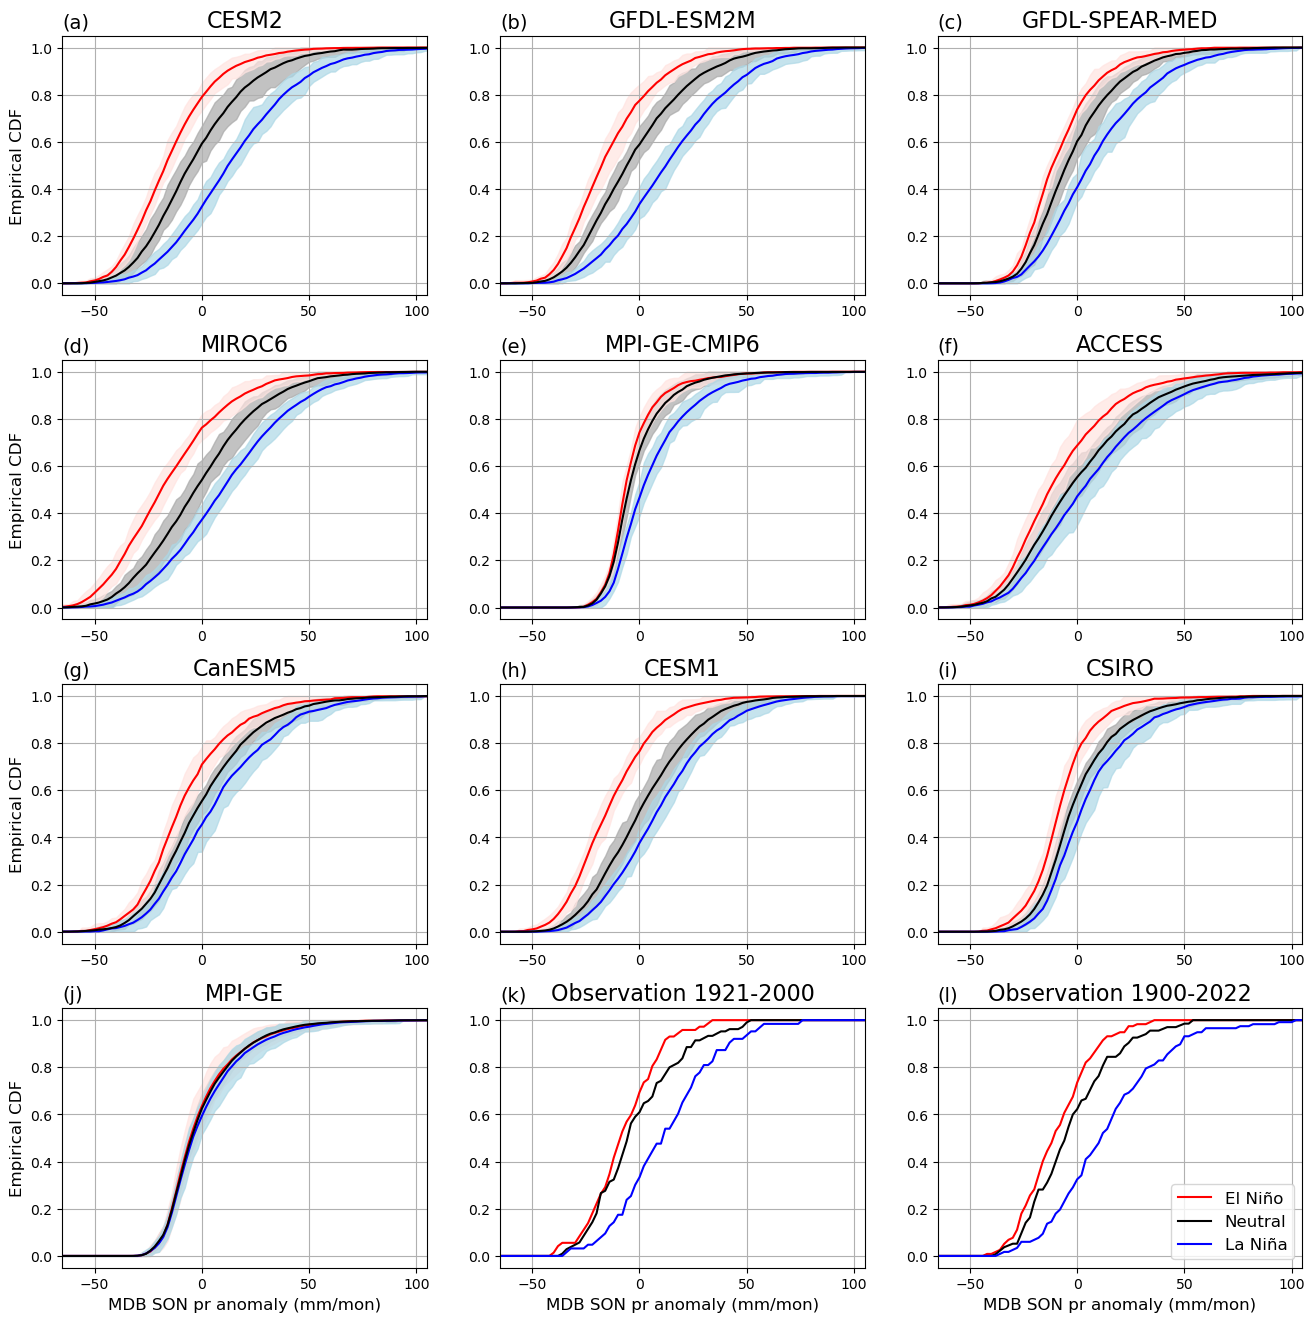

In [57]:
fig, axes = plt.subplots(4, 3, figsize=(16,16))
cdf_plot_same_time('CESM2', '(a)', 0, 0, x_precip_general, res_MDB_precip_CESM2_N_mean_1921_2000, res_MDB_precip_CESM2_EN_mean_1921_2000, res_MDB_precip_CESM2_LN_mean_1921_2000, res_MDB_precip_CESM2_N_std_1921_2000, res_MDB_precip_CESM2_EN_std_1921_2000, res_MDB_precip_CESM2_LN_std_1921_2000, xlabel = False, ylabel = True)
cdf_plot_same_time('GFDL-ESM2M', '(b)', 0, 1, x_precip_general, res_MDB_precip_GFDL_E_N_mean_1921_2000, res_MDB_precip_GFDL_E_EN_mean_1921_2000, res_MDB_precip_GFDL_E_LN_mean_1921_2000, res_MDB_precip_GFDL_E_N_std_1921_2000, res_MDB_precip_GFDL_E_EN_std_1921_2000, res_MDB_precip_GFDL_E_LN_std_1921_2000)
cdf_plot_same_time('GFDL-SPEAR-MED', '(c)', 0, 2, x_precip_general, res_MDB_precip_GFDL_N_mean_1921_2000, res_MDB_precip_GFDL_EN_mean_1921_2000, res_MDB_precip_GFDL_LN_mean_1921_2000, res_MDB_precip_GFDL_N_std_1921_2000, res_MDB_precip_GFDL_EN_std_1921_2000, res_MDB_precip_GFDL_LN_std_1921_2000)
cdf_plot_same_time('MIROC6', '(d)', 1, 0, x_precip_general, res_MDB_precip_MIROC6_N_mean_1921_2000, res_MDB_precip_MIROC6_EN_mean_1921_2000, res_MDB_precip_MIROC6_LN_mean_1921_2000, res_MDB_precip_MIROC6_N_std_1921_2000, res_MDB_precip_MIROC6_EN_std_1921_2000, res_MDB_precip_MIROC6_LN_std_1921_2000, xlabel = False, ylabel = True)
cdf_plot_same_time('MPI-GE-CMIP6', '(e)', 1, 1, x_precip_general, res_MDB_precip_MPI_GE_CMIP6_N_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000)
cdf_plot_same_time('ACCESS', '(f)', 1, 2, x_precip_general, res_MDB_precip_ACCESS_N_mean_1921_2000, res_MDB_precip_ACCESS_EN_mean_1921_2000, res_MDB_precip_ACCESS_LN_mean_1921_2000, res_MDB_precip_ACCESS_N_std_1921_2000, res_MDB_precip_ACCESS_EN_std_1921_2000, res_MDB_precip_ACCESS_LN_std_1921_2000)
cdf_plot_same_time('CanESM5', '(g)', 2, 0, x_precip_general, res_MDB_precip_CanESM5_N_mean_1921_2000, res_MDB_precip_CanESM5_EN_mean_1921_2000, res_MDB_precip_CanESM5_LN_mean_1921_2000, res_MDB_precip_CanESM5_N_std_1921_2000, res_MDB_precip_CanESM5_EN_std_1921_2000, res_MDB_precip_CanESM5_LN_std_1921_2000, xlabel = False, ylabel = True)
cdf_plot_same_time('CESM1', '(h)', 2, 1, x_precip_general, res_MDB_precip_CESM1_N_mean_1921_2000, res_MDB_precip_CESM1_EN_mean_1921_2000, res_MDB_precip_CESM1_LN_mean_1921_2000, res_MDB_precip_CESM1_N_std_1921_2000, res_MDB_precip_CESM1_EN_std_1921_2000, res_MDB_precip_CESM1_LN_std_1921_2000)
cdf_plot_same_time('CSIRO', '(i)', 2, 2, x_precip_general, res_MDB_precip_CSIRO_N_mean_1921_2000, res_MDB_precip_CSIRO_EN_mean_1921_2000, res_MDB_precip_CSIRO_LN_mean_1921_2000, res_MDB_precip_CSIRO_N_std_1921_2000, res_MDB_precip_CSIRO_EN_std_1921_2000, res_MDB_precip_CSIRO_LN_std_1921_2000)
cdf_plot_same_time('MPI-GE', '(j)', 3, 0, x_precip_general, res_MDB_precip_MPI_GE_N_mean_1921_2000, res_MDB_precip_MPI_GE_EN_mean_1921_2000, res_MDB_precip_MPI_GE_LN_mean_1921_2000, res_MDB_precip_MPI_GE_N_std_1921_2000, res_MDB_precip_MPI_GE_EN_std_1921_2000, res_MDB_precip_MPI_GE_LN_std_1921_2000, xlabel = True, ylabel = True)
cdf_plot_same_time_obs('Observation 1921-2000', '(k)', 3, 1, x_precip_general, res_MDB_precip_obs_N_1921_2000, res_MDB_precip_obs_EN_1921_2000, res_MDB_precip_obs_LN_1921_2000, xlabel = True, ylabel = False)
cdf_plot_same_time_obs('Observation 1900-2022', '(l)', 3, 2, x_precip_general, res_MDB_precip_obs_N_1900_2022, res_MDB_precip_obs_EN_1900_2022, res_MDB_precip_obs_LN_1900_2022, xlabel = True, ylabel = False)

plt.legend(['El Niño','Neutral','La Niña'], loc = 'lower right', fontsize = 12)
plt.subplots_adjust(wspace=0.2,hspace=0.25)

plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/Fig2_CDF.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()

## Figure 3. Future change of CDF and Rainfall Risk

### 9 panels of CDF

In [107]:
def cdf_plot_same_enso(ax_list, name, alphabet_list, x_precip, mean_N_1921_2000, mean_N_2001_2050, mean_N_2051_2100, std_N_1921_2000, std_N_2001_2050, std_N_2051_2100,\
                       mean_EN_1921_2000, mean_EN_2001_2050, mean_EN_2051_2100, std_EN_1921_2000, std_EN_2001_2050, std_EN_2051_2100,\
                       mean_LN_1921_2000, mean_LN_2001_2050, mean_LN_2051_2100, std_LN_1921_2000, std_LN_2001_2050, std_LN_2051_2100,\
                       xlabel = False):
    ax = ax_list[0]
    ax.annotate(alphabet_list[0], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    ax.plot(x_precip, mean_N_1921_2000, color='grey')
    ax.plot(x_precip, mean_N_2001_2050, color='dimgrey')
    ax.plot(x_precip, mean_N_2051_2100, color='black')
    ax.set_ylabel(name, fontsize = 16)
    
    # 10th-90th percentile
    ax.fill_between(x_precip, std_N_2051_2100[0], std_N_2051_2100[1], color='darkgrey', alpha = 0.8)
    ax.fill_between(x_precip, std_N_2001_2050[0], std_N_2001_2050[1], color='silver', alpha = 0.8)
    ax.fill_between(x_precip, std_N_1921_2000[0], std_N_1921_2000[1], color='gainsboro', alpha = 0.8)
    
    ax = ax_list[1]
    ax.annotate(alphabet_list[1], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    ax.plot(x_precip, mean_EN_1921_2000, color='hotpink')
    ax.plot(x_precip, mean_EN_2001_2050, color='red')
    ax.plot(x_precip, mean_EN_2051_2100, color='brown')

    # 10th-90th percentile
    ax.fill_between(x_precip, std_EN_2051_2100[0], std_EN_2051_2100[1], color='indianred', alpha = 0.8)
    ax.fill_between(x_precip, std_EN_2001_2050[0], std_EN_2001_2050[1], color='lightcoral', alpha = 0.8)
    ax.fill_between(x_precip, std_EN_1921_2000[0], std_EN_1921_2000[1], color='lightpink', alpha = 0.6)
    
    ax = ax_list[2]
    ax.annotate(alphabet_list[2], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    ax.plot(x_precip, mean_LN_1921_2000, color='royalblue')
    ax.plot(x_precip, mean_LN_2001_2050, color='blue')
    ax.plot(x_precip, mean_LN_2051_2100, color='navy')

    # 10th-90th percentile
    ax.fill_between(x_precip, std_LN_2051_2100[0], std_LN_2051_2100[1], color='cornflowerblue', alpha = 0.8)
    ax.fill_between(x_precip, std_LN_2001_2050[0], std_LN_2001_2050[1], color='skyblue', alpha = 0.8)
    ax.fill_between(x_precip, std_LN_1921_2000[0], std_LN_1921_2000[1], color='powderblue', alpha = 0.7)

    for i in range(3):
        ax_list[i].set_xlim((-80,120))
        ax_list[i].set_xticks(np.arange(-80,121,40))
        ax_list[i].grid()
        if xlabel == True:
            ax_list[i].set_xlabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)

### 6 panels of FAR and RR

In [59]:
def probability(precip_file):
    P = []
    total_year = precip_file.count()
    for precip in x_precip_general:
        if precip < 0:
            num_year_at_precip = precip_file.where(precip_file<=precip, drop = True).count()
        elif precip == 0:
            num_year_at_precip = np.nan
        elif precip > 0:
            num_year_at_precip = precip_file.where(precip_file>=precip, drop = True).count()
        
        prob = num_year_at_precip/total_year
        P.append(prob)
    return xr.concat(P, dim = 'probability')

In [60]:
# FAR for all members at once 
def FAR_RR_calculation(ens_num, neutral_file, elnino_file, lanina_file):
    FAR_EN = []
    FAR_LN = []
    RR_EN = []
    RR_LN = []

    P0 = probability(xr.concat(neutral_file, dim = 'ens_number'))
    P1_EN = probability(xr.concat(elnino_file, dim = 'ens_number'))
    P1_LN = probability(xr.concat(lanina_file, dim = 'ens_number'))
    
    np.seterr(divide='ignore')
    np.seterr(invalid='ignore')
    
    FAR_EN.append(1 - (P0 / P1_EN))
    FAR_LN.append(1 - (P0 / P1_LN))
    RR_EN.append(P1_EN / P0)
    RR_LN.append(P1_LN / P0)

    return xr.concat(FAR_EN, dim = 'ens_number'), xr.concat(FAR_LN, dim = 'ens_number'), xr.concat(RR_EN, dim = 'ens_number'), xr.concat(RR_LN, dim = 'ens_number')

In [61]:
# CESM2

MDB_CESM2_SON_FAR_EN_1921_2000, MDB_CESM2_SON_FAR_LN_1921_2000, MDB_CESM2_SON_RR_EN_1921_2000, MDB_CESM2_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_CESM2, MDB_precip_CESM2_SON_N_1921_2000, MDB_precip_CESM2_SON_EN_1921_2000, MDB_precip_CESM2_SON_LN_1921_2000)
MDB_CESM2_SON_FAR_EN_2001_2050, MDB_CESM2_SON_FAR_LN_2001_2050, MDB_CESM2_SON_RR_EN_2001_2050, MDB_CESM2_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_CESM2, MDB_precip_CESM2_SON_N_2001_2050, MDB_precip_CESM2_SON_EN_2001_2050, MDB_precip_CESM2_SON_LN_2001_2050)
MDB_CESM2_SON_FAR_EN_2051_2100, MDB_CESM2_SON_FAR_LN_2051_2100, MDB_CESM2_SON_RR_EN_2051_2100, MDB_CESM2_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_CESM2, MDB_precip_CESM2_SON_N_2051_2100, MDB_precip_CESM2_SON_EN_2051_2100, MDB_precip_CESM2_SON_LN_2051_2100)

In [62]:
# GFDL_ESM2M

MDB_GFDL_E_SON_FAR_EN_1921_2000, MDB_GFDL_E_SON_FAR_LN_1921_2000, MDB_GFDL_E_SON_RR_EN_1921_2000, MDB_GFDL_E_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_GFDL_E, MDB_precip_GFDL_E_SON_N_1921_2000, MDB_precip_GFDL_E_SON_EN_1921_2000, MDB_precip_GFDL_E_SON_LN_1921_2000)
MDB_GFDL_E_SON_FAR_EN_2001_2050, MDB_GFDL_E_SON_FAR_LN_2001_2050, MDB_GFDL_E_SON_RR_EN_2001_2050, MDB_GFDL_E_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_GFDL_E, MDB_precip_GFDL_E_SON_N_2001_2050, MDB_precip_GFDL_E_SON_EN_2001_2050, MDB_precip_GFDL_E_SON_LN_2001_2050)
MDB_GFDL_E_SON_FAR_EN_2051_2100, MDB_GFDL_E_SON_FAR_LN_2051_2100, MDB_GFDL_E_SON_RR_EN_2051_2100, MDB_GFDL_E_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_GFDL_E, MDB_precip_GFDL_E_SON_N_2051_2100, MDB_precip_GFDL_E_SON_EN_2051_2100, MDB_precip_GFDL_E_SON_LN_2051_2100)

In [63]:
# GFDL_SPEAR_MED

MDB_GFDL_SON_FAR_EN_1921_2000, MDB_GFDL_SON_FAR_LN_1921_2000, MDB_GFDL_SON_RR_EN_1921_2000, MDB_GFDL_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_GFDL, MDB_precip_GFDL_SON_N_1921_2000, MDB_precip_GFDL_SON_EN_1921_2000, MDB_precip_GFDL_SON_LN_1921_2000)
MDB_GFDL_SON_FAR_EN_2001_2050, MDB_GFDL_SON_FAR_LN_2001_2050, MDB_GFDL_SON_RR_EN_2001_2050, MDB_GFDL_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_GFDL, MDB_precip_GFDL_SON_N_2001_2050, MDB_precip_GFDL_SON_EN_2001_2050, MDB_precip_GFDL_SON_LN_2001_2050)
MDB_GFDL_SON_FAR_EN_2051_2100, MDB_GFDL_SON_FAR_LN_2051_2100, MDB_GFDL_SON_RR_EN_2051_2100, MDB_GFDL_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_GFDL, MDB_precip_GFDL_SON_N_2051_2100, MDB_precip_GFDL_SON_EN_2051_2100, MDB_precip_GFDL_SON_LN_2051_2100)

In [64]:
# MIROC6

MDB_MIROC6_SON_FAR_EN_1921_2000, MDB_MIROC6_SON_FAR_LN_1921_2000, MDB_MIROC6_SON_RR_EN_1921_2000, MDB_MIROC6_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_MIROC6, MDB_precip_MIROC6_SON_N_1921_2000, MDB_precip_MIROC6_SON_EN_1921_2000, MDB_precip_MIROC6_SON_LN_1921_2000)
MDB_MIROC6_SON_FAR_EN_2001_2050, MDB_MIROC6_SON_FAR_LN_2001_2050, MDB_MIROC6_SON_RR_EN_2001_2050, MDB_MIROC6_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_MIROC6, MDB_precip_MIROC6_SON_N_2001_2050, MDB_precip_MIROC6_SON_EN_2001_2050, MDB_precip_MIROC6_SON_LN_2001_2050)
MDB_MIROC6_SON_FAR_EN_2051_2100, MDB_MIROC6_SON_FAR_LN_2051_2100, MDB_MIROC6_SON_RR_EN_2051_2100, MDB_MIROC6_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_MIROC6, MDB_precip_MIROC6_SON_N_2051_2100, MDB_precip_MIROC6_SON_EN_2051_2100, MDB_precip_MIROC6_SON_LN_2051_2100)

In [65]:
# MPI_GE_CMIP6

MDB_MPI_GE_CMIP6_SON_FAR_EN_1921_2000, MDB_MPI_GE_CMIP6_SON_FAR_LN_1921_2000, MDB_MPI_GE_CMIP6_SON_RR_EN_1921_2000, MDB_MPI_GE_CMIP6_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_MPI_GE_CMIP6, MDB_precip_MPI_GE_CMIP6_SON_N_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_EN_1921_2000, MDB_precip_MPI_GE_CMIP6_SON_LN_1921_2000)
MDB_MPI_GE_CMIP6_SON_FAR_EN_2001_2050, MDB_MPI_GE_CMIP6_SON_FAR_LN_2001_2050, MDB_MPI_GE_CMIP6_SON_RR_EN_2001_2050, MDB_MPI_GE_CMIP6_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_MPI_GE_CMIP6, MDB_precip_MPI_GE_CMIP6_SON_N_2001_2050, MDB_precip_MPI_GE_CMIP6_SON_EN_2001_2050, MDB_precip_MPI_GE_CMIP6_SON_LN_2001_2050)
MDB_MPI_GE_CMIP6_SON_FAR_EN_2051_2100, MDB_MPI_GE_CMIP6_SON_FAR_LN_2051_2100, MDB_MPI_GE_CMIP6_SON_RR_EN_2051_2100, MDB_MPI_GE_CMIP6_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_MPI_GE_CMIP6, MDB_precip_MPI_GE_CMIP6_SON_N_2051_2100, MDB_precip_MPI_GE_CMIP6_SON_EN_2051_2100, MDB_precip_MPI_GE_CMIP6_SON_LN_2051_2100)

In [102]:
# Ploting for FAR and RR

def plot_FAR(ax, xaxis, FAR_EN, FAR_LN, ylim = (0,1), EN_color = 'red', LN_color = 'blue', alpha = 1.0, xlabel = False):
    EN_mean = FAR_EN.mean(dim = 'ens_number', skipna = True)
    LN_mean = FAR_LN.mean(dim = 'ens_number', skipna = True)
    
    ax.plot(xaxis[:40], EN_mean[:40], EN_color)
    ax.plot(xaxis[41:], LN_mean[41:], LN_color)
    ax.set_ylim(ylim)
    ax.grid()
    if xlabel == True:
        ax.set_xlabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)

def plot_RR(ax, xaxis, RR_EN, RR_LN, ylim = (0.1,10), EN_color = 'red', LN_color = 'blue', alpha = 1.0, xlabel = False):
    EN_mean = RR_EN.mean(dim = 'ens_number', skipna = True)
    LN_mean = RR_LN.mean(dim = 'ens_number', skipna = True)
        
    ax.plot(xaxis, EN_mean, EN_color)
    ax.plot(xaxis, LN_mean, LN_color)
    ax.set_ylim(ylim)
    ax.set_yscale("log") 
    ax.grid()
    if xlabel == True:
        ax.set_xlabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)

def plot_FAR_RR(ax_list, alphabet_list, FAR_EN_1921_2000, FAR_LN_1921_2000,\
               FAR_EN_2001_2050, FAR_LN_2001_2050,\
               FAR_EN_2051_2100, FAR_LN_2051_2100,\
               RR_EN_1921_2000, RR_LN_1921_2000,\
               RR_EN_2001_2050, RR_LN_2001_2050,\
               RR_EN_2051_2100, RR_LN_2051_2100,\
               xlabel = False):
    plot_FAR(ax_list[0], x_precip_FAR, FAR_EN_1921_2000, FAR_LN_1921_2000, EN_color = 'pink', LN_color = 'royalblue', alpha = 0.6, xlabel = xlabel)  
    plot_FAR(ax_list[0], x_precip_FAR, FAR_EN_2001_2050, FAR_LN_2001_2050, EN_color = 'red', LN_color = 'blue', alpha = 0.6, xlabel = xlabel)
    plot_FAR(ax_list[0], x_precip_FAR, FAR_EN_2051_2100, FAR_LN_2051_2100, EN_color = 'brown', LN_color = 'navy', alpha = 0.6, xlabel = xlabel)
    
    plot_RR(ax_list[1], x_precip_FAR, RR_EN_1921_2000, RR_LN_1921_2000, EN_color = 'pink', LN_color = 'royalblue', alpha = 0.6, xlabel = xlabel)
    plot_RR(ax_list[1], x_precip_FAR, RR_EN_2001_2050, RR_LN_2001_2050, EN_color = 'red', LN_color = 'blue', alpha = 0.6, xlabel = xlabel)
    plot_RR(ax_list[1], x_precip_FAR, RR_EN_2051_2100, RR_LN_2051_2100, EN_color = 'brown', LN_color = 'navy', alpha = 0.6, xlabel = xlabel)
    
    for i in range(2):
        ax_list[i].set_xlim((-80,120))
        ax_list[i].set_xticks(np.arange(-80,121,40))
        ax_list[i].annotate(alphabet_list[i], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)


In [103]:
x_precip_FAR = x_precip_general

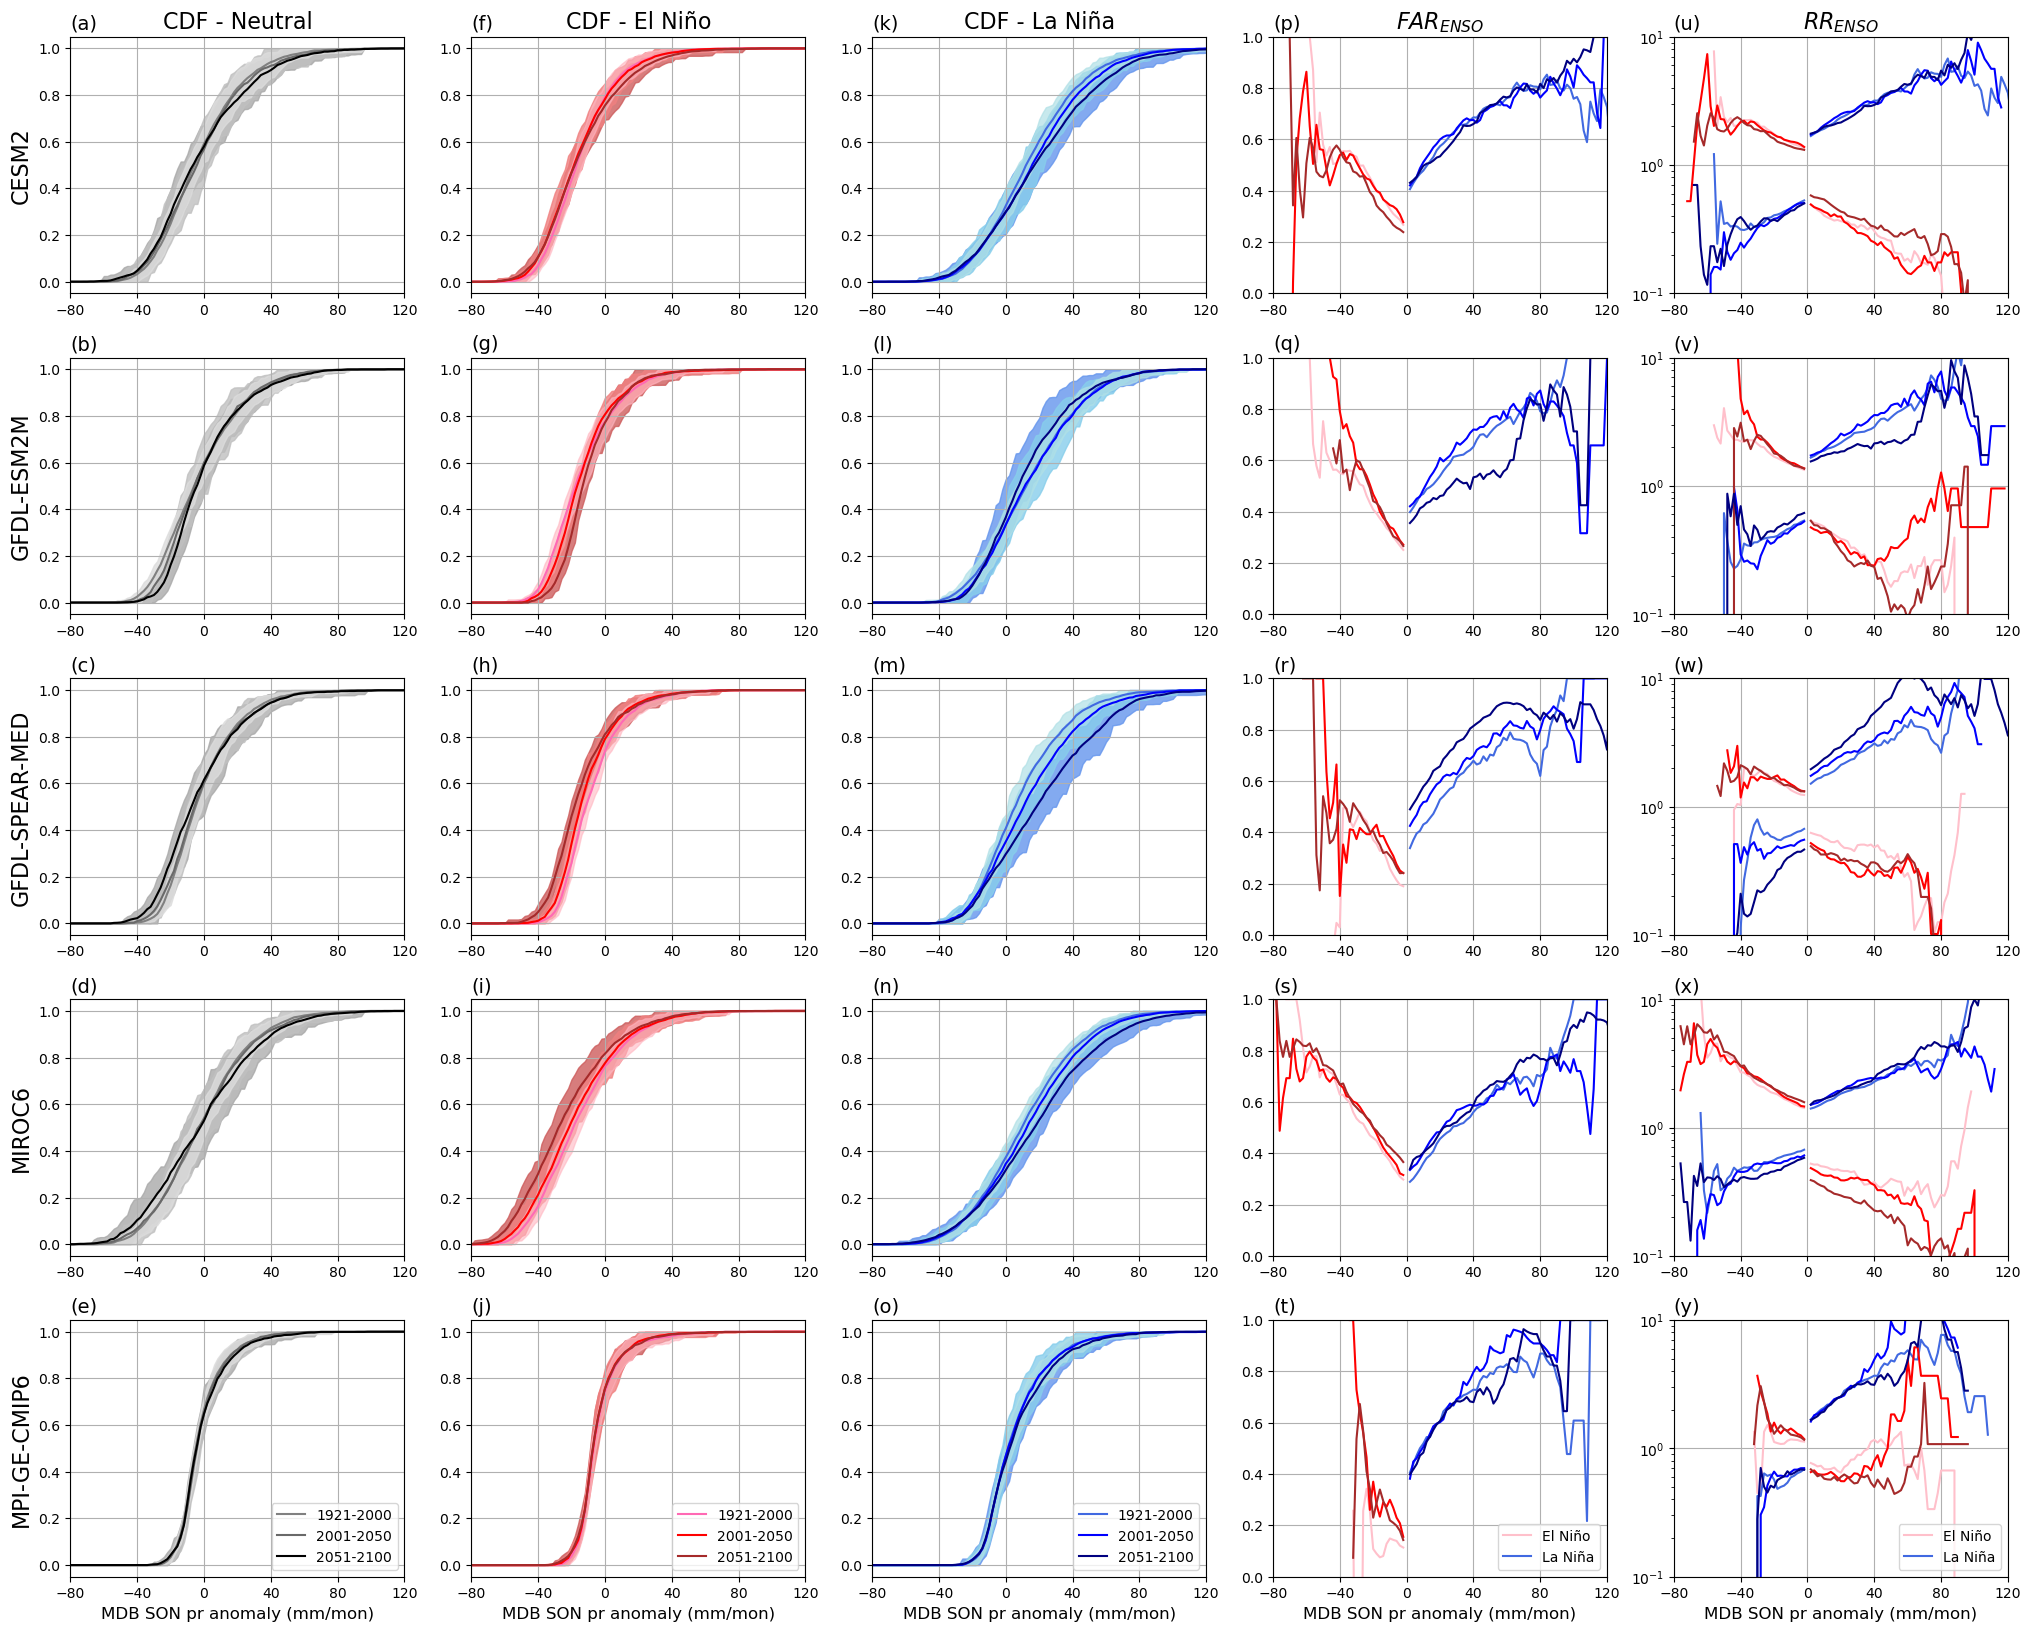

In [108]:
fig, axes = plt.subplots(5, 5, figsize=(25,20))
cdf_plot_same_enso(axes[0,0:3], 'CESM2', ['(a)','(f)','(k)'], x_precip_general, res_MDB_precip_CESM2_N_mean_1921_2000, res_MDB_precip_CESM2_N_mean_2001_2050, res_MDB_precip_CESM2_N_mean_2051_2100, res_MDB_precip_CESM2_N_std_1921_2000, res_MDB_precip_CESM2_N_std_2001_2050, res_MDB_precip_CESM2_N_std_2051_2100,\
                       res_MDB_precip_CESM2_EN_mean_1921_2000, res_MDB_precip_CESM2_EN_mean_2001_2050, res_MDB_precip_CESM2_EN_mean_2051_2100, res_MDB_precip_CESM2_EN_std_1921_2000, res_MDB_precip_CESM2_EN_std_2001_2050, res_MDB_precip_CESM2_EN_std_2051_2100,\
                       res_MDB_precip_CESM2_LN_mean_1921_2000, res_MDB_precip_CESM2_LN_mean_2001_2050, res_MDB_precip_CESM2_LN_mean_2051_2100, res_MDB_precip_CESM2_LN_std_1921_2000, res_MDB_precip_CESM2_LN_std_2001_2050, res_MDB_precip_CESM2_LN_std_2051_2100)
cdf_plot_same_enso(axes[1,0:3], 'GFDL-ESM2M', ['(b)','(g)','(l)'], x_precip_general, res_MDB_precip_GFDL_E_N_mean_1921_2000, res_MDB_precip_GFDL_E_N_mean_2001_2050, res_MDB_precip_GFDL_E_N_mean_2051_2100, res_MDB_precip_GFDL_E_N_std_1921_2000, res_MDB_precip_GFDL_E_N_std_2001_2050, res_MDB_precip_GFDL_E_N_std_2051_2100,\
                       res_MDB_precip_GFDL_E_EN_mean_1921_2000, res_MDB_precip_GFDL_E_EN_mean_2001_2050, res_MDB_precip_GFDL_E_EN_mean_2051_2100, res_MDB_precip_GFDL_E_EN_std_1921_2000, res_MDB_precip_GFDL_E_EN_std_2001_2050, res_MDB_precip_GFDL_E_EN_std_2051_2100,\
                       res_MDB_precip_GFDL_E_LN_mean_1921_2000, res_MDB_precip_GFDL_E_LN_mean_2001_2050, res_MDB_precip_GFDL_E_LN_mean_2051_2100, res_MDB_precip_GFDL_E_LN_std_1921_2000, res_MDB_precip_GFDL_E_LN_std_2001_2050, res_MDB_precip_GFDL_E_LN_std_2051_2100)
cdf_plot_same_enso(axes[2,0:3], 'GFDL-SPEAR-MED', ['(c)','(h)','(m)'], x_precip_general, res_MDB_precip_GFDL_N_mean_1921_2000, res_MDB_precip_GFDL_N_mean_2001_2050, res_MDB_precip_GFDL_N_mean_2051_2100, res_MDB_precip_GFDL_N_std_1921_2000, res_MDB_precip_GFDL_N_std_2001_2050, res_MDB_precip_GFDL_N_std_2051_2100,\
                       res_MDB_precip_GFDL_EN_mean_1921_2000, res_MDB_precip_GFDL_EN_mean_2001_2050, res_MDB_precip_GFDL_EN_mean_2051_2100, res_MDB_precip_GFDL_EN_std_1921_2000, res_MDB_precip_GFDL_EN_std_2001_2050, res_MDB_precip_GFDL_EN_std_2051_2100,\
                       res_MDB_precip_GFDL_LN_mean_1921_2000, res_MDB_precip_GFDL_LN_mean_2001_2050, res_MDB_precip_GFDL_LN_mean_2051_2100, res_MDB_precip_GFDL_LN_std_1921_2000, res_MDB_precip_GFDL_LN_std_2001_2050, res_MDB_precip_GFDL_LN_std_2051_2100)
cdf_plot_same_enso(axes[3,0:3], 'MIROC6', ['(d)','(i)','(n)'], x_precip_general, res_MDB_precip_MIROC6_N_mean_1921_2000, res_MDB_precip_MIROC6_N_mean_2001_2050, res_MDB_precip_MIROC6_N_mean_2051_2100, res_MDB_precip_MIROC6_N_std_1921_2000, res_MDB_precip_MIROC6_N_std_2001_2050, res_MDB_precip_MIROC6_N_std_2051_2100,\
                       res_MDB_precip_MIROC6_EN_mean_1921_2000, res_MDB_precip_MIROC6_EN_mean_2001_2050, res_MDB_precip_MIROC6_EN_mean_2051_2100, res_MDB_precip_MIROC6_EN_std_1921_2000, res_MDB_precip_MIROC6_EN_std_2001_2050, res_MDB_precip_MIROC6_EN_std_2051_2100,\
                       res_MDB_precip_MIROC6_LN_mean_1921_2000, res_MDB_precip_MIROC6_LN_mean_2001_2050, res_MDB_precip_MIROC6_LN_mean_2051_2100, res_MDB_precip_MIROC6_LN_std_1921_2000, res_MDB_precip_MIROC6_LN_std_2001_2050, res_MDB_precip_MIROC6_LN_std_2051_2100)
cdf_plot_same_enso(axes[4,0:3], 'MPI-GE-CMIP6', ['(e)','(j)','(o)'], x_precip_general, res_MDB_precip_MPI_GE_CMIP6_N_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_mean_2001_2050, res_MDB_precip_MPI_GE_CMIP6_N_mean_2051_2100, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_N_std_2051_2100,\
                       res_MDB_precip_MPI_GE_CMIP6_EN_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2001_2050, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2051_2100, res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_EN_std_2051_2100,\
                       res_MDB_precip_MPI_GE_CMIP6_LN_mean_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2001_2050, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2051_2100, res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_LN_std_2051_2100, xlabel = True)

plot_FAR_RR(axes[0,3:5], ['(p)','(u)'], MDB_CESM2_SON_FAR_EN_1921_2000, MDB_CESM2_SON_FAR_LN_1921_2000, MDB_CESM2_SON_FAR_EN_2001_2050, MDB_CESM2_SON_FAR_LN_2001_2050, MDB_CESM2_SON_FAR_EN_2051_2100, MDB_CESM2_SON_FAR_LN_2051_2100,\
               MDB_CESM2_SON_RR_EN_1921_2000, MDB_CESM2_SON_RR_LN_1921_2000, MDB_CESM2_SON_RR_EN_2001_2050, MDB_CESM2_SON_RR_LN_2001_2050, MDB_CESM2_SON_RR_EN_2051_2100, MDB_CESM2_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[1,3:5], ['(q)','(v)'], MDB_GFDL_E_SON_FAR_EN_1921_2000, MDB_GFDL_E_SON_FAR_LN_1921_2000, MDB_GFDL_E_SON_FAR_EN_2001_2050, MDB_GFDL_E_SON_FAR_LN_2001_2050, MDB_GFDL_E_SON_FAR_EN_2051_2100, MDB_GFDL_E_SON_FAR_LN_2051_2100,\
               MDB_GFDL_E_SON_RR_EN_1921_2000, MDB_GFDL_E_SON_RR_LN_1921_2000, MDB_GFDL_E_SON_RR_EN_2001_2050, MDB_GFDL_E_SON_RR_LN_2001_2050, MDB_GFDL_E_SON_RR_EN_2051_2100, MDB_GFDL_E_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[2,3:5], ['(r)','(w)'], MDB_GFDL_SON_FAR_EN_1921_2000, MDB_GFDL_SON_FAR_LN_1921_2000, MDB_GFDL_SON_FAR_EN_2001_2050, MDB_GFDL_SON_FAR_LN_2001_2050, MDB_GFDL_SON_FAR_EN_2051_2100, MDB_GFDL_SON_FAR_LN_2051_2100,\
               MDB_GFDL_SON_RR_EN_1921_2000, MDB_GFDL_SON_RR_LN_1921_2000, MDB_GFDL_SON_RR_EN_2001_2050, MDB_GFDL_SON_RR_LN_2001_2050, MDB_GFDL_SON_RR_EN_2051_2100, MDB_GFDL_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[3,3:5], ['(s)','(x)'], MDB_MIROC6_SON_FAR_EN_1921_2000, MDB_MIROC6_SON_FAR_LN_1921_2000, MDB_MIROC6_SON_FAR_EN_2001_2050, MDB_MIROC6_SON_FAR_LN_2001_2050, MDB_MIROC6_SON_FAR_EN_2051_2100, MDB_MIROC6_SON_FAR_LN_2051_2100,\
               MDB_MIROC6_SON_RR_EN_1921_2000, MDB_MIROC6_SON_RR_LN_1921_2000, MDB_MIROC6_SON_RR_EN_2001_2050, MDB_MIROC6_SON_RR_LN_2001_2050, MDB_MIROC6_SON_RR_EN_2051_2100, MDB_MIROC6_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[4,3:5], ['(t)','(y)'], MDB_MPI_GE_CMIP6_SON_FAR_EN_1921_2000, MDB_MPI_GE_CMIP6_SON_FAR_LN_1921_2000, MDB_MPI_GE_CMIP6_SON_FAR_EN_2001_2050, MDB_MPI_GE_CMIP6_SON_FAR_LN_2001_2050, MDB_MPI_GE_CMIP6_SON_FAR_EN_2051_2100, MDB_MPI_GE_CMIP6_SON_FAR_LN_2051_2100,\
               MDB_MPI_GE_CMIP6_SON_RR_EN_1921_2000, MDB_MPI_GE_CMIP6_SON_RR_LN_1921_2000, MDB_MPI_GE_CMIP6_SON_RR_EN_2001_2050, MDB_MPI_GE_CMIP6_SON_RR_LN_2001_2050, MDB_MPI_GE_CMIP6_SON_RR_EN_2051_2100, MDB_MPI_GE_CMIP6_SON_RR_LN_2051_2100,\
               xlabel = True)

axes[0,0].set_title('CDF - Neutral', fontsize = 16)
axes[0,1].set_title('CDF - El Niño', fontsize = 16)
axes[0,2].set_title('CDF - La Niña', fontsize = 16)
axes[0,3].set_title('$FAR_{ENSO}$', fontsize = 16)
axes[0,4].set_title('$RR_{ENSO}$', fontsize = 16)

axes[4,0].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')
axes[4,1].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')
axes[4,2].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')
axes[4,3].legend(['El Niño','La Niña'], loc = 'lower right')
axes[4,4].legend(['El Niño','La Niña'], loc = 'lower right')

plt.subplots_adjust(wspace=0.2,hspace=0.25)

plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/Fig3_future_CDF_FAR.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()

#### Test La Nina 50mm distribution change

In [69]:
x_precip_general[70]

60.0

In [70]:
# CESM2 - almost no difference in FAR over 3 time periods

# CDF diff between La Nina and Neutral at 40mm for 3 time periods
cdf_diff_LN_neutral_1921_2000 = res_MDB_precip_CESM2_N_mean_1921_2000 - res_MDB_precip_CESM2_LN_mean_1921_2000
cdf_diff_LN_neutral_2001_2050 = res_MDB_precip_CESM2_N_mean_2001_2050 - res_MDB_precip_CESM2_LN_mean_2001_2050
cdf_diff_LN_neutral_2051_2100 = res_MDB_precip_CESM2_N_mean_2051_2100 - res_MDB_precip_CESM2_LN_mean_2051_2100

print('The CDF diff between La Nina and Neutral at 50mm for 1921 - 2000 is:', np.round(cdf_diff_LN_neutral_1921_2000[65], 3))
print('The CDF diff between La Nina and Neutral at 50mm for 2001 - 2050 is:', np.round(cdf_diff_LN_neutral_2001_2050[65], 3))
print('The CDF diff between La Nina and Neutral at 50mm for 2051 - 2100 is:', np.round(cdf_diff_LN_neutral_2051_2100[65], 3))

# FAR for La Nina at 40mm for 3 time periods
print('The FAR for La Nina at 50mm for 1921 - 2000 is:', MDB_CESM2_SON_FAR_LN_1921_2000.squeeze()[65].round(3).values)
print('The FAR for La Nina at 50mm for 2001 - 2050 is:', MDB_CESM2_SON_FAR_LN_2001_2050.squeeze()[65].round(3).values)
print('The FAR for La Nina at 50mm for 2051 - 2100 is:', MDB_CESM2_SON_FAR_LN_2051_2100.squeeze()[65].round(3).values)

The CDF diff between La Nina and Neutral at 50mm for 1921 - 2000 is: 0.086
The CDF diff between La Nina and Neutral at 50mm for 2001 - 2050 is: 0.105
The CDF diff between La Nina and Neutral at 50mm for 2051 - 2100 is: 0.142
The FAR for La Nina at 50mm for 1921 - 2000 is: 0.728
The FAR for La Nina at 50mm for 2001 - 2050 is: 0.726
The FAR for La Nina at 50mm for 2051 - 2100 is: 0.733


In [71]:
# MIROC6 - a little change in FAR over 3 time periods

# CDF diff between La Nina and Neutral at 40mm for 3 time periods
cdf_diff_LN_neutral_1921_2000 = res_MDB_precip_MIROC6_N_mean_1921_2000 - res_MDB_precip_MIROC6_LN_mean_1921_2000
cdf_diff_LN_neutral_2001_2050 = res_MDB_precip_MIROC6_N_mean_2001_2050 - res_MDB_precip_MIROC6_LN_mean_2001_2050
cdf_diff_LN_neutral_2051_2100 = res_MDB_precip_MIROC6_N_mean_2051_2100 - res_MDB_precip_MIROC6_LN_mean_2051_2100

print('The CDF diff between La Nina and Neutral at 50mm for 1921 - 2000 is:', np.round(cdf_diff_LN_neutral_1921_2000[65], 3))
print('The CDF diff between La Nina and Neutral at 50mm for 2001 - 2050 is:', np.round(cdf_diff_LN_neutral_2001_2050[65], 3))
print('The CDF diff between La Nina and Neutral at 50mm for 2051 - 2100 is:', np.round(cdf_diff_LN_neutral_2051_2100[65], 3))

# FAR for La Nina at 40mm for 3 time periods
print('The FAR for La Nina at 50mm for 1921 - 2000 is:', MDB_MIROC6_SON_FAR_LN_1921_2000.squeeze()[65].round(3).values)
print('The FAR for La Nina at 50mm for 2001 - 2050 is:', MDB_MIROC6_SON_FAR_LN_2001_2050.squeeze()[65].round(3).values)
print('The FAR for La Nina at 40mm for 2051 - 2100 is:', MDB_MIROC6_SON_FAR_LN_2051_2100.squeeze()[65].round(3).values)

The CDF diff between La Nina and Neutral at 50mm for 1921 - 2000 is: 0.065
The CDF diff between La Nina and Neutral at 50mm for 2001 - 2050 is: 0.076
The CDF diff between La Nina and Neutral at 50mm for 2051 - 2100 is: 0.125
The FAR for La Nina at 50mm for 1921 - 2000 is: 0.62
The FAR for La Nina at 50mm for 2001 - 2050 is: 0.623
The FAR for La Nina at 40mm for 2051 - 2100 is: 0.665


In [72]:
# GFDL_SPEAR_MED - large increase in FAR over 3 time periods

# CDF diff between La Nina and Neutral at 40mm for 3 time periods
cdf_diff_LN_neutral_1921_2000 = res_MDB_precip_GFDL_N_mean_1921_2000 - res_MDB_precip_GFDL_LN_mean_1921_2000
cdf_diff_LN_neutral_2001_2050 = res_MDB_precip_GFDL_N_mean_2001_2050 - res_MDB_precip_GFDL_LN_mean_2001_2050
cdf_diff_LN_neutral_2051_2100 = res_MDB_precip_GFDL_N_mean_2051_2100 - res_MDB_precip_GFDL_LN_mean_2051_2100

print('The CDF diff between La Nina and Neutral at 50mm for 1921 - 2000 is:', np.round(cdf_diff_LN_neutral_1921_2000[65], 3))
print('The CDF diff between La Nina and Neutral at 50mm for 2001 - 2050 is:', np.round(cdf_diff_LN_neutral_2001_2050[65], 3))
print('The CDF diff between La Nina and Neutral at 50mm for 2051 - 2100 is:', np.round(cdf_diff_LN_neutral_2051_2100[65], 3))

# FAR for La Nina at 40mm for 3 time periods
print('The FAR for La Nina at 50mm for 1921 - 2000 is:', MDB_GFDL_SON_FAR_LN_1921_2000.squeeze()[65].round(3).values)
print('The FAR for La Nina at 50mm for 2001 - 2050 is:', MDB_GFDL_SON_FAR_LN_2001_2050.squeeze()[65].round(3).values)
print('The FAR for La Nina at 50mm for 2051 - 2100 is:', MDB_GFDL_SON_FAR_LN_2051_2100.squeeze()[65].round(3).values)

The CDF diff between La Nina and Neutral at 50mm for 1921 - 2000 is: 0.051
The CDF diff between La Nina and Neutral at 50mm for 2001 - 2050 is: 0.086
The CDF diff between La Nina and Neutral at 50mm for 2051 - 2100 is: 0.18
The FAR for La Nina at 50mm for 1921 - 2000 is: 0.703
The FAR for La Nina at 50mm for 2001 - 2050 is: 0.748
The FAR for La Nina at 50mm for 2051 - 2100 is: 0.858


### Figure S1 - Figure 3 no mean version - difference between 90th and 10th percentile

In [100]:
def cdf_plot_same_enso_percentile_diff(ax_list, name, alphabet_list, x_precip, std_N_1921_2000, std_N_2001_2050, std_N_2051_2100,\
                       std_EN_1921_2000, std_EN_2001_2050, std_EN_2051_2100,\
                       std_LN_1921_2000, std_LN_2001_2050, std_LN_2051_2100,\
                       xlabel = False):
    ax = ax_list[0]
    ax.annotate(alphabet_list[0], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    ax.set_ylabel(name, fontsize = 16)
    # 10th-90th percentile diff
    ax.plot(x_precip, (std_N_1921_2000[1] - std_N_1921_2000[0]), color='grey')
    ax.plot(x_precip, (std_N_2001_2050[1] - std_N_2001_2050[0]), color='dimgrey')
    ax.plot(x_precip, (std_N_2051_2100[1] - std_N_2051_2100[0]), color='black')
    
    ax = ax_list[1]
    ax.annotate(alphabet_list[1], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    # 10th-90th percentile diff
    ax.plot(x_precip, (std_EN_1921_2000[1] - std_EN_1921_2000[0]), color='pink')
    ax.plot(x_precip, (std_EN_2001_2050[1] - std_EN_2001_2050[0]), color='red')
    ax.plot(x_precip, (std_EN_2051_2100[1] - std_EN_2051_2100[0]), color='brown')
    
    ax = ax_list[2]
    ax.annotate(alphabet_list[2], xy=(0.00, 1.03), xycoords='axes fraction', fontsize=14)
    # 10th-90th percentile diff
    ax.plot(x_precip, (std_LN_1921_2000[1] - std_LN_1921_2000[0]), color='royalblue')
    ax.plot(x_precip, (std_LN_2001_2050[1] - std_LN_2001_2050[0]), color='blue')
    ax.plot(x_precip, (std_LN_2051_2100[1] - std_LN_2051_2100[0]), color='navy')

    for i in range(3):
        ax_list[i].set_xlim((-80,120))
        ax_list[i].set_xticks(np.arange(-80,121,40))
        ax_list[i].set_ylim((0,0.3))
        ax_list[i].grid()
        if xlabel == True:
            ax_list[i].set_xlabel('MDB SON pr anomaly (mm/mon)', fontsize = 12)

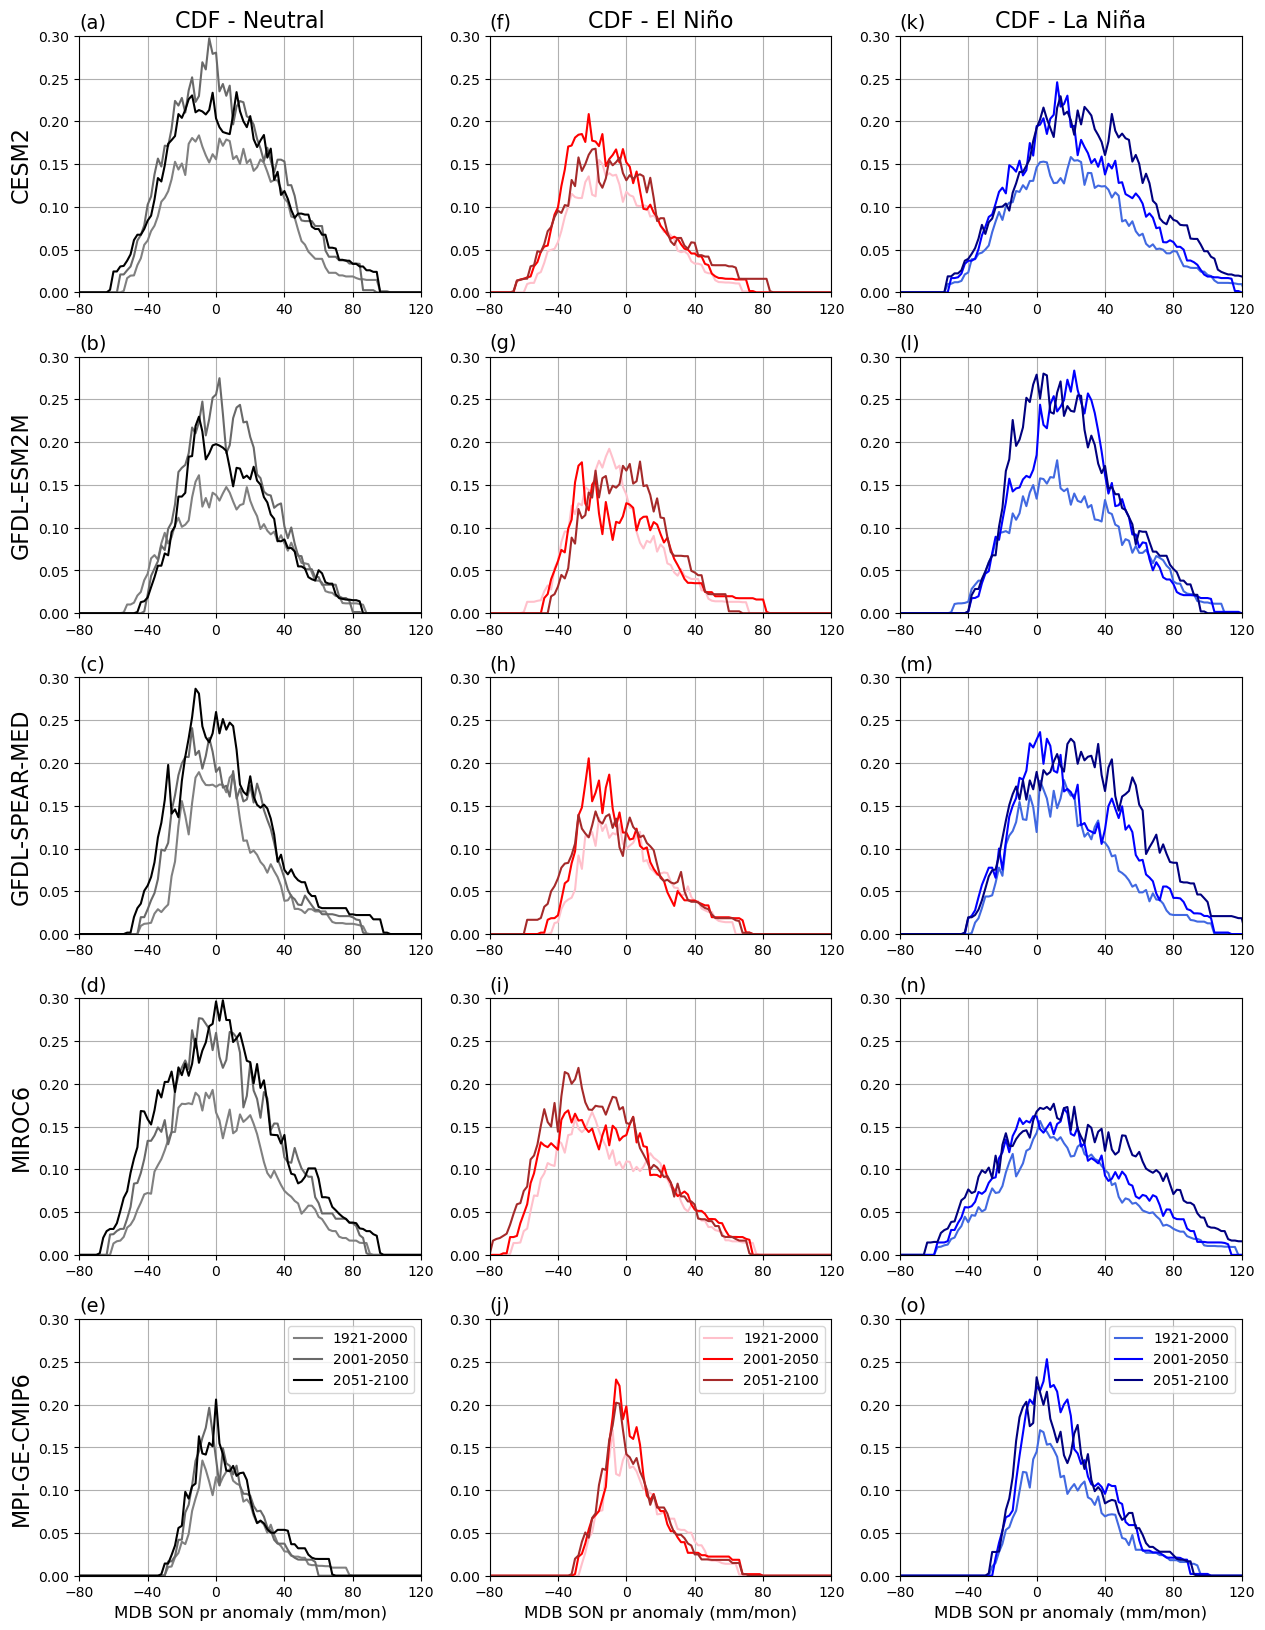

In [101]:
fig, axes = plt.subplots(5, 3, figsize=(15,20))
cdf_plot_same_enso_percentile_diff(axes[0,0:3], 'CESM2', ['(a)','(f)','(k)'], x_precip_general, res_MDB_precip_CESM2_N_std_1921_2000, res_MDB_precip_CESM2_N_std_2001_2050, res_MDB_precip_CESM2_N_std_2051_2100,\
                       res_MDB_precip_CESM2_EN_std_1921_2000, res_MDB_precip_CESM2_EN_std_2001_2050, res_MDB_precip_CESM2_EN_std_2051_2100,\
                       res_MDB_precip_CESM2_LN_std_1921_2000, res_MDB_precip_CESM2_LN_std_2001_2050, res_MDB_precip_CESM2_LN_std_2051_2100)
cdf_plot_same_enso_percentile_diff(axes[1,0:3], 'GFDL-ESM2M', ['(b)','(g)','(l)'], x_precip_general, res_MDB_precip_GFDL_E_N_std_1921_2000, res_MDB_precip_GFDL_E_N_std_2001_2050, res_MDB_precip_GFDL_E_N_std_2051_2100,\
                       res_MDB_precip_GFDL_E_EN_std_1921_2000, res_MDB_precip_GFDL_E_EN_std_2001_2050, res_MDB_precip_GFDL_E_EN_std_2051_2100,\
                       res_MDB_precip_GFDL_E_LN_std_1921_2000, res_MDB_precip_GFDL_E_LN_std_2001_2050, res_MDB_precip_GFDL_E_LN_std_2051_2100)
cdf_plot_same_enso_percentile_diff(axes[2,0:3], 'GFDL-SPEAR-MED', ['(c)','(h)','(m)'], x_precip_general, res_MDB_precip_GFDL_N_std_1921_2000, res_MDB_precip_GFDL_N_std_2001_2050, res_MDB_precip_GFDL_N_std_2051_2100,\
                       res_MDB_precip_GFDL_EN_std_1921_2000, res_MDB_precip_GFDL_EN_std_2001_2050, res_MDB_precip_GFDL_EN_std_2051_2100,\
                       res_MDB_precip_GFDL_LN_std_1921_2000, res_MDB_precip_GFDL_LN_std_2001_2050, res_MDB_precip_GFDL_LN_std_2051_2100)
cdf_plot_same_enso_percentile_diff(axes[3,0:3], 'MIROC6', ['(d)','(i)','(n)'], x_precip_general, res_MDB_precip_MIROC6_N_std_1921_2000, res_MDB_precip_MIROC6_N_std_2001_2050, res_MDB_precip_MIROC6_N_std_2051_2100,\
                       res_MDB_precip_MIROC6_EN_std_1921_2000, res_MDB_precip_MIROC6_EN_std_2001_2050, res_MDB_precip_MIROC6_EN_std_2051_2100,\
                       res_MDB_precip_MIROC6_LN_std_1921_2000, res_MDB_precip_MIROC6_LN_std_2001_2050, res_MDB_precip_MIROC6_LN_std_2051_2100)
cdf_plot_same_enso_percentile_diff(axes[4,0:3], 'MPI-GE-CMIP6', ['(e)','(j)','(o)'], x_precip_general, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_N_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_N_std_2051_2100,\
                       res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_EN_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_EN_std_2051_2100,\
                       res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000, res_MDB_precip_MPI_GE_CMIP6_LN_std_2001_2050, res_MDB_precip_MPI_GE_CMIP6_LN_std_2051_2100, xlabel = True)

axes[0,0].set_title('CDF - Neutral', fontsize = 16)
axes[0,1].set_title('CDF - El Niño', fontsize = 16)
axes[0,2].set_title('CDF - La Niña', fontsize = 16)

axes[4,0].legend(['1921-2000','2001-2050','2051-2100'], loc = 'upper right')
axes[4,1].legend(['1921-2000','2001-2050','2051-2100'], loc = 'upper right')
axes[4,2].legend(['1921-2000','2001-2050','2051-2100'], loc = 'upper right')

plt.subplots_adjust(wspace=0.2,hspace=0.25)

# plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/FigS1_CDF_spread.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()

## Supplementary Figures

### Figure 1: Medium events CDF

In [75]:
#CESM2
elnino_year_CESM2_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CESM2_med.npy',allow_pickle=True)
lanina_year_CESM2_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CESM2_med.npy',allow_pickle=True)

#GFDL-ESM2M
elnino_year_GFDL_E_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_GFDL_E_med.npy',allow_pickle=True)
lanina_year_GFDL_E_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_GFDL_E_med.npy',allow_pickle=True)

#GFDL-SPEAR-MED
elnino_year_GFDL_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_GFDL_med.npy',allow_pickle=True)
lanina_year_GFDL_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_GFDL_med.npy',allow_pickle=True)

#MIROC6
elnino_year_MIROC6_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_MIROC6_med.npy',allow_pickle=True)
lanina_year_MIROC6_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_MIROC6_med.npy',allow_pickle=True)

#MPI-GE-CMIP6
elnino_year_MPI_GE_CMIP6_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_MPI_GE_CMIP6_med.npy',allow_pickle=True)
lanina_year_MPI_GE_CMIP6_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_MPI_GE_CMIP6_med.npy',allow_pickle=True)

#ACCESS
elnino_year_ACCESS_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_ACCESS_med.npy',allow_pickle=True)
lanina_year_ACCESS_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_ACCESS_med.npy',allow_pickle=True)

#CanESM5
elnino_year_CanESM5_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CanESM5_med.npy',allow_pickle=True)
lanina_year_CanESM5_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CanESM5_med.npy',allow_pickle=True)

#CESM1
elnino_year_CESM1_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CESM1_med.npy',allow_pickle=True)
lanina_year_CESM1_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CESM1_med.npy',allow_pickle=True)

#CSIRO
elnino_year_CSIRO_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_CSIRO_med.npy',allow_pickle=True)
lanina_year_CSIRO_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_CSIRO_med.npy',allow_pickle=True)

#MPI-GE
elnino_year_MPI_GE_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/elnino_year_MPI_GE_med.npy',allow_pickle=True)
lanina_year_MPI_GE_med = np.load('/g/data/x77/ah3693/Rainfall_risk_project/lanina_year_MPI_GE_med.npy',allow_pickle=True)

In [79]:
# output 1) res at specific x values 2) ensemble mean res 3) ensemble std OR [ensemble 10th percentile, ensemble 90th percentile]
x_precip_general = np.linspace(-80,140,111)
x_percentile = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]

def cdf_evaluate(precip_list, ens_num, x_precip):
    res_precip = [stats.ecdf(precip_list[i].to_numpy()) for i in range(ens_num)]
    same_x_res = [res_precip[i].cdf.evaluate(x_precip) for i in range(ens_num)]

    mean = np.mean(same_x_res, axis = 0)
    # std = np.std(same_x_res, axis = 0)
    
    percentile10 = np.percentile(same_x_res, 10, axis = 0)
    percentile90 = np.percentile(same_x_res, 90, axis = 0)

    interpolation = np.array([np.interp(x_percentile, res_precip[i].cdf.probabilities, res_precip[i].cdf.quantiles) for i in range(ens_num)])
    
    return same_x_res, mean, [percentile10, percentile90]

In [80]:
# CESM2

# Select med
MDB_precip_CESM2_SON_EN_med = [MDB_precip_CESM2_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM2_S_O_N.time.dt.year.isin(elnino_year_CESM2_med[i])) for i in range(ens_num_CESM2)]
MDB_precip_CESM2_SON_LN_med = [MDB_precip_CESM2_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM2_S_O_N.time.dt.year.isin(lanina_year_CESM2_med[i])) for i in range(ens_num_CESM2)]
neutral_year_CESM2_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CESM2_med[i],elnino_year_CESM2_med[i])) for i in range(ens_num_CESM2)]
MDB_precip_CESM2_SON_N_med = [MDB_precip_CESM2_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM2_S_O_N.time.dt.year.isin(neutral_year_CESM2_med[i])) for i in range(ens_num_CESM2)]

# Divide into 3 time periods
MDB_precip_CESM2_SON_EN_1921_2000_med, MDB_precip_CESM2_SON_EN_2001_2050_med, MDB_precip_CESM2_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_CESM2_SON_EN_med, ii = ens_num_CESM2)
MDB_precip_CESM2_SON_LN_1921_2000_med, MDB_precip_CESM2_SON_LN_2001_2050_med, MDB_precip_CESM2_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_CESM2_SON_LN_med, ii = ens_num_CESM2)
MDB_precip_CESM2_SON_N_1921_2000_med, MDB_precip_CESM2_SON_N_2001_2050_med, MDB_precip_CESM2_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_CESM2_SON_N_med, ii = ens_num_CESM2)

# Calculate CDF
res_MDB_precip_CESM2_EN_1921_2000_med = [stats.ecdf(MDB_precip_CESM2_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CESM2)]
res_MDB_precip_CESM2_EN_2001_2050_med = [stats.ecdf(MDB_precip_CESM2_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CESM2)]
res_MDB_precip_CESM2_EN_2051_2100_med = [stats.ecdf(MDB_precip_CESM2_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CESM2)]

res_MDB_precip_CESM2_LN_1921_2000_med = [stats.ecdf(MDB_precip_CESM2_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CESM2)]
res_MDB_precip_CESM2_LN_2001_2050_med = [stats.ecdf(MDB_precip_CESM2_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CESM2)]
res_MDB_precip_CESM2_LN_2051_2100_med = [stats.ecdf(MDB_precip_CESM2_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CESM2)]

res_MDB_precip_CESM2_N_1921_2000_med = [stats.ecdf(MDB_precip_CESM2_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_CESM2)]
res_MDB_precip_CESM2_N_2001_2050_med = [stats.ecdf(MDB_precip_CESM2_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_CESM2)]
res_MDB_precip_CESM2_N_2051_2100_med = [stats.ecdf(MDB_precip_CESM2_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_CESM2)]

# Evaluate to the same x_precip_general

res_MDB_precip_CESM2_EN_1921_2000_med, res_MDB_precip_CESM2_EN_mean_1921_2000_med, res_MDB_precip_CESM2_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_CESM2_SON_EN_1921_2000_med, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_EN_2001_2050_med, res_MDB_precip_CESM2_EN_mean_2001_2050_med, res_MDB_precip_CESM2_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_CESM2_SON_EN_2001_2050_med, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_EN_2051_2100_med, res_MDB_precip_CESM2_EN_mean_2051_2100_med, res_MDB_precip_CESM2_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_CESM2_SON_EN_2051_2100_med, ens_num_CESM2, x_precip_general)

res_MDB_precip_CESM2_LN_1921_2000_med, res_MDB_precip_CESM2_LN_mean_1921_2000_med, res_MDB_precip_CESM2_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_CESM2_SON_LN_1921_2000_med, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_LN_2001_2050_med, res_MDB_precip_CESM2_LN_mean_2001_2050_med, res_MDB_precip_CESM2_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_CESM2_SON_LN_2001_2050_med, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_LN_2051_2100_med, res_MDB_precip_CESM2_LN_mean_2051_2100_med, res_MDB_precip_CESM2_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_CESM2_SON_LN_2051_2100_med, ens_num_CESM2, x_precip_general)

res_MDB_precip_CESM2_N_1921_2000_med, res_MDB_precip_CESM2_N_mean_1921_2000_med, res_MDB_precip_CESM2_N_std_1921_2000_med = cdf_evaluate(MDB_precip_CESM2_SON_N_1921_2000_med, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_N_2001_2050_med, res_MDB_precip_CESM2_N_mean_2001_2050_med, res_MDB_precip_CESM2_N_std_2001_2050_med = cdf_evaluate(MDB_precip_CESM2_SON_N_2001_2050_med, ens_num_CESM2, x_precip_general)
res_MDB_precip_CESM2_N_2051_2100_med, res_MDB_precip_CESM2_N_mean_2051_2100_med, res_MDB_precip_CESM2_N_std_2051_2100_med = cdf_evaluate(MDB_precip_CESM2_SON_N_2051_2100_med, ens_num_CESM2, x_precip_general)

In [81]:
# GFDL-ESM2M

# Select med
MDB_precip_GFDL_E_SON_EN_med = [MDB_precip_GFDL_E_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_E_S_O_N.time.dt.year.isin(elnino_year_GFDL_E_med[i])) for i in range(ens_num_GFDL_E)]
MDB_precip_GFDL_E_SON_LN_med = [MDB_precip_GFDL_E_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_E_S_O_N.time.dt.year.isin(lanina_year_GFDL_E_med[i])) for i in range(ens_num_GFDL_E)]
neutral_year_GFDL_E_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_GFDL_E_med[i],elnino_year_GFDL_E_med[i])) for i in range(ens_num_GFDL_E)]
MDB_precip_GFDL_E_SON_N_med = [MDB_precip_GFDL_E_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_E_S_O_N.time.dt.year.isin(neutral_year_GFDL_E_med[i])) for i in range(ens_num_GFDL_E)]

# Divide into 3 time periods
MDB_precip_GFDL_E_SON_EN_1921_2000_med, MDB_precip_GFDL_E_SON_EN_2001_2050_med, MDB_precip_GFDL_E_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_GFDL_E_SON_EN_med, ii = ens_num_GFDL_E)
MDB_precip_GFDL_E_SON_LN_1921_2000_med, MDB_precip_GFDL_E_SON_LN_2001_2050_med, MDB_precip_GFDL_E_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_GFDL_E_SON_LN_med, ii = ens_num_GFDL_E)
MDB_precip_GFDL_E_SON_N_1921_2000_med, MDB_precip_GFDL_E_SON_N_2001_2050_med, MDB_precip_GFDL_E_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_GFDL_E_SON_N_med, ii = ens_num_GFDL_E)

# Calculate CDF
res_MDB_precip_GFDL_E_EN_1921_2000_med = [stats.ecdf(MDB_precip_GFDL_E_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]
res_MDB_precip_GFDL_E_EN_2001_2050_med = [stats.ecdf(MDB_precip_GFDL_E_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]
res_MDB_precip_GFDL_E_EN_2051_2100_med = [stats.ecdf(MDB_precip_GFDL_E_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]

res_MDB_precip_GFDL_E_LN_1921_2000_med = [stats.ecdf(MDB_precip_GFDL_E_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]
res_MDB_precip_GFDL_E_LN_2001_2050_med = [stats.ecdf(MDB_precip_GFDL_E_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]
res_MDB_precip_GFDL_E_LN_2051_2100_med = [stats.ecdf(MDB_precip_GFDL_E_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]

res_MDB_precip_GFDL_E_N_1921_2000_med = [stats.ecdf(MDB_precip_GFDL_E_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]
res_MDB_precip_GFDL_E_N_2001_2050_med = [stats.ecdf(MDB_precip_GFDL_E_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]
res_MDB_precip_GFDL_E_N_2051_2100_med = [stats.ecdf(MDB_precip_GFDL_E_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_GFDL_E)]

# Evaluate to the same x_precip_general
res_MDB_precip_GFDL_E_EN_1921_2000_med, res_MDB_precip_GFDL_E_EN_mean_1921_2000_med, res_MDB_precip_GFDL_E_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_GFDL_E_SON_EN_1921_2000_med, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_EN_2001_2050_med, res_MDB_precip_GFDL_E_EN_mean_2001_2050_med, res_MDB_precip_GFDL_E_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_GFDL_E_SON_EN_2001_2050_med, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_EN_2051_2100_med, res_MDB_precip_GFDL_E_EN_mean_2051_2100_med, res_MDB_precip_GFDL_E_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_GFDL_E_SON_EN_2051_2100_med, ens_num_GFDL_E, x_precip_general)

res_MDB_precip_GFDL_E_LN_1921_2000_med, res_MDB_precip_GFDL_E_LN_mean_1921_2000_med, res_MDB_precip_GFDL_E_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_GFDL_E_SON_LN_1921_2000_med, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_LN_2001_2050_med, res_MDB_precip_GFDL_E_LN_mean_2001_2050_med, res_MDB_precip_GFDL_E_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_GFDL_E_SON_LN_2001_2050_med, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_LN_2051_2100_med, res_MDB_precip_GFDL_E_LN_mean_2051_2100_med, res_MDB_precip_GFDL_E_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_GFDL_E_SON_LN_2051_2100_med, ens_num_GFDL_E, x_precip_general)

res_MDB_precip_GFDL_E_N_1921_2000_med, res_MDB_precip_GFDL_E_N_mean_1921_2000_med, res_MDB_precip_GFDL_E_N_std_1921_2000_med = cdf_evaluate(MDB_precip_GFDL_E_SON_N_1921_2000_med, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_N_2001_2050_med, res_MDB_precip_GFDL_E_N_mean_2001_2050_med, res_MDB_precip_GFDL_E_N_std_2001_2050_med = cdf_evaluate(MDB_precip_GFDL_E_SON_N_2001_2050_med, ens_num_GFDL_E, x_precip_general)
res_MDB_precip_GFDL_E_N_2051_2100_med, res_MDB_precip_GFDL_E_N_mean_2051_2100_med, res_MDB_precip_GFDL_E_N_std_2051_2100_med = cdf_evaluate(MDB_precip_GFDL_E_SON_N_2051_2100_med, ens_num_GFDL_E, x_precip_general)

In [82]:
# GFDL-SPEAR-MED

# Select med
MDB_precip_GFDL_SON_EN_med = [MDB_precip_GFDL_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_S_O_N.time.dt.year.isin(elnino_year_GFDL_med[i])) for i in range(ens_num_GFDL)]
MDB_precip_GFDL_SON_LN_med = [MDB_precip_GFDL_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_S_O_N.time.dt.year.isin(lanina_year_GFDL_med[i])) for i in range(ens_num_GFDL)]
neutral_year_GFDL_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_GFDL_med[i],elnino_year_GFDL_med[i])) for i in range(ens_num_GFDL)]
MDB_precip_GFDL_SON_N_med = [MDB_precip_GFDL_S_O_N.isel(ens_number = i).sel(time = MDB_precip_GFDL_S_O_N.time.dt.year.isin(neutral_year_GFDL_med[i])) for i in range(ens_num_GFDL)]

# Divide into 3 time periods
MDB_precip_GFDL_SON_EN_1921_2000_med, MDB_precip_GFDL_SON_EN_2001_2050_med, MDB_precip_GFDL_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_GFDL_SON_EN_med, ii = ens_num_GFDL)
MDB_precip_GFDL_SON_LN_1921_2000_med, MDB_precip_GFDL_SON_LN_2001_2050_med, MDB_precip_GFDL_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_GFDL_SON_LN_med, ii = ens_num_GFDL)
MDB_precip_GFDL_SON_N_1921_2000_med, MDB_precip_GFDL_SON_N_2001_2050_med, MDB_precip_GFDL_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_GFDL_SON_N_med, ii = ens_num_GFDL)

# Calculate CDF
res_MDB_precip_GFDL_EN_1921_2000_med = [stats.ecdf(MDB_precip_GFDL_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_GFDL)]
res_MDB_precip_GFDL_EN_2001_2050_med = [stats.ecdf(MDB_precip_GFDL_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_GFDL)]
res_MDB_precip_GFDL_EN_2051_2100_med = [stats.ecdf(MDB_precip_GFDL_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_GFDL)]

res_MDB_precip_GFDL_LN_1921_2000_med = [stats.ecdf(MDB_precip_GFDL_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_GFDL)]
res_MDB_precip_GFDL_LN_2001_2050_med = [stats.ecdf(MDB_precip_GFDL_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_GFDL)]
res_MDB_precip_GFDL_LN_2051_2100_med = [stats.ecdf(MDB_precip_GFDL_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_GFDL)]

res_MDB_precip_GFDL_N_1921_2000_med = [stats.ecdf(MDB_precip_GFDL_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_GFDL)]
res_MDB_precip_GFDL_N_2001_2050_med = [stats.ecdf(MDB_precip_GFDL_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_GFDL)]
res_MDB_precip_GFDL_N_2051_2100_med = [stats.ecdf(MDB_precip_GFDL_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_GFDL)]

# Evaluate to the same x_precip_general
res_MDB_precip_GFDL_EN_1921_2000_med, res_MDB_precip_GFDL_EN_mean_1921_2000_med, res_MDB_precip_GFDL_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_GFDL_SON_EN_1921_2000_med, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_EN_2001_2050_med, res_MDB_precip_GFDL_EN_mean_2001_2050_med, res_MDB_precip_GFDL_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_GFDL_SON_EN_2001_2050_med, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_EN_2051_2100_med, res_MDB_precip_GFDL_EN_mean_2051_2100_med, res_MDB_precip_GFDL_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_GFDL_SON_EN_2051_2100_med, ens_num_GFDL, x_precip_general)

res_MDB_precip_GFDL_LN_1921_2000_med, res_MDB_precip_GFDL_LN_mean_1921_2000_med, res_MDB_precip_GFDL_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_GFDL_SON_LN_1921_2000_med, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_LN_2001_2050_med, res_MDB_precip_GFDL_LN_mean_2001_2050_med, res_MDB_precip_GFDL_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_GFDL_SON_LN_2001_2050_med, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_LN_2051_2100_med, res_MDB_precip_GFDL_LN_mean_2051_2100_med, res_MDB_precip_GFDL_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_GFDL_SON_LN_2051_2100_med, ens_num_GFDL, x_precip_general)

res_MDB_precip_GFDL_N_1921_2000_med, res_MDB_precip_GFDL_N_mean_1921_2000_med, res_MDB_precip_GFDL_N_std_1921_2000_med = cdf_evaluate(MDB_precip_GFDL_SON_N_1921_2000_med, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_N_2001_2050_med, res_MDB_precip_GFDL_N_mean_2001_2050_med, res_MDB_precip_GFDL_N_std_2001_2050_med = cdf_evaluate(MDB_precip_GFDL_SON_N_2001_2050_med, ens_num_GFDL, x_precip_general)
res_MDB_precip_GFDL_N_2051_2100_med, res_MDB_precip_GFDL_N_mean_2051_2100_med, res_MDB_precip_GFDL_N_std_2051_2100_med = cdf_evaluate(MDB_precip_GFDL_SON_N_2051_2100_med, ens_num_GFDL, x_precip_general)

In [83]:
# MIROC6

# Select med
MDB_precip_MIROC6_SON_EN_med = [MDB_precip_MIROC6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MIROC6_S_O_N.time.dt.year.isin(elnino_year_MIROC6_med[i])) for i in range(ens_num_MIROC6)]
MDB_precip_MIROC6_SON_LN_med = [MDB_precip_MIROC6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MIROC6_S_O_N.time.dt.year.isin(lanina_year_MIROC6_med[i])) for i in range(ens_num_MIROC6)]
neutral_year_MIROC6_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_MIROC6_med[i],elnino_year_MIROC6_med[i])) for i in range(ens_num_MIROC6)]
MDB_precip_MIROC6_SON_N_med = [MDB_precip_MIROC6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MIROC6_S_O_N.time.dt.year.isin(neutral_year_MIROC6_med[i])) for i in range(ens_num_MIROC6)]

# Divide into 3 time periods
MDB_precip_MIROC6_SON_EN_1921_2000_med, MDB_precip_MIROC6_SON_EN_2001_2050_med, MDB_precip_MIROC6_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_MIROC6_SON_EN_med, ii = ens_num_MIROC6)
MDB_precip_MIROC6_SON_LN_1921_2000_med, MDB_precip_MIROC6_SON_LN_2001_2050_med, MDB_precip_MIROC6_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_MIROC6_SON_LN_med, ii = ens_num_MIROC6)
MDB_precip_MIROC6_SON_N_1921_2000_med, MDB_precip_MIROC6_SON_N_2001_2050_med, MDB_precip_MIROC6_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_MIROC6_SON_N_med, ii = ens_num_MIROC6)

# Calculate CDF
res_MDB_precip_MIROC6_EN_1921_2000_med = [stats.ecdf(MDB_precip_MIROC6_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_MIROC6)]
res_MDB_precip_MIROC6_EN_2001_2050_med = [stats.ecdf(MDB_precip_MIROC6_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_MIROC6)]
res_MDB_precip_MIROC6_EN_2051_2100_med = [stats.ecdf(MDB_precip_MIROC6_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_MIROC6)]

res_MDB_precip_MIROC6_LN_1921_2000_med = [stats.ecdf(MDB_precip_MIROC6_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_MIROC6)]
res_MDB_precip_MIROC6_LN_2001_2050_med = [stats.ecdf(MDB_precip_MIROC6_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_MIROC6)]
res_MDB_precip_MIROC6_LN_2051_2100_med = [stats.ecdf(MDB_precip_MIROC6_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_MIROC6)]

res_MDB_precip_MIROC6_N_1921_2000_med = [stats.ecdf(MDB_precip_MIROC6_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_MIROC6)]
res_MDB_precip_MIROC6_N_2001_2050_med = [stats.ecdf(MDB_precip_MIROC6_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_MIROC6)]
res_MDB_precip_MIROC6_N_2051_2100_med = [stats.ecdf(MDB_precip_MIROC6_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_MIROC6)]

# Evaluate to the same x_precip_general
res_MDB_precip_MIROC6_EN_1921_2000_med, res_MDB_precip_MIROC6_EN_mean_1921_2000_med, res_MDB_precip_MIROC6_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_MIROC6_SON_EN_1921_2000_med, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_EN_2001_2050_med, res_MDB_precip_MIROC6_EN_mean_2001_2050_med, res_MDB_precip_MIROC6_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_MIROC6_SON_EN_2001_2050_med, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_EN_2051_2100_med, res_MDB_precip_MIROC6_EN_mean_2051_2100_med, res_MDB_precip_MIROC6_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_MIROC6_SON_EN_2051_2100_med, ens_num_MIROC6, x_precip_general)

res_MDB_precip_MIROC6_LN_1921_2000_med, res_MDB_precip_MIROC6_LN_mean_1921_2000_med, res_MDB_precip_MIROC6_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_MIROC6_SON_LN_1921_2000_med, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_LN_2001_2050_med, res_MDB_precip_MIROC6_LN_mean_2001_2050_med, res_MDB_precip_MIROC6_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_MIROC6_SON_LN_2001_2050_med, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_LN_2051_2100_med, res_MDB_precip_MIROC6_LN_mean_2051_2100_med, res_MDB_precip_MIROC6_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_MIROC6_SON_LN_2051_2100_med, ens_num_MIROC6, x_precip_general)

res_MDB_precip_MIROC6_N_1921_2000_med, res_MDB_precip_MIROC6_N_mean_1921_2000_med, res_MDB_precip_MIROC6_N_std_1921_2000_med = cdf_evaluate(MDB_precip_MIROC6_SON_N_1921_2000_med, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_N_2001_2050_med, res_MDB_precip_MIROC6_N_mean_2001_2050_med, res_MDB_precip_MIROC6_N_std_2001_2050_med = cdf_evaluate(MDB_precip_MIROC6_SON_N_2001_2050_med, ens_num_MIROC6, x_precip_general)
res_MDB_precip_MIROC6_N_2051_2100_med, res_MDB_precip_MIROC6_N_mean_2051_2100_med, res_MDB_precip_MIROC6_N_std_2051_2100_med = cdf_evaluate(MDB_precip_MIROC6_SON_N_2051_2100_med, ens_num_MIROC6, x_precip_general)

In [84]:
# MPI-GE-CMIP6

# Select med
MDB_precip_MPI_GE_CMIP6_SON_EN_med = [MDB_precip_MPI_GE_CMIP6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_CMIP6_S_O_N.time.dt.year.isin(elnino_year_MPI_GE_CMIP6_med[i])) for i in range(ens_num_MPI_GE_CMIP6)]
MDB_precip_MPI_GE_CMIP6_SON_LN_med = [MDB_precip_MPI_GE_CMIP6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_CMIP6_S_O_N.time.dt.year.isin(lanina_year_MPI_GE_CMIP6_med[i])) for i in range(ens_num_MPI_GE_CMIP6)]
neutral_year_MPI_GE_CMIP6_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_MPI_GE_CMIP6_med[i],elnino_year_MPI_GE_CMIP6_med[i])) for i in range(ens_num_MPI_GE_CMIP6)]
MDB_precip_MPI_GE_CMIP6_SON_N_med = [MDB_precip_MPI_GE_CMIP6_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_CMIP6_S_O_N.time.dt.year.isin(neutral_year_MPI_GE_CMIP6_med[i])) for i in range(ens_num_MPI_GE_CMIP6)]

# Divide into 3 time periods
MDB_precip_MPI_GE_CMIP6_SON_EN_1921_2000_med, MDB_precip_MPI_GE_CMIP6_SON_EN_2001_2050_med, MDB_precip_MPI_GE_CMIP6_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_SON_EN_med, ii = ens_num_MPI_GE_CMIP6)
MDB_precip_MPI_GE_CMIP6_SON_LN_1921_2000_med, MDB_precip_MPI_GE_CMIP6_SON_LN_2001_2050_med, MDB_precip_MPI_GE_CMIP6_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_SON_LN_med, ii = ens_num_MPI_GE_CMIP6)
MDB_precip_MPI_GE_CMIP6_SON_N_1921_2000_med, MDB_precip_MPI_GE_CMIP6_SON_N_2001_2050_med, MDB_precip_MPI_GE_CMIP6_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_MPI_GE_CMIP6_SON_N_med, ii = ens_num_MPI_GE_CMIP6)

# Calculate CDF
res_MDB_precip_MPI_GE_CMIP6_EN_1921_2000_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]
res_MDB_precip_MPI_GE_CMIP6_EN_2001_2050_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]
res_MDB_precip_MPI_GE_CMIP6_EN_2051_2100_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]

res_MDB_precip_MPI_GE_CMIP6_LN_1921_2000_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]
res_MDB_precip_MPI_GE_CMIP6_LN_2001_2050_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]
res_MDB_precip_MPI_GE_CMIP6_LN_2051_2100_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]

res_MDB_precip_MPI_GE_CMIP6_N_1921_2000_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]
res_MDB_precip_MPI_GE_CMIP6_N_2001_2050_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]
res_MDB_precip_MPI_GE_CMIP6_N_2051_2100_med = [stats.ecdf(MDB_precip_MPI_GE_CMIP6_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_MPI_GE_CMIP6)]

# Evaluate to the same x_precip_general
res_MDB_precip_MPI_GE_CMIP6_EN_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_EN_1921_2000_med, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_EN_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_EN_2001_2050_med, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_EN_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_EN_2051_2100_med, ens_num_MPI_GE_CMIP6, x_precip_general)

res_MDB_precip_MPI_GE_CMIP6_LN_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_LN_1921_2000_med, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_LN_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_LN_2001_2050_med, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_LN_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_LN_2051_2100_med, ens_num_MPI_GE_CMIP6, x_precip_general)

res_MDB_precip_MPI_GE_CMIP6_N_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_N_1921_2000_med, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_N_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_N_std_2001_2050_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_N_2001_2050_med, ens_num_MPI_GE_CMIP6, x_precip_general)
res_MDB_precip_MPI_GE_CMIP6_N_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_N_std_2051_2100_med = cdf_evaluate(MDB_precip_MPI_GE_CMIP6_SON_N_2051_2100_med, ens_num_MPI_GE_CMIP6, x_precip_general)

In [85]:
# ACCESS

# Select med
MDB_precip_ACCESS_SON_EN_med = [MDB_precip_ACCESS_S_O_N.isel(ens_number = i).sel(time = MDB_precip_ACCESS_S_O_N.time.dt.year.isin(elnino_year_ACCESS_med[i])) for i in range(ens_num_ACCESS)]
MDB_precip_ACCESS_SON_LN_med = [MDB_precip_ACCESS_S_O_N.isel(ens_number = i).sel(time = MDB_precip_ACCESS_S_O_N.time.dt.year.isin(lanina_year_ACCESS_med[i])) for i in range(ens_num_ACCESS)]
neutral_year_ACCESS_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_ACCESS_med[i],elnino_year_ACCESS_med[i])) for i in range(ens_num_ACCESS)]
MDB_precip_ACCESS_SON_N_med = [MDB_precip_ACCESS_S_O_N.isel(ens_number = i).sel(time = MDB_precip_ACCESS_S_O_N.time.dt.year.isin(neutral_year_ACCESS_med[i])) for i in range(ens_num_ACCESS)]

# Divide into 3 time periods
MDB_precip_ACCESS_SON_EN_1921_2000_med, MDB_precip_ACCESS_SON_EN_2001_2050_med, MDB_precip_ACCESS_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_ACCESS_SON_EN_med, ii = ens_num_ACCESS)
MDB_precip_ACCESS_SON_LN_1921_2000_med, MDB_precip_ACCESS_SON_LN_2001_2050_med, MDB_precip_ACCESS_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_ACCESS_SON_LN_med, ii = ens_num_ACCESS)
MDB_precip_ACCESS_SON_N_1921_2000_med, MDB_precip_ACCESS_SON_N_2001_2050_med, MDB_precip_ACCESS_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_ACCESS_SON_N_med, ii = ens_num_ACCESS)

# Calculate CDF
res_MDB_precip_ACCESS_EN_1921_2000_med = [stats.ecdf(MDB_precip_ACCESS_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_ACCESS)]
res_MDB_precip_ACCESS_EN_2001_2050_med = [stats.ecdf(MDB_precip_ACCESS_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_ACCESS)]
res_MDB_precip_ACCESS_EN_2051_2100_med = [stats.ecdf(MDB_precip_ACCESS_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_ACCESS)]

res_MDB_precip_ACCESS_LN_1921_2000_med = [stats.ecdf(MDB_precip_ACCESS_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_ACCESS)]
res_MDB_precip_ACCESS_LN_2001_2050_med = [stats.ecdf(MDB_precip_ACCESS_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_ACCESS)]
res_MDB_precip_ACCESS_LN_2051_2100_med = [stats.ecdf(MDB_precip_ACCESS_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_ACCESS)]

res_MDB_precip_ACCESS_N_1921_2000_med = [stats.ecdf(MDB_precip_ACCESS_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_ACCESS)]
res_MDB_precip_ACCESS_N_2001_2050_med = [stats.ecdf(MDB_precip_ACCESS_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_ACCESS)]
res_MDB_precip_ACCESS_N_2051_2100_med = [stats.ecdf(MDB_precip_ACCESS_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_ACCESS)]

# Evaluate to the same x_precip_general
res_MDB_precip_ACCESS_EN_1921_2000_med, res_MDB_precip_ACCESS_EN_mean_1921_2000_med, res_MDB_precip_ACCESS_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_ACCESS_SON_EN_1921_2000_med, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_EN_2001_2050_med, res_MDB_precip_ACCESS_EN_mean_2001_2050_med, res_MDB_precip_ACCESS_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_ACCESS_SON_EN_2001_2050_med, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_EN_2051_2100_med, res_MDB_precip_ACCESS_EN_mean_2051_2100_med, res_MDB_precip_ACCESS_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_ACCESS_SON_EN_2051_2100_med, ens_num_ACCESS, x_precip_general)

res_MDB_precip_ACCESS_LN_1921_2000_med, res_MDB_precip_ACCESS_LN_mean_1921_2000_med, res_MDB_precip_ACCESS_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_ACCESS_SON_LN_1921_2000_med, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_LN_2001_2050_med, res_MDB_precip_ACCESS_LN_mean_2001_2050_med, res_MDB_precip_ACCESS_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_ACCESS_SON_LN_2001_2050_med, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_LN_2051_2100_med, res_MDB_precip_ACCESS_LN_mean_2051_2100_med, res_MDB_precip_ACCESS_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_ACCESS_SON_LN_2051_2100_med, ens_num_ACCESS, x_precip_general)

res_MDB_precip_ACCESS_N_1921_2000_med, res_MDB_precip_ACCESS_N_mean_1921_2000_med, res_MDB_precip_ACCESS_N_std_1921_2000_med = cdf_evaluate(MDB_precip_ACCESS_SON_N_1921_2000_med, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_N_2001_2050_med, res_MDB_precip_ACCESS_N_mean_2001_2050_med, res_MDB_precip_ACCESS_N_std_2001_2050_med = cdf_evaluate(MDB_precip_ACCESS_SON_N_2001_2050_med, ens_num_ACCESS, x_precip_general)
res_MDB_precip_ACCESS_N_2051_2100_med, res_MDB_precip_ACCESS_N_mean_2051_2100_med, res_MDB_precip_ACCESS_N_std_2051_2100_med = cdf_evaluate(MDB_precip_ACCESS_SON_N_2051_2100_med, ens_num_ACCESS, x_precip_general)

In [86]:
# CanESM5

# Select med
MDB_precip_CanESM5_SON_EN_med = [MDB_precip_CanESM5_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CanESM5_S_O_N.time.dt.year.isin(elnino_year_CanESM5_med[i])) for i in range(ens_num_CanESM5)]
MDB_precip_CanESM5_SON_LN_med = [MDB_precip_CanESM5_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CanESM5_S_O_N.time.dt.year.isin(lanina_year_CanESM5_med[i])) for i in range(ens_num_CanESM5)]
neutral_year_CanESM5_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CanESM5_med[i],elnino_year_CanESM5_med[i])) for i in range(ens_num_CanESM5)]
MDB_precip_CanESM5_SON_N_med = [MDB_precip_CanESM5_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CanESM5_S_O_N.time.dt.year.isin(neutral_year_CanESM5_med[i])) for i in range(ens_num_CanESM5)]

# Divide into 3 time periods
MDB_precip_CanESM5_SON_EN_1921_2000_med, MDB_precip_CanESM5_SON_EN_2001_2050_med, MDB_precip_CanESM5_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_CanESM5_SON_EN_med, ii = ens_num_CanESM5)
MDB_precip_CanESM5_SON_LN_1921_2000_med, MDB_precip_CanESM5_SON_LN_2001_2050_med, MDB_precip_CanESM5_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_CanESM5_SON_LN_med, ii = ens_num_CanESM5)
MDB_precip_CanESM5_SON_N_1921_2000_med, MDB_precip_CanESM5_SON_N_2001_2050_med, MDB_precip_CanESM5_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_CanESM5_SON_N_med, ii = ens_num_CanESM5)

# Calculate CDF
res_MDB_precip_CanESM5_EN_1921_2000_med = [stats.ecdf(MDB_precip_CanESM5_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CanESM5)]
res_MDB_precip_CanESM5_EN_2001_2050_med = [stats.ecdf(MDB_precip_CanESM5_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CanESM5)]
res_MDB_precip_CanESM5_EN_2051_2100_med = [stats.ecdf(MDB_precip_CanESM5_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CanESM5)]

res_MDB_precip_CanESM5_LN_1921_2000_med = [stats.ecdf(MDB_precip_CanESM5_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CanESM5)]
res_MDB_precip_CanESM5_LN_2001_2050_med = [stats.ecdf(MDB_precip_CanESM5_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CanESM5)]
res_MDB_precip_CanESM5_LN_2051_2100_med = [stats.ecdf(MDB_precip_CanESM5_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CanESM5)]

res_MDB_precip_CanESM5_N_1921_2000_med = [stats.ecdf(MDB_precip_CanESM5_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_CanESM5)]
res_MDB_precip_CanESM5_N_2001_2050_med = [stats.ecdf(MDB_precip_CanESM5_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_CanESM5)]
res_MDB_precip_CanESM5_N_2051_2100_med = [stats.ecdf(MDB_precip_CanESM5_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_CanESM5)]

# Evaluate to the same x_precip_general
res_MDB_precip_CanESM5_EN_1921_2000_med, res_MDB_precip_CanESM5_EN_mean_1921_2000_med, res_MDB_precip_CanESM5_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_CanESM5_SON_EN_1921_2000_med, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_EN_2001_2050_med, res_MDB_precip_CanESM5_EN_mean_2001_2050_med, res_MDB_precip_CanESM5_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_CanESM5_SON_EN_2001_2050_med, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_EN_2051_2100_med, res_MDB_precip_CanESM5_EN_mean_2051_2100_med, res_MDB_precip_CanESM5_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_CanESM5_SON_EN_2051_2100_med, ens_num_CanESM5, x_precip_general)

res_MDB_precip_CanESM5_LN_1921_2000_med, res_MDB_precip_CanESM5_LN_mean_1921_2000_med, res_MDB_precip_CanESM5_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_CanESM5_SON_LN_1921_2000_med, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_LN_2001_2050_med, res_MDB_precip_CanESM5_LN_mean_2001_2050_med, res_MDB_precip_CanESM5_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_CanESM5_SON_LN_2001_2050_med, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_LN_2051_2100_med, res_MDB_precip_CanESM5_LN_mean_2051_2100_med, res_MDB_precip_CanESM5_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_CanESM5_SON_LN_2051_2100_med, ens_num_CanESM5, x_precip_general)

res_MDB_precip_CanESM5_N_1921_2000_med, res_MDB_precip_CanESM5_N_mean_1921_2000_med, res_MDB_precip_CanESM5_N_std_1921_2000_med = cdf_evaluate(MDB_precip_CanESM5_SON_N_1921_2000_med, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_N_2001_2050_med, res_MDB_precip_CanESM5_N_mean_2001_2050_med, res_MDB_precip_CanESM5_N_std_2001_2050_med = cdf_evaluate(MDB_precip_CanESM5_SON_N_2001_2050_med, ens_num_CanESM5, x_precip_general)
res_MDB_precip_CanESM5_N_2051_2100_med, res_MDB_precip_CanESM5_N_mean_2051_2100_med, res_MDB_precip_CanESM5_N_std_2051_2100_med = cdf_evaluate(MDB_precip_CanESM5_SON_N_2051_2100_med, ens_num_CanESM5, x_precip_general)

In [87]:
# CESM1

# Select med
MDB_precip_CESM1_SON_EN_med = [MDB_precip_CESM1_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM1_S_O_N.time.dt.year.isin(elnino_year_CESM1_med[i])) for i in range(ens_num_CESM1)]
MDB_precip_CESM1_SON_LN_med = [MDB_precip_CESM1_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM1_S_O_N.time.dt.year.isin(lanina_year_CESM1_med[i])) for i in range(ens_num_CESM1)]
neutral_year_CESM1_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CESM1_med[i],elnino_year_CESM1_med[i])) for i in range(ens_num_CESM1)]
MDB_precip_CESM1_SON_N_med = [MDB_precip_CESM1_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CESM1_S_O_N.time.dt.year.isin(neutral_year_CESM1_med[i])) for i in range(ens_num_CESM1)]

# Divide into 3 time periods
MDB_precip_CESM1_SON_EN_1921_2000_med, MDB_precip_CESM1_SON_EN_2001_2050_med, MDB_precip_CESM1_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_CESM1_SON_EN_med, ii = ens_num_CESM1)
MDB_precip_CESM1_SON_LN_1921_2000_med, MDB_precip_CESM1_SON_LN_2001_2050_med, MDB_precip_CESM1_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_CESM1_SON_LN_med, ii = ens_num_CESM1)
MDB_precip_CESM1_SON_N_1921_2000_med, MDB_precip_CESM1_SON_N_2001_2050_med, MDB_precip_CESM1_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_CESM1_SON_N_med, ii = ens_num_CESM1)

# Calculate CDF
res_MDB_precip_CESM1_EN_1921_2000_med = [stats.ecdf(MDB_precip_CESM1_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CESM1)]
res_MDB_precip_CESM1_EN_2001_2050_med = [stats.ecdf(MDB_precip_CESM1_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CESM1)]
res_MDB_precip_CESM1_EN_2051_2100_med = [stats.ecdf(MDB_precip_CESM1_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CESM1)]

res_MDB_precip_CESM1_LN_1921_2000_med = [stats.ecdf(MDB_precip_CESM1_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CESM1)]
res_MDB_precip_CESM1_LN_2001_2050_med = [stats.ecdf(MDB_precip_CESM1_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CESM1)]
res_MDB_precip_CESM1_LN_2051_2100_med = [stats.ecdf(MDB_precip_CESM1_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CESM1)]

res_MDB_precip_CESM1_N_1921_2000_med = [stats.ecdf(MDB_precip_CESM1_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_CESM1)]
res_MDB_precip_CESM1_N_2001_2050_med = [stats.ecdf(MDB_precip_CESM1_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_CESM1)]
res_MDB_precip_CESM1_N_2051_2100_med = [stats.ecdf(MDB_precip_CESM1_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_CESM1)]

# Evaluate to the same x_precip_general
res_MDB_precip_CESM1_EN_1921_2000_med, res_MDB_precip_CESM1_EN_mean_1921_2000_med, res_MDB_precip_CESM1_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_CESM1_SON_EN_1921_2000_med, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_EN_2001_2050_med, res_MDB_precip_CESM1_EN_mean_2001_2050_med, res_MDB_precip_CESM1_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_CESM1_SON_EN_2001_2050_med, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_EN_2051_2100_med, res_MDB_precip_CESM1_EN_mean_2051_2100_med, res_MDB_precip_CESM1_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_CESM1_SON_EN_2051_2100_med, ens_num_CESM1, x_precip_general)

res_MDB_precip_CESM1_LN_1921_2000_med, res_MDB_precip_CESM1_LN_mean_1921_2000_med, res_MDB_precip_CESM1_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_CESM1_SON_LN_1921_2000_med, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_LN_2001_2050_med, res_MDB_precip_CESM1_LN_mean_2001_2050_med, res_MDB_precip_CESM1_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_CESM1_SON_LN_2001_2050_med, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_LN_2051_2100_med, res_MDB_precip_CESM1_LN_mean_2051_2100_med, res_MDB_precip_CESM1_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_CESM1_SON_LN_2051_2100_med, ens_num_CESM1, x_precip_general)

res_MDB_precip_CESM1_N_1921_2000_med, res_MDB_precip_CESM1_N_mean_1921_2000_med, res_MDB_precip_CESM1_N_std_1921_2000_med = cdf_evaluate(MDB_precip_CESM1_SON_N_1921_2000_med, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_N_2001_2050_med, res_MDB_precip_CESM1_N_mean_2001_2050_med, res_MDB_precip_CESM1_N_std_2001_2050_med = cdf_evaluate(MDB_precip_CESM1_SON_N_2001_2050_med, ens_num_CESM1, x_precip_general)
res_MDB_precip_CESM1_N_2051_2100_med, res_MDB_precip_CESM1_N_mean_2051_2100_med, res_MDB_precip_CESM1_N_std_2051_2100_med = cdf_evaluate(MDB_precip_CESM1_SON_N_2051_2100_med, ens_num_CESM1, x_precip_general)

In [88]:
# CSIRO

# Select med
MDB_precip_CSIRO_SON_EN_med = [MDB_precip_CSIRO_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CSIRO_S_O_N.time.dt.year.isin(elnino_year_CSIRO_med[i])) for i in range(ens_num_CSIRO)]
MDB_precip_CSIRO_SON_LN_med = [MDB_precip_CSIRO_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CSIRO_S_O_N.time.dt.year.isin(lanina_year_CSIRO_med[i])) for i in range(ens_num_CSIRO)]
neutral_year_CSIRO_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_CSIRO_med[i],elnino_year_CSIRO_med[i])) for i in range(ens_num_CSIRO)]
MDB_precip_CSIRO_SON_N_med = [MDB_precip_CSIRO_S_O_N.isel(ens_number = i).sel(time = MDB_precip_CSIRO_S_O_N.time.dt.year.isin(neutral_year_CSIRO_med[i])) for i in range(ens_num_CSIRO)]

# Divide into 3 time periods
MDB_precip_CSIRO_SON_EN_1921_2000_med, MDB_precip_CSIRO_SON_EN_2001_2050_med, MDB_precip_CSIRO_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_CSIRO_SON_EN_med, ii = ens_num_CSIRO)
MDB_precip_CSIRO_SON_LN_1921_2000_med, MDB_precip_CSIRO_SON_LN_2001_2050_med, MDB_precip_CSIRO_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_CSIRO_SON_LN_med, ii = ens_num_CSIRO)
MDB_precip_CSIRO_SON_N_1921_2000_med, MDB_precip_CSIRO_SON_N_2001_2050_med, MDB_precip_CSIRO_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_CSIRO_SON_N_med, ii = ens_num_CSIRO)

# Calculate CDF
res_MDB_precip_CSIRO_EN_1921_2000_med = [stats.ecdf(MDB_precip_CSIRO_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CSIRO)]
res_MDB_precip_CSIRO_EN_2001_2050_med = [stats.ecdf(MDB_precip_CSIRO_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CSIRO)]
res_MDB_precip_CSIRO_EN_2051_2100_med = [stats.ecdf(MDB_precip_CSIRO_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CSIRO)]

res_MDB_precip_CSIRO_LN_1921_2000_med = [stats.ecdf(MDB_precip_CSIRO_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_CSIRO)]
res_MDB_precip_CSIRO_LN_2001_2050_med = [stats.ecdf(MDB_precip_CSIRO_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_CSIRO)]
res_MDB_precip_CSIRO_LN_2051_2100_med = [stats.ecdf(MDB_precip_CSIRO_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_CSIRO)]

res_MDB_precip_CSIRO_N_1921_2000_med = [stats.ecdf(MDB_precip_CSIRO_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_CSIRO)]
res_MDB_precip_CSIRO_N_2001_2050_med = [stats.ecdf(MDB_precip_CSIRO_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_CSIRO)]
res_MDB_precip_CSIRO_N_2051_2100_med = [stats.ecdf(MDB_precip_CSIRO_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_CSIRO)]

# Evaluate to the same x_precip_general
res_MDB_precip_CSIRO_EN_1921_2000_med, res_MDB_precip_CSIRO_EN_mean_1921_2000_med, res_MDB_precip_CSIRO_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_CSIRO_SON_EN_1921_2000_med, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_EN_2001_2050_med, res_MDB_precip_CSIRO_EN_mean_2001_2050_med, res_MDB_precip_CSIRO_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_CSIRO_SON_EN_2001_2050_med, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_EN_2051_2100_med, res_MDB_precip_CSIRO_EN_mean_2051_2100_med, res_MDB_precip_CSIRO_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_CSIRO_SON_EN_2051_2100_med, ens_num_CSIRO, x_precip_general)

res_MDB_precip_CSIRO_LN_1921_2000_med, res_MDB_precip_CSIRO_LN_mean_1921_2000_med, res_MDB_precip_CSIRO_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_CSIRO_SON_LN_1921_2000_med, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_LN_2001_2050_med, res_MDB_precip_CSIRO_LN_mean_2001_2050_med, res_MDB_precip_CSIRO_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_CSIRO_SON_LN_2001_2050_med, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_LN_2051_2100_med, res_MDB_precip_CSIRO_LN_mean_2051_2100_med, res_MDB_precip_CSIRO_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_CSIRO_SON_LN_2051_2100_med, ens_num_CSIRO, x_precip_general)

res_MDB_precip_CSIRO_N_1921_2000_med, res_MDB_precip_CSIRO_N_mean_1921_2000_med, res_MDB_precip_CSIRO_N_std_1921_2000_med = cdf_evaluate(MDB_precip_CSIRO_SON_N_1921_2000_med, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_N_2001_2050_med, res_MDB_precip_CSIRO_N_mean_2001_2050_med, res_MDB_precip_CSIRO_N_std_2001_2050_med = cdf_evaluate(MDB_precip_CSIRO_SON_N_2001_2050_med, ens_num_CSIRO, x_precip_general)
res_MDB_precip_CSIRO_N_2051_2100_med, res_MDB_precip_CSIRO_N_mean_2051_2100_med, res_MDB_precip_CSIRO_N_std_2051_2100_med = cdf_evaluate(MDB_precip_CSIRO_SON_N_2051_2100_med, ens_num_CSIRO, x_precip_general)

In [89]:
# MPI_GE

# Select med
MDB_precip_MPI_GE_SON_EN_med = [MDB_precip_MPI_GE_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_S_O_N.time.dt.year.isin(elnino_year_MPI_GE_med[i])) for i in range(ens_num_MPI_GE)]
MDB_precip_MPI_GE_SON_LN_med = [MDB_precip_MPI_GE_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_S_O_N.time.dt.year.isin(lanina_year_MPI_GE_med[i])) for i in range(ens_num_MPI_GE)]
neutral_year_MPI_GE_med = [np.setdiff1d(np.arange(1921,2101),np.append(lanina_year_MPI_GE_med[i],elnino_year_MPI_GE_med[i])) for i in range(ens_num_MPI_GE)]
MDB_precip_MPI_GE_SON_N_med = [MDB_precip_MPI_GE_S_O_N.isel(ens_number = i).sel(time = MDB_precip_MPI_GE_S_O_N.time.dt.year.isin(neutral_year_MPI_GE_med[i])) for i in range(ens_num_MPI_GE)]

# Divide into 3 time periods
MDB_precip_MPI_GE_SON_EN_1921_2000_med, MDB_precip_MPI_GE_SON_EN_2001_2050_med, MDB_precip_MPI_GE_SON_EN_2051_2100_med = divide_2000_2050(MDB_precip_MPI_GE_SON_EN_med, ii = ens_num_MPI_GE)
MDB_precip_MPI_GE_SON_LN_1921_2000_med, MDB_precip_MPI_GE_SON_LN_2001_2050_med, MDB_precip_MPI_GE_SON_LN_2051_2100_med = divide_2000_2050(MDB_precip_MPI_GE_SON_LN_med, ii = ens_num_MPI_GE)
MDB_precip_MPI_GE_SON_N_1921_2000_med, MDB_precip_MPI_GE_SON_N_2001_2050_med, MDB_precip_MPI_GE_SON_N_2051_2100_med = divide_2000_2050(MDB_precip_MPI_GE_SON_N_med, ii = ens_num_MPI_GE)

# Calculate CDF
res_MDB_precip_MPI_GE_EN_1921_2000_med = [stats.ecdf(MDB_precip_MPI_GE_SON_EN_1921_2000_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]
res_MDB_precip_MPI_GE_EN_2001_2050_med = [stats.ecdf(MDB_precip_MPI_GE_SON_EN_2001_2050_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]
res_MDB_precip_MPI_GE_EN_2051_2100_med = [stats.ecdf(MDB_precip_MPI_GE_SON_EN_2051_2100_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]

res_MDB_precip_MPI_GE_LN_1921_2000_med = [stats.ecdf(MDB_precip_MPI_GE_SON_LN_1921_2000_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]
res_MDB_precip_MPI_GE_LN_2001_2050_med = [stats.ecdf(MDB_precip_MPI_GE_SON_LN_2001_2050_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]
res_MDB_precip_MPI_GE_LN_2051_2100_med = [stats.ecdf(MDB_precip_MPI_GE_SON_LN_2051_2100_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]

res_MDB_precip_MPI_GE_N_1921_2000_med = [stats.ecdf(MDB_precip_MPI_GE_SON_N_1921_2000_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]
res_MDB_precip_MPI_GE_N_2001_2050_med = [stats.ecdf(MDB_precip_MPI_GE_SON_N_2001_2050_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]
res_MDB_precip_MPI_GE_N_2051_2100_med = [stats.ecdf(MDB_precip_MPI_GE_SON_N_2051_2100_med[i].to_numpy()) for i in range(ens_num_MPI_GE)]

# Evaluate to the same x_precip_general
res_MDB_precip_MPI_GE_EN_1921_2000_med, res_MDB_precip_MPI_GE_EN_mean_1921_2000_med, res_MDB_precip_MPI_GE_EN_std_1921_2000_med = cdf_evaluate(MDB_precip_MPI_GE_SON_EN_1921_2000_med, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_EN_2001_2050_med, res_MDB_precip_MPI_GE_EN_mean_2001_2050_med, res_MDB_precip_MPI_GE_EN_std_2001_2050_med = cdf_evaluate(MDB_precip_MPI_GE_SON_EN_2001_2050_med, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_EN_2051_2100_med, res_MDB_precip_MPI_GE_EN_mean_2051_2100_med, res_MDB_precip_MPI_GE_EN_std_2051_2100_med = cdf_evaluate(MDB_precip_MPI_GE_SON_EN_2051_2100_med, ens_num_MPI_GE, x_precip_general)

res_MDB_precip_MPI_GE_LN_1921_2000_med, res_MDB_precip_MPI_GE_LN_mean_1921_2000_med, res_MDB_precip_MPI_GE_LN_std_1921_2000_med = cdf_evaluate(MDB_precip_MPI_GE_SON_LN_1921_2000_med, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_LN_2001_2050_med, res_MDB_precip_MPI_GE_LN_mean_2001_2050_med, res_MDB_precip_MPI_GE_LN_std_2001_2050_med = cdf_evaluate(MDB_precip_MPI_GE_SON_LN_2001_2050_med, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_LN_2051_2100_med, res_MDB_precip_MPI_GE_LN_mean_2051_2100_med, res_MDB_precip_MPI_GE_LN_std_2051_2100_med = cdf_evaluate(MDB_precip_MPI_GE_SON_LN_2051_2100_med, ens_num_MPI_GE, x_precip_general)

res_MDB_precip_MPI_GE_N_1921_2000_med, res_MDB_precip_MPI_GE_N_mean_1921_2000_med, res_MDB_precip_MPI_GE_N_std_1921_2000_med = cdf_evaluate(MDB_precip_MPI_GE_SON_N_1921_2000_med, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_N_2001_2050_med, res_MDB_precip_MPI_GE_N_mean_2001_2050_med, res_MDB_precip_MPI_GE_N_std_2001_2050_med = cdf_evaluate(MDB_precip_MPI_GE_SON_N_2001_2050_med, ens_num_MPI_GE, x_precip_general)
res_MDB_precip_MPI_GE_N_2051_2100_med, res_MDB_precip_MPI_GE_N_mean_2051_2100_med, res_MDB_precip_MPI_GE_N_std_2051_2100_med = cdf_evaluate(MDB_precip_MPI_GE_SON_N_2051_2100_med, ens_num_MPI_GE, x_precip_general)

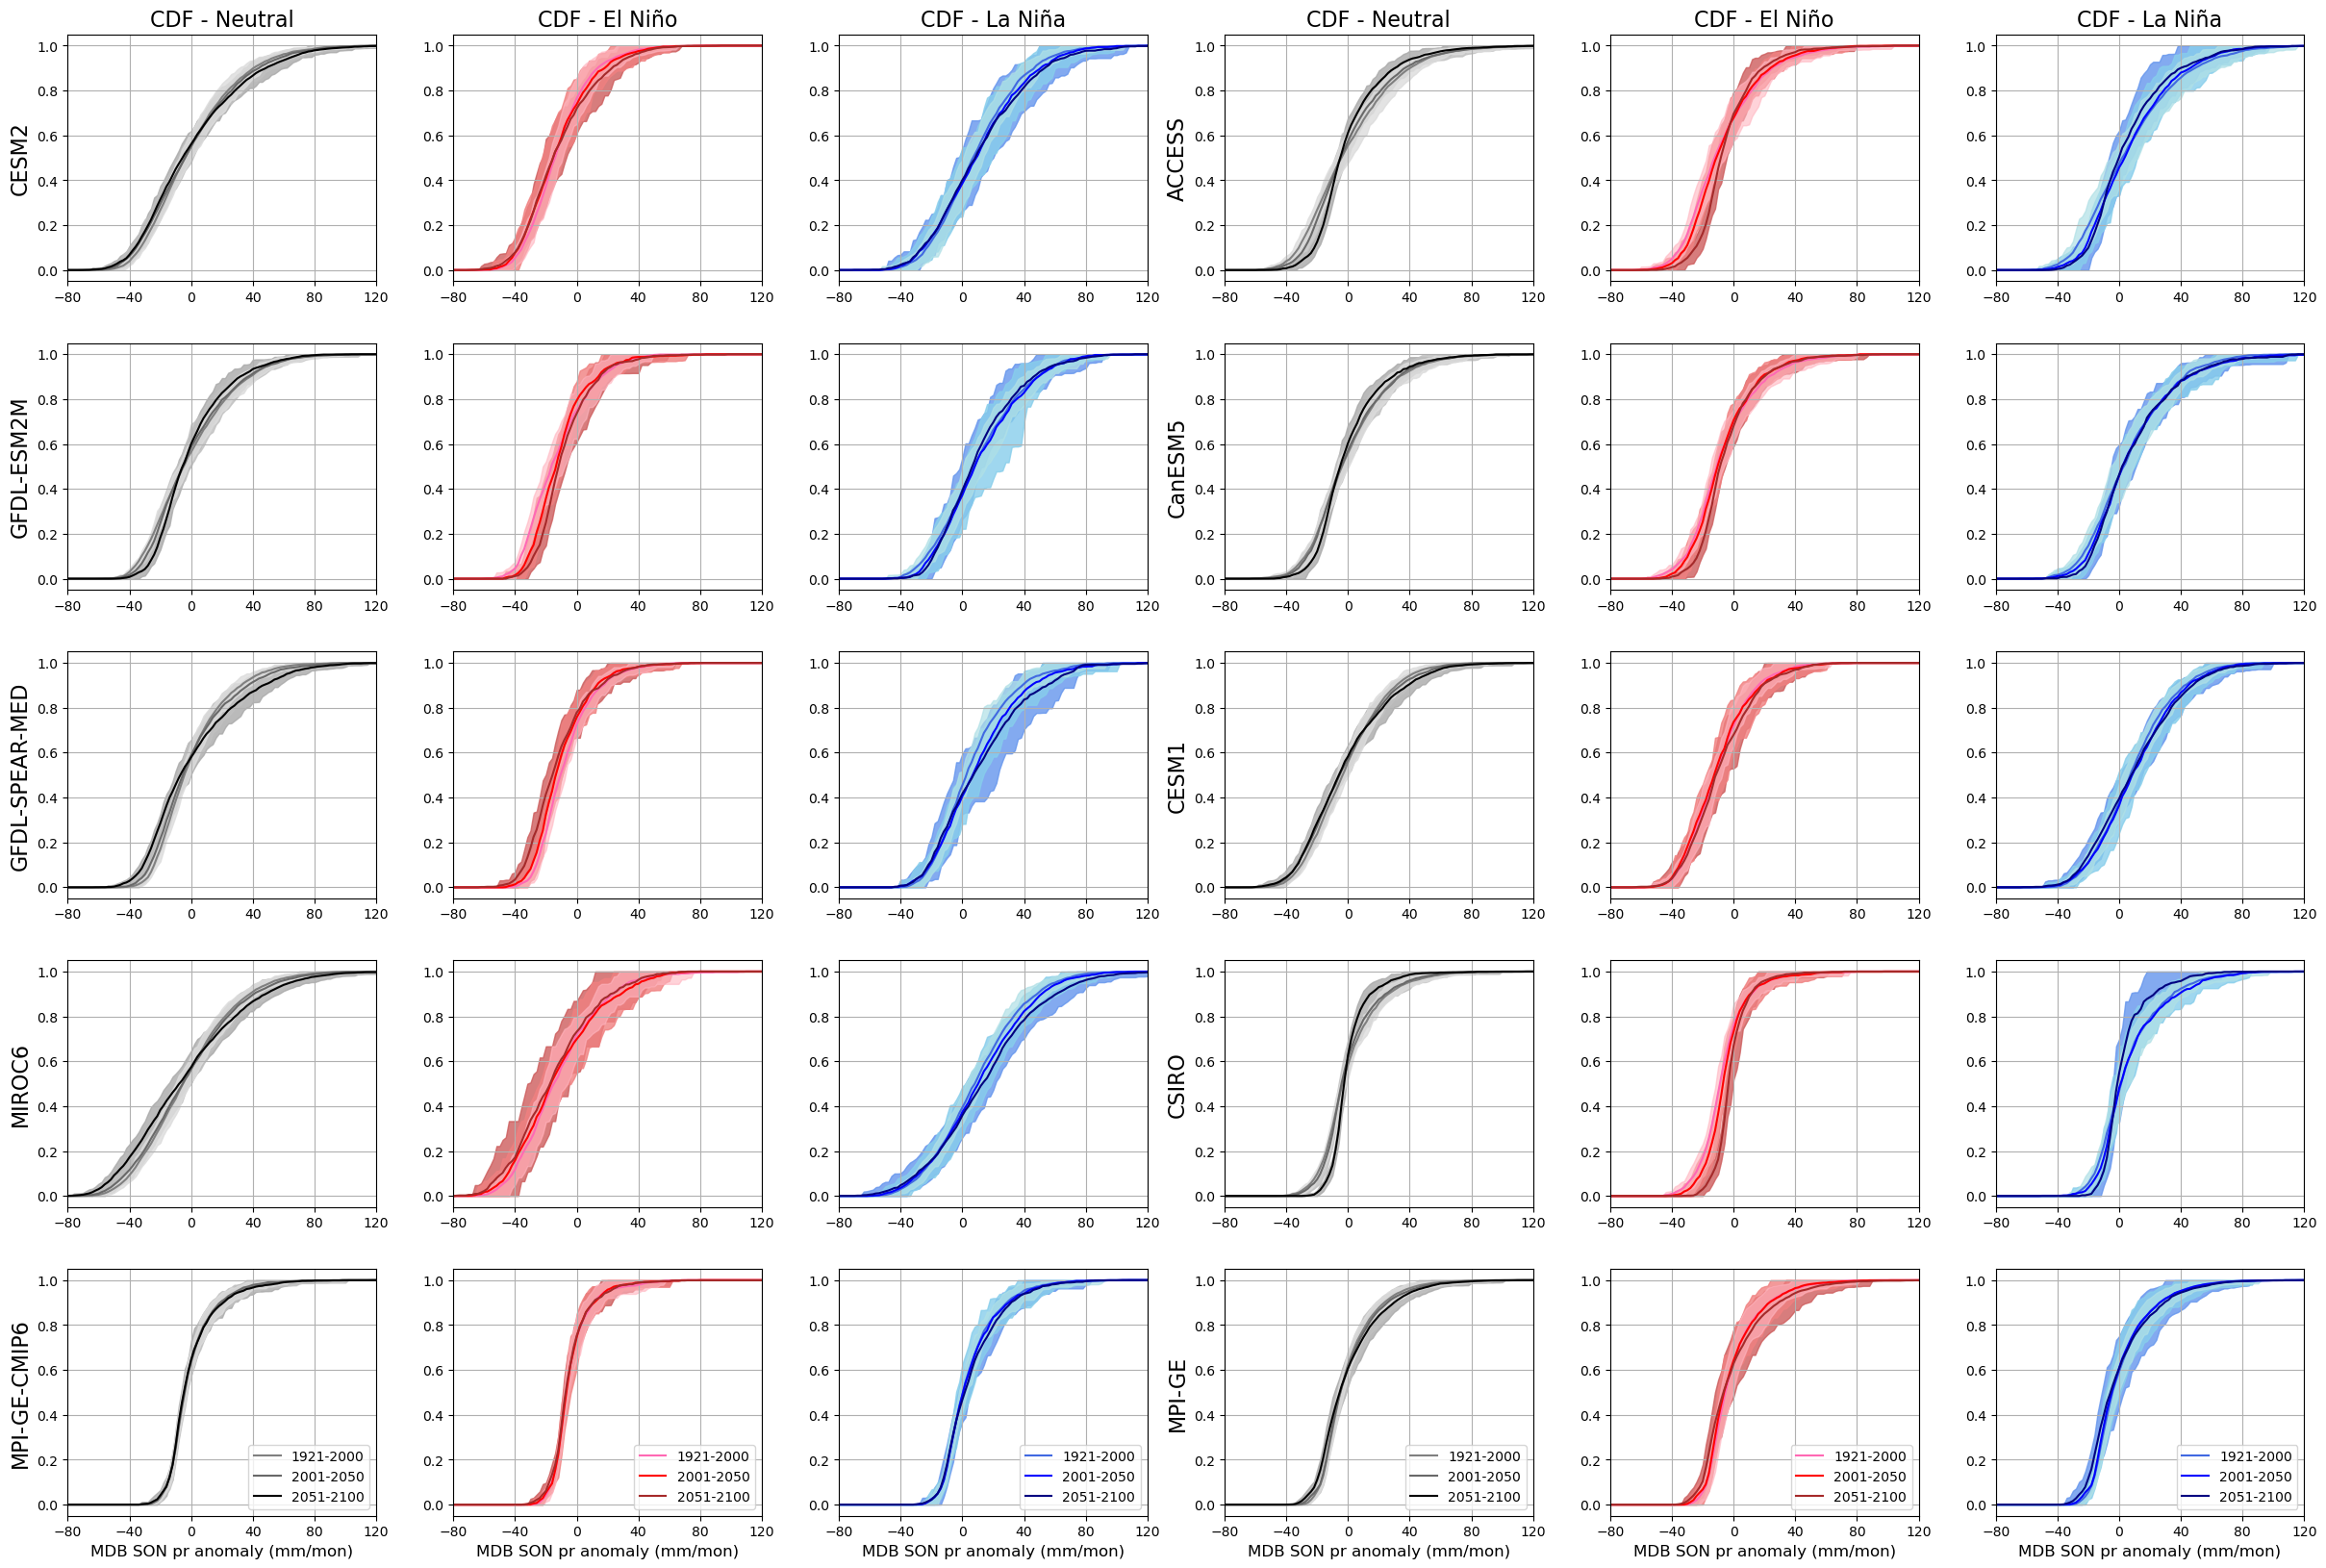

In [113]:
fig, axes = plt.subplots(5, 6, figsize=(30,20))
cdf_plot_same_enso(axes[0,0:3], 'CESM2', [' ',' ',' '], x_precip_general, res_MDB_precip_CESM2_N_mean_1921_2000_med, res_MDB_precip_CESM2_N_mean_2001_2050_med, res_MDB_precip_CESM2_N_mean_2051_2100_med, res_MDB_precip_CESM2_N_std_1921_2000_med, res_MDB_precip_CESM2_N_std_2001_2050_med, res_MDB_precip_CESM2_N_std_2051_2100_med,\
                       res_MDB_precip_CESM2_EN_mean_1921_2000_med, res_MDB_precip_CESM2_EN_mean_2001_2050_med, res_MDB_precip_CESM2_EN_mean_2051_2100_med, res_MDB_precip_CESM2_EN_std_1921_2000_med, res_MDB_precip_CESM2_EN_std_2001_2050_med, res_MDB_precip_CESM2_EN_std_2051_2100_med,\
                       res_MDB_precip_CESM2_LN_mean_1921_2000_med, res_MDB_precip_CESM2_LN_mean_2001_2050_med, res_MDB_precip_CESM2_LN_mean_2051_2100_med, res_MDB_precip_CESM2_LN_std_1921_2000_med, res_MDB_precip_CESM2_LN_std_2001_2050_med, res_MDB_precip_CESM2_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[1,0:3], 'GFDL-ESM2M', [' ',' ',' '], x_precip_general, res_MDB_precip_GFDL_E_N_mean_1921_2000_med, res_MDB_precip_GFDL_E_N_mean_2001_2050_med, res_MDB_precip_GFDL_E_N_mean_2051_2100_med, res_MDB_precip_GFDL_E_N_std_1921_2000_med, res_MDB_precip_GFDL_E_N_std_2001_2050_med, res_MDB_precip_GFDL_E_N_std_2051_2100_med,\
                       res_MDB_precip_GFDL_E_EN_mean_1921_2000_med, res_MDB_precip_GFDL_E_EN_mean_2001_2050_med, res_MDB_precip_GFDL_E_EN_mean_2051_2100_med, res_MDB_precip_GFDL_E_EN_std_1921_2000_med, res_MDB_precip_GFDL_E_EN_std_2001_2050_med, res_MDB_precip_GFDL_E_EN_std_2051_2100_med,\
                       res_MDB_precip_GFDL_E_LN_mean_1921_2000_med, res_MDB_precip_GFDL_E_LN_mean_2001_2050_med, res_MDB_precip_GFDL_E_LN_mean_2051_2100_med, res_MDB_precip_GFDL_E_LN_std_1921_2000_med, res_MDB_precip_GFDL_E_LN_std_2001_2050_med, res_MDB_precip_GFDL_E_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[2,0:3], 'GFDL-SPEAR-MED', [' ',' ',' '], x_precip_general, res_MDB_precip_GFDL_N_mean_1921_2000_med, res_MDB_precip_GFDL_N_mean_2001_2050_med, res_MDB_precip_GFDL_N_mean_2051_2100_med, res_MDB_precip_GFDL_N_std_1921_2000_med, res_MDB_precip_GFDL_N_std_2001_2050_med, res_MDB_precip_GFDL_N_std_2051_2100_med,\
                       res_MDB_precip_GFDL_EN_mean_1921_2000_med, res_MDB_precip_GFDL_EN_mean_2001_2050_med, res_MDB_precip_GFDL_EN_mean_2051_2100_med, res_MDB_precip_GFDL_EN_std_1921_2000_med, res_MDB_precip_GFDL_EN_std_2001_2050_med, res_MDB_precip_GFDL_EN_std_2051_2100_med,\
                       res_MDB_precip_GFDL_LN_mean_1921_2000_med, res_MDB_precip_GFDL_LN_mean_2001_2050_med, res_MDB_precip_GFDL_LN_mean_2051_2100_med, res_MDB_precip_GFDL_LN_std_1921_2000_med, res_MDB_precip_GFDL_LN_std_2001_2050_med, res_MDB_precip_GFDL_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[3,0:3], 'MIROC6', [' ',' ',' '], x_precip_general, res_MDB_precip_MIROC6_N_mean_1921_2000_med, res_MDB_precip_MIROC6_N_mean_2001_2050_med, res_MDB_precip_MIROC6_N_mean_2051_2100_med, res_MDB_precip_MIROC6_N_std_1921_2000_med, res_MDB_precip_MIROC6_N_std_2001_2050_med, res_MDB_precip_MIROC6_N_std_2051_2100_med,\
                       res_MDB_precip_MIROC6_EN_mean_1921_2000_med, res_MDB_precip_MIROC6_EN_mean_2001_2050_med, res_MDB_precip_MIROC6_EN_mean_2051_2100_med, res_MDB_precip_MIROC6_EN_std_1921_2000_med, res_MDB_precip_MIROC6_EN_std_2001_2050_med, res_MDB_precip_MIROC6_EN_std_2051_2100_med,\
                       res_MDB_precip_MIROC6_LN_mean_1921_2000_med, res_MDB_precip_MIROC6_LN_mean_2001_2050_med, res_MDB_precip_MIROC6_LN_mean_2051_2100_med, res_MDB_precip_MIROC6_LN_std_1921_2000_med, res_MDB_precip_MIROC6_LN_std_2001_2050_med, res_MDB_precip_MIROC6_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[4,0:3], 'MPI-GE-CMIP6', [' ',' ',' '], x_precip_general, res_MDB_precip_MPI_GE_CMIP6_N_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_N_std_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_N_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_CMIP6_EN_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_CMIP6_LN_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_2051_2100_med, xlabel = True)

cdf_plot_same_enso(axes[0,3:6], 'ACCESS', [' ',' ',' '], x_precip_general, res_MDB_precip_ACCESS_N_mean_1921_2000_med, res_MDB_precip_ACCESS_N_mean_2001_2050_med, res_MDB_precip_ACCESS_N_mean_2051_2100_med, res_MDB_precip_ACCESS_N_std_1921_2000_med, res_MDB_precip_ACCESS_N_std_2001_2050_med, res_MDB_precip_ACCESS_N_std_2051_2100_med,\
                       res_MDB_precip_ACCESS_EN_mean_1921_2000_med, res_MDB_precip_ACCESS_EN_mean_2001_2050_med, res_MDB_precip_ACCESS_EN_mean_2051_2100_med, res_MDB_precip_ACCESS_EN_std_1921_2000_med, res_MDB_precip_ACCESS_EN_std_2001_2050_med, res_MDB_precip_ACCESS_EN_std_2051_2100_med,\
                       res_MDB_precip_ACCESS_LN_mean_1921_2000_med, res_MDB_precip_ACCESS_LN_mean_2001_2050_med, res_MDB_precip_ACCESS_LN_mean_2051_2100_med, res_MDB_precip_ACCESS_LN_std_1921_2000_med, res_MDB_precip_ACCESS_LN_std_2001_2050_med, res_MDB_precip_ACCESS_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[1,3:6], 'CanESM5', [' ',' ',' '], x_precip_general, res_MDB_precip_CanESM5_N_mean_1921_2000_med, res_MDB_precip_CanESM5_N_mean_2001_2050_med, res_MDB_precip_CanESM5_N_mean_2051_2100_med, res_MDB_precip_CanESM5_N_std_1921_2000_med, res_MDB_precip_CanESM5_N_std_2001_2050_med, res_MDB_precip_CanESM5_N_std_2051_2100_med,\
                       res_MDB_precip_CanESM5_EN_mean_1921_2000_med, res_MDB_precip_CanESM5_EN_mean_2001_2050_med, res_MDB_precip_CanESM5_EN_mean_2051_2100_med, res_MDB_precip_CanESM5_EN_std_1921_2000_med, res_MDB_precip_CanESM5_EN_std_2001_2050_med, res_MDB_precip_CanESM5_EN_std_2051_2100_med,\
                       res_MDB_precip_CanESM5_LN_mean_1921_2000_med, res_MDB_precip_CanESM5_LN_mean_2001_2050_med, res_MDB_precip_CanESM5_LN_mean_2051_2100_med, res_MDB_precip_CanESM5_LN_std_1921_2000_med, res_MDB_precip_CanESM5_LN_std_2001_2050_med, res_MDB_precip_CanESM5_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[2,3:6], 'CESM1', [' ',' ',' '], x_precip_general, res_MDB_precip_CESM1_N_mean_1921_2000_med, res_MDB_precip_CESM1_N_mean_2001_2050_med, res_MDB_precip_CESM1_N_mean_2051_2100_med, res_MDB_precip_CESM1_N_std_1921_2000_med, res_MDB_precip_CESM1_N_std_2001_2050_med, res_MDB_precip_CESM1_N_std_2051_2100_med,\
                       res_MDB_precip_CESM1_EN_mean_1921_2000_med, res_MDB_precip_CESM1_EN_mean_2001_2050_med, res_MDB_precip_CESM1_EN_mean_2051_2100_med, res_MDB_precip_CESM1_EN_std_1921_2000_med, res_MDB_precip_CESM1_EN_std_2001_2050_med, res_MDB_precip_CESM1_EN_std_2051_2100_med,\
                       res_MDB_precip_CESM1_LN_mean_1921_2000_med, res_MDB_precip_CESM1_LN_mean_2001_2050_med, res_MDB_precip_CESM1_LN_mean_2051_2100_med, res_MDB_precip_CESM1_LN_std_1921_2000_med, res_MDB_precip_CESM1_LN_std_2001_2050_med, res_MDB_precip_CESM1_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[3,3:6], 'CSIRO', [' ',' ',' '], x_precip_general, res_MDB_precip_CSIRO_N_mean_1921_2000_med, res_MDB_precip_CSIRO_N_mean_2001_2050_med, res_MDB_precip_CSIRO_N_mean_2051_2100_med, res_MDB_precip_CSIRO_N_std_1921_2000_med, res_MDB_precip_CSIRO_N_std_2001_2050_med, res_MDB_precip_CSIRO_N_std_2051_2100_med,\
                       res_MDB_precip_CSIRO_EN_mean_1921_2000_med, res_MDB_precip_CSIRO_EN_mean_2001_2050_med, res_MDB_precip_CSIRO_EN_mean_2051_2100_med, res_MDB_precip_CSIRO_EN_std_1921_2000_med, res_MDB_precip_CSIRO_EN_std_2001_2050_med, res_MDB_precip_CSIRO_EN_std_2051_2100_med,\
                       res_MDB_precip_CSIRO_LN_mean_1921_2000_med, res_MDB_precip_CSIRO_LN_mean_2001_2050_med, res_MDB_precip_CSIRO_LN_mean_2051_2100_med, res_MDB_precip_CSIRO_LN_std_1921_2000_med, res_MDB_precip_CSIRO_LN_std_2001_2050_med, res_MDB_precip_CSIRO_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[4,3:6], 'MPI-GE', [' ',' ',' '], x_precip_general, res_MDB_precip_MPI_GE_N_mean_1921_2000_med, res_MDB_precip_MPI_GE_N_mean_2001_2050_med, res_MDB_precip_MPI_GE_N_mean_2051_2100_med, res_MDB_precip_MPI_GE_N_std_1921_2000_med, res_MDB_precip_MPI_GE_N_std_2001_2050_med, res_MDB_precip_MPI_GE_N_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_EN_mean_1921_2000_med, res_MDB_precip_MPI_GE_EN_mean_2001_2050_med, res_MDB_precip_MPI_GE_EN_mean_2051_2100_med, res_MDB_precip_MPI_GE_EN_std_1921_2000_med, res_MDB_precip_MPI_GE_EN_std_2001_2050_med, res_MDB_precip_MPI_GE_EN_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_LN_mean_1921_2000_med, res_MDB_precip_MPI_GE_LN_mean_2001_2050_med, res_MDB_precip_MPI_GE_LN_mean_2051_2100_med, res_MDB_precip_MPI_GE_LN_std_1921_2000_med, res_MDB_precip_MPI_GE_LN_std_2001_2050_med, res_MDB_precip_MPI_GE_LN_std_2051_2100_med, xlabel = True)



axes[0,0].set_title('CDF - Neutral', fontsize = 16)
axes[0,1].set_title('CDF - El Niño', fontsize = 16)
axes[0,2].set_title('CDF - La Niña', fontsize = 16)
axes[0,3].set_title('CDF - Neutral', fontsize = 16)
axes[0,4].set_title('CDF - El Niño', fontsize = 16)
axes[0,5].set_title('CDF - La Niña', fontsize = 16)

for ii in range(6):
    axes[4,ii].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')

plt.subplots_adjust(wspace=0.25,hspace=0.25)

plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/FigS2_CDF_med_hor.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()

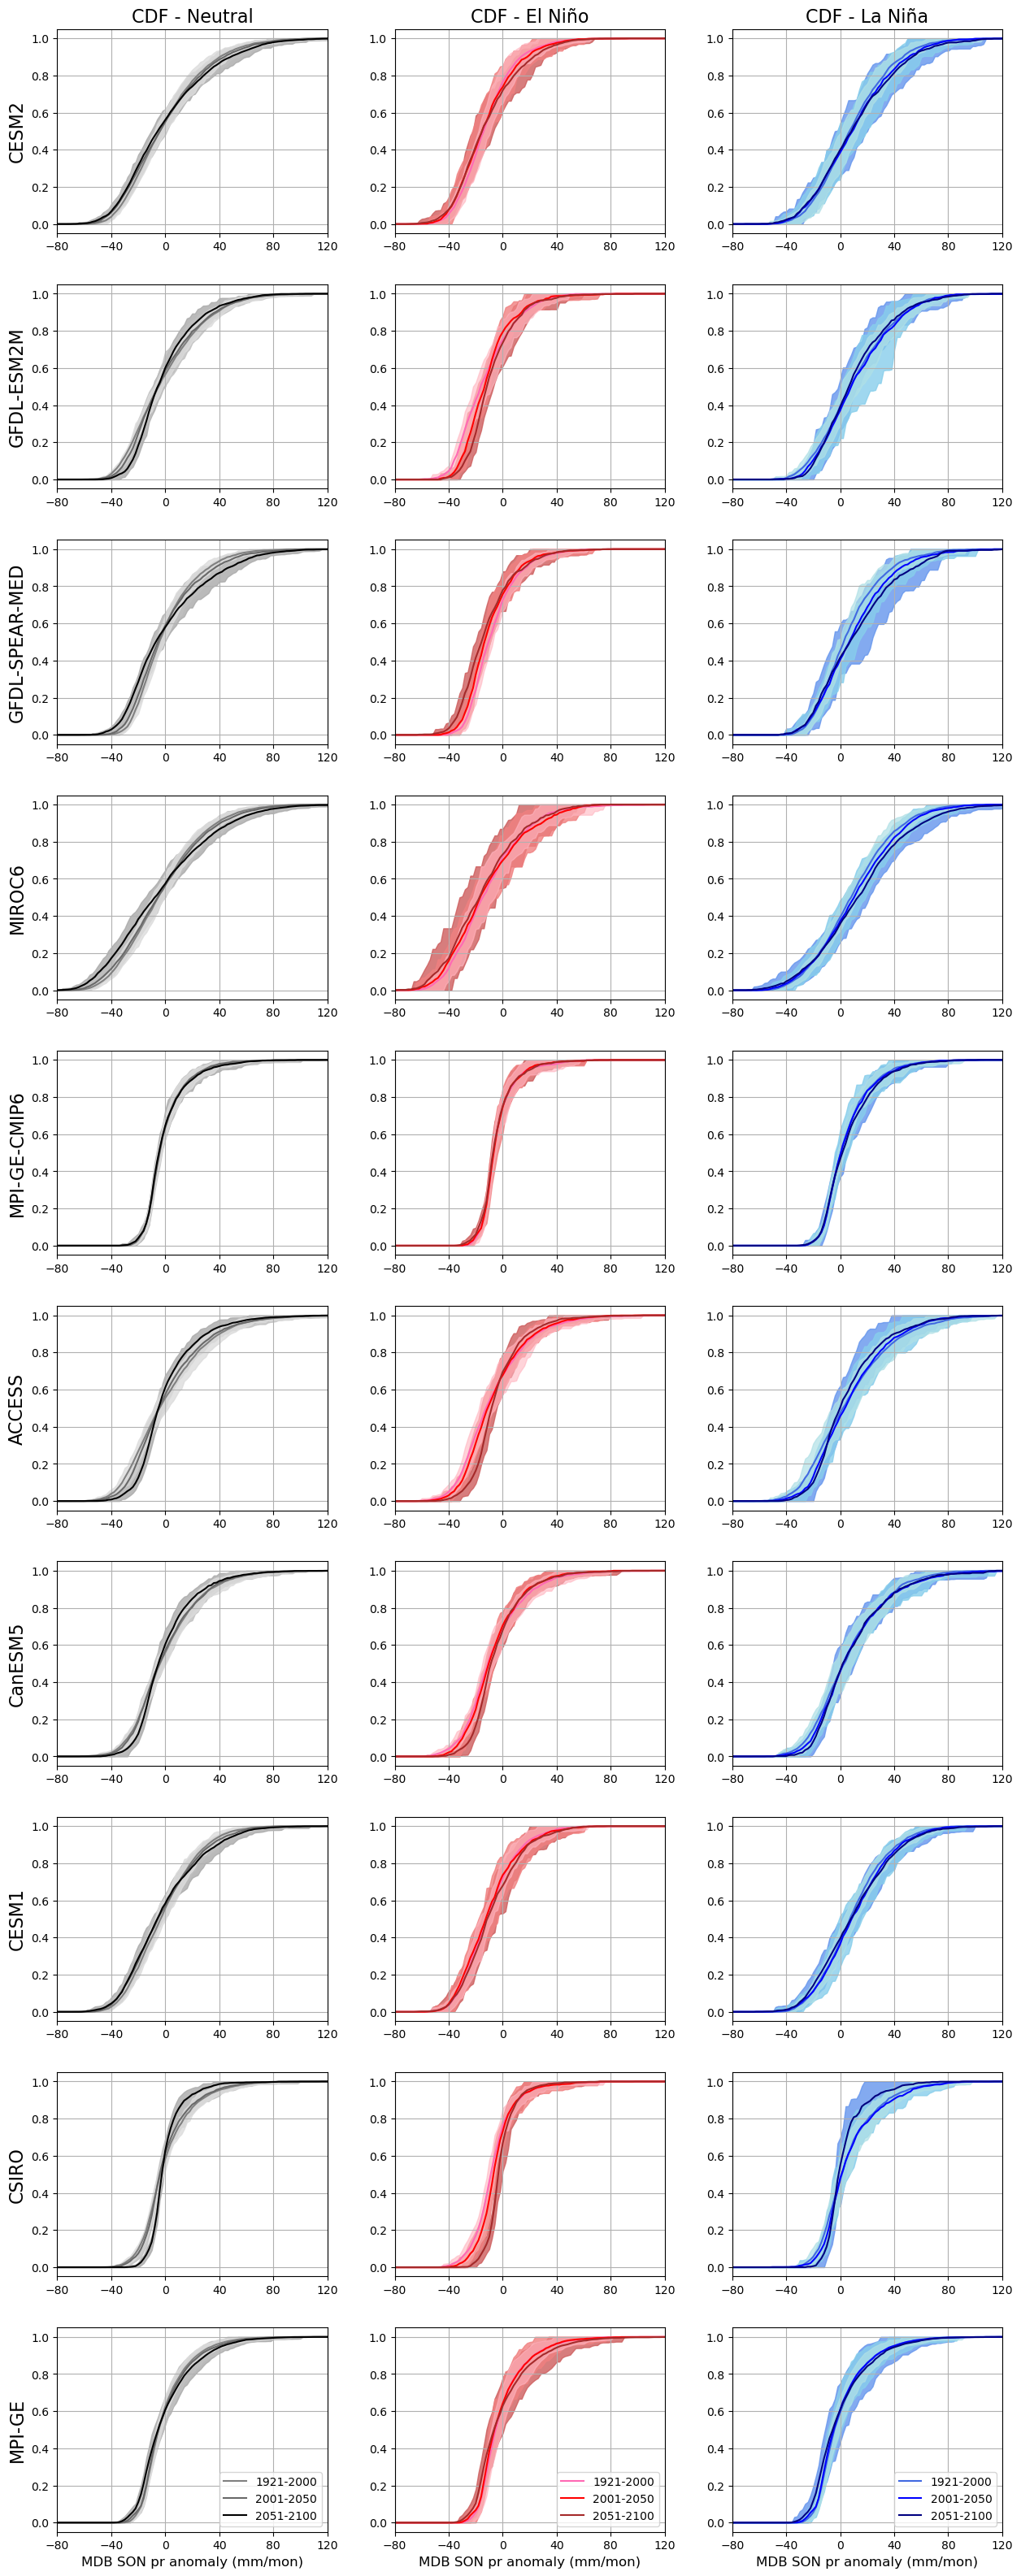

In [114]:
fig, axes = plt.subplots(10, 3, figsize=(15,40))
cdf_plot_same_enso(axes[0,0:3], 'CESM2', [' ',' ',' '], x_precip_general, res_MDB_precip_CESM2_N_mean_1921_2000_med, res_MDB_precip_CESM2_N_mean_2001_2050_med, res_MDB_precip_CESM2_N_mean_2051_2100_med, res_MDB_precip_CESM2_N_std_1921_2000_med, res_MDB_precip_CESM2_N_std_2001_2050_med, res_MDB_precip_CESM2_N_std_2051_2100_med,\
                       res_MDB_precip_CESM2_EN_mean_1921_2000_med, res_MDB_precip_CESM2_EN_mean_2001_2050_med, res_MDB_precip_CESM2_EN_mean_2051_2100_med, res_MDB_precip_CESM2_EN_std_1921_2000_med, res_MDB_precip_CESM2_EN_std_2001_2050_med, res_MDB_precip_CESM2_EN_std_2051_2100_med,\
                       res_MDB_precip_CESM2_LN_mean_1921_2000_med, res_MDB_precip_CESM2_LN_mean_2001_2050_med, res_MDB_precip_CESM2_LN_mean_2051_2100_med, res_MDB_precip_CESM2_LN_std_1921_2000_med, res_MDB_precip_CESM2_LN_std_2001_2050_med, res_MDB_precip_CESM2_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[1,0:3], 'GFDL-ESM2M', [' ',' ',' '], x_precip_general, res_MDB_precip_GFDL_E_N_mean_1921_2000_med, res_MDB_precip_GFDL_E_N_mean_2001_2050_med, res_MDB_precip_GFDL_E_N_mean_2051_2100_med, res_MDB_precip_GFDL_E_N_std_1921_2000_med, res_MDB_precip_GFDL_E_N_std_2001_2050_med, res_MDB_precip_GFDL_E_N_std_2051_2100_med,\
                       res_MDB_precip_GFDL_E_EN_mean_1921_2000_med, res_MDB_precip_GFDL_E_EN_mean_2001_2050_med, res_MDB_precip_GFDL_E_EN_mean_2051_2100_med, res_MDB_precip_GFDL_E_EN_std_1921_2000_med, res_MDB_precip_GFDL_E_EN_std_2001_2050_med, res_MDB_precip_GFDL_E_EN_std_2051_2100_med,\
                       res_MDB_precip_GFDL_E_LN_mean_1921_2000_med, res_MDB_precip_GFDL_E_LN_mean_2001_2050_med, res_MDB_precip_GFDL_E_LN_mean_2051_2100_med, res_MDB_precip_GFDL_E_LN_std_1921_2000_med, res_MDB_precip_GFDL_E_LN_std_2001_2050_med, res_MDB_precip_GFDL_E_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[2,0:3], 'GFDL-SPEAR-MED', [' ',' ',' '], x_precip_general, res_MDB_precip_GFDL_N_mean_1921_2000_med, res_MDB_precip_GFDL_N_mean_2001_2050_med, res_MDB_precip_GFDL_N_mean_2051_2100_med, res_MDB_precip_GFDL_N_std_1921_2000_med, res_MDB_precip_GFDL_N_std_2001_2050_med, res_MDB_precip_GFDL_N_std_2051_2100_med,\
                       res_MDB_precip_GFDL_EN_mean_1921_2000_med, res_MDB_precip_GFDL_EN_mean_2001_2050_med, res_MDB_precip_GFDL_EN_mean_2051_2100_med, res_MDB_precip_GFDL_EN_std_1921_2000_med, res_MDB_precip_GFDL_EN_std_2001_2050_med, res_MDB_precip_GFDL_EN_std_2051_2100_med,\
                       res_MDB_precip_GFDL_LN_mean_1921_2000_med, res_MDB_precip_GFDL_LN_mean_2001_2050_med, res_MDB_precip_GFDL_LN_mean_2051_2100_med, res_MDB_precip_GFDL_LN_std_1921_2000_med, res_MDB_precip_GFDL_LN_std_2001_2050_med, res_MDB_precip_GFDL_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[3,0:3], 'MIROC6', [' ',' ',' '], x_precip_general, res_MDB_precip_MIROC6_N_mean_1921_2000_med, res_MDB_precip_MIROC6_N_mean_2001_2050_med, res_MDB_precip_MIROC6_N_mean_2051_2100_med, res_MDB_precip_MIROC6_N_std_1921_2000_med, res_MDB_precip_MIROC6_N_std_2001_2050_med, res_MDB_precip_MIROC6_N_std_2051_2100_med,\
                       res_MDB_precip_MIROC6_EN_mean_1921_2000_med, res_MDB_precip_MIROC6_EN_mean_2001_2050_med, res_MDB_precip_MIROC6_EN_mean_2051_2100_med, res_MDB_precip_MIROC6_EN_std_1921_2000_med, res_MDB_precip_MIROC6_EN_std_2001_2050_med, res_MDB_precip_MIROC6_EN_std_2051_2100_med,\
                       res_MDB_precip_MIROC6_LN_mean_1921_2000_med, res_MDB_precip_MIROC6_LN_mean_2001_2050_med, res_MDB_precip_MIROC6_LN_mean_2051_2100_med, res_MDB_precip_MIROC6_LN_std_1921_2000_med, res_MDB_precip_MIROC6_LN_std_2001_2050_med, res_MDB_precip_MIROC6_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[4,0:3], 'MPI-GE-CMIP6', [' ',' ',' '], x_precip_general, res_MDB_precip_MPI_GE_CMIP6_N_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_N_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_N_std_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_N_std_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_N_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_CMIP6_EN_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_EN_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_EN_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_CMIP6_LN_mean_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_LN_mean_2051_2100_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_1921_2000_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_2001_2050_med, res_MDB_precip_MPI_GE_CMIP6_LN_std_2051_2100_med)

cdf_plot_same_enso(axes[5,0:3], 'ACCESS', [' ',' ',' '], x_precip_general, res_MDB_precip_ACCESS_N_mean_1921_2000_med, res_MDB_precip_ACCESS_N_mean_2001_2050_med, res_MDB_precip_ACCESS_N_mean_2051_2100_med, res_MDB_precip_ACCESS_N_std_1921_2000_med, res_MDB_precip_ACCESS_N_std_2001_2050_med, res_MDB_precip_ACCESS_N_std_2051_2100_med,\
                       res_MDB_precip_ACCESS_EN_mean_1921_2000_med, res_MDB_precip_ACCESS_EN_mean_2001_2050_med, res_MDB_precip_ACCESS_EN_mean_2051_2100_med, res_MDB_precip_ACCESS_EN_std_1921_2000_med, res_MDB_precip_ACCESS_EN_std_2001_2050_med, res_MDB_precip_ACCESS_EN_std_2051_2100_med,\
                       res_MDB_precip_ACCESS_LN_mean_1921_2000_med, res_MDB_precip_ACCESS_LN_mean_2001_2050_med, res_MDB_precip_ACCESS_LN_mean_2051_2100_med, res_MDB_precip_ACCESS_LN_std_1921_2000_med, res_MDB_precip_ACCESS_LN_std_2001_2050_med, res_MDB_precip_ACCESS_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[6,0:3], 'CanESM5', [' ',' ',' '], x_precip_general, res_MDB_precip_CanESM5_N_mean_1921_2000_med, res_MDB_precip_CanESM5_N_mean_2001_2050_med, res_MDB_precip_CanESM5_N_mean_2051_2100_med, res_MDB_precip_CanESM5_N_std_1921_2000_med, res_MDB_precip_CanESM5_N_std_2001_2050_med, res_MDB_precip_CanESM5_N_std_2051_2100_med,\
                       res_MDB_precip_CanESM5_EN_mean_1921_2000_med, res_MDB_precip_CanESM5_EN_mean_2001_2050_med, res_MDB_precip_CanESM5_EN_mean_2051_2100_med, res_MDB_precip_CanESM5_EN_std_1921_2000_med, res_MDB_precip_CanESM5_EN_std_2001_2050_med, res_MDB_precip_CanESM5_EN_std_2051_2100_med,\
                       res_MDB_precip_CanESM5_LN_mean_1921_2000_med, res_MDB_precip_CanESM5_LN_mean_2001_2050_med, res_MDB_precip_CanESM5_LN_mean_2051_2100_med, res_MDB_precip_CanESM5_LN_std_1921_2000_med, res_MDB_precip_CanESM5_LN_std_2001_2050_med, res_MDB_precip_CanESM5_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[7,0:3], 'CESM1', [' ',' ',' '], x_precip_general, res_MDB_precip_CESM1_N_mean_1921_2000_med, res_MDB_precip_CESM1_N_mean_2001_2050_med, res_MDB_precip_CESM1_N_mean_2051_2100_med, res_MDB_precip_CESM1_N_std_1921_2000_med, res_MDB_precip_CESM1_N_std_2001_2050_med, res_MDB_precip_CESM1_N_std_2051_2100_med,\
                       res_MDB_precip_CESM1_EN_mean_1921_2000_med, res_MDB_precip_CESM1_EN_mean_2001_2050_med, res_MDB_precip_CESM1_EN_mean_2051_2100_med, res_MDB_precip_CESM1_EN_std_1921_2000_med, res_MDB_precip_CESM1_EN_std_2001_2050_med, res_MDB_precip_CESM1_EN_std_2051_2100_med,\
                       res_MDB_precip_CESM1_LN_mean_1921_2000_med, res_MDB_precip_CESM1_LN_mean_2001_2050_med, res_MDB_precip_CESM1_LN_mean_2051_2100_med, res_MDB_precip_CESM1_LN_std_1921_2000_med, res_MDB_precip_CESM1_LN_std_2001_2050_med, res_MDB_precip_CESM1_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[8,0:3], 'CSIRO', [' ',' ',' '], x_precip_general, res_MDB_precip_CSIRO_N_mean_1921_2000_med, res_MDB_precip_CSIRO_N_mean_2001_2050_med, res_MDB_precip_CSIRO_N_mean_2051_2100_med, res_MDB_precip_CSIRO_N_std_1921_2000_med, res_MDB_precip_CSIRO_N_std_2001_2050_med, res_MDB_precip_CSIRO_N_std_2051_2100_med,\
                       res_MDB_precip_CSIRO_EN_mean_1921_2000_med, res_MDB_precip_CSIRO_EN_mean_2001_2050_med, res_MDB_precip_CSIRO_EN_mean_2051_2100_med, res_MDB_precip_CSIRO_EN_std_1921_2000_med, res_MDB_precip_CSIRO_EN_std_2001_2050_med, res_MDB_precip_CSIRO_EN_std_2051_2100_med,\
                       res_MDB_precip_CSIRO_LN_mean_1921_2000_med, res_MDB_precip_CSIRO_LN_mean_2001_2050_med, res_MDB_precip_CSIRO_LN_mean_2051_2100_med, res_MDB_precip_CSIRO_LN_std_1921_2000_med, res_MDB_precip_CSIRO_LN_std_2001_2050_med, res_MDB_precip_CSIRO_LN_std_2051_2100_med)
cdf_plot_same_enso(axes[9,0:3], 'MPI-GE', [' ',' ',' '], x_precip_general, res_MDB_precip_MPI_GE_N_mean_1921_2000_med, res_MDB_precip_MPI_GE_N_mean_2001_2050_med, res_MDB_precip_MPI_GE_N_mean_2051_2100_med, res_MDB_precip_MPI_GE_N_std_1921_2000_med, res_MDB_precip_MPI_GE_N_std_2001_2050_med, res_MDB_precip_MPI_GE_N_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_EN_mean_1921_2000_med, res_MDB_precip_MPI_GE_EN_mean_2001_2050_med, res_MDB_precip_MPI_GE_EN_mean_2051_2100_med, res_MDB_precip_MPI_GE_EN_std_1921_2000_med, res_MDB_precip_MPI_GE_EN_std_2001_2050_med, res_MDB_precip_MPI_GE_EN_std_2051_2100_med,\
                       res_MDB_precip_MPI_GE_LN_mean_1921_2000_med, res_MDB_precip_MPI_GE_LN_mean_2001_2050_med, res_MDB_precip_MPI_GE_LN_mean_2051_2100_med, res_MDB_precip_MPI_GE_LN_std_1921_2000_med, res_MDB_precip_MPI_GE_LN_std_2001_2050_med, res_MDB_precip_MPI_GE_LN_std_2051_2100_med, xlabel = True)



axes[0,0].set_title('CDF - Neutral', fontsize = 16)
axes[0,1].set_title('CDF - El Niño', fontsize = 16)
axes[0,2].set_title('CDF - La Niña', fontsize = 16)

for ii in range(3):
    axes[9,ii].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')

plt.subplots_adjust(wspace=0.25,hspace=0.25)

plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/FigS2_CDF_med_ver.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()

### Figure S3: CDF-FAR-RR plots for other 5 models

In [92]:
# ACCESS

MDB_ACCESS_SON_FAR_EN_1921_2000, MDB_ACCESS_SON_FAR_LN_1921_2000, MDB_ACCESS_SON_RR_EN_1921_2000, MDB_ACCESS_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_ACCESS, MDB_precip_ACCESS_SON_N_1921_2000, MDB_precip_ACCESS_SON_EN_1921_2000, MDB_precip_ACCESS_SON_LN_1921_2000)
MDB_ACCESS_SON_FAR_EN_2001_2050, MDB_ACCESS_SON_FAR_LN_2001_2050, MDB_ACCESS_SON_RR_EN_2001_2050, MDB_ACCESS_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_ACCESS, MDB_precip_ACCESS_SON_N_2001_2050, MDB_precip_ACCESS_SON_EN_2001_2050, MDB_precip_ACCESS_SON_LN_2001_2050)
MDB_ACCESS_SON_FAR_EN_2051_2100, MDB_ACCESS_SON_FAR_LN_2051_2100, MDB_ACCESS_SON_RR_EN_2051_2100, MDB_ACCESS_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_ACCESS, MDB_precip_ACCESS_SON_N_2051_2100, MDB_precip_ACCESS_SON_EN_2051_2100, MDB_precip_ACCESS_SON_LN_2051_2100)

In [93]:
# CanESM5

MDB_CanESM5_SON_FAR_EN_1921_2000, MDB_CanESM5_SON_FAR_LN_1921_2000, MDB_CanESM5_SON_RR_EN_1921_2000, MDB_CanESM5_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_CanESM5, MDB_precip_CanESM5_SON_N_1921_2000, MDB_precip_CanESM5_SON_EN_1921_2000, MDB_precip_CanESM5_SON_LN_1921_2000)
MDB_CanESM5_SON_FAR_EN_2001_2050, MDB_CanESM5_SON_FAR_LN_2001_2050, MDB_CanESM5_SON_RR_EN_2001_2050, MDB_CanESM5_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_CanESM5, MDB_precip_CanESM5_SON_N_2001_2050, MDB_precip_CanESM5_SON_EN_2001_2050, MDB_precip_CanESM5_SON_LN_2001_2050)
MDB_CanESM5_SON_FAR_EN_2051_2100, MDB_CanESM5_SON_FAR_LN_2051_2100, MDB_CanESM5_SON_RR_EN_2051_2100, MDB_CanESM5_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_CanESM5, MDB_precip_CanESM5_SON_N_2051_2100, MDB_precip_CanESM5_SON_EN_2051_2100, MDB_precip_CanESM5_SON_LN_2051_2100)

In [94]:
# CESM1

MDB_CESM1_SON_FAR_EN_1921_2000, MDB_CESM1_SON_FAR_LN_1921_2000, MDB_CESM1_SON_RR_EN_1921_2000, MDB_CESM1_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_CESM1, MDB_precip_CESM1_SON_N_1921_2000, MDB_precip_CESM1_SON_EN_1921_2000, MDB_precip_CESM1_SON_LN_1921_2000)
MDB_CESM1_SON_FAR_EN_2001_2050, MDB_CESM1_SON_FAR_LN_2001_2050, MDB_CESM1_SON_RR_EN_2001_2050, MDB_CESM1_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_CESM1, MDB_precip_CESM1_SON_N_2001_2050, MDB_precip_CESM1_SON_EN_2001_2050, MDB_precip_CESM1_SON_LN_2001_2050)
MDB_CESM1_SON_FAR_EN_2051_2100, MDB_CESM1_SON_FAR_LN_2051_2100, MDB_CESM1_SON_RR_EN_2051_2100, MDB_CESM1_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_CESM1, MDB_precip_CESM1_SON_N_2051_2100, MDB_precip_CESM1_SON_EN_2051_2100, MDB_precip_CESM1_SON_LN_2051_2100)

In [95]:
# CSIRO

MDB_CSIRO_SON_FAR_EN_1921_2000, MDB_CSIRO_SON_FAR_LN_1921_2000, MDB_CSIRO_SON_RR_EN_1921_2000, MDB_CSIRO_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_CSIRO, MDB_precip_CSIRO_SON_N_1921_2000, MDB_precip_CSIRO_SON_EN_1921_2000, MDB_precip_CSIRO_SON_LN_1921_2000)
MDB_CSIRO_SON_FAR_EN_2001_2050, MDB_CSIRO_SON_FAR_LN_2001_2050, MDB_CSIRO_SON_RR_EN_2001_2050, MDB_CSIRO_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_CSIRO, MDB_precip_CSIRO_SON_N_2001_2050, MDB_precip_CSIRO_SON_EN_2001_2050, MDB_precip_CSIRO_SON_LN_2001_2050)
MDB_CSIRO_SON_FAR_EN_2051_2100, MDB_CSIRO_SON_FAR_LN_2051_2100, MDB_CSIRO_SON_RR_EN_2051_2100, MDB_CSIRO_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_CSIRO, MDB_precip_CSIRO_SON_N_2051_2100, MDB_precip_CSIRO_SON_EN_2051_2100, MDB_precip_CSIRO_SON_LN_2051_2100)

In [96]:
# MPI_GE

MDB_MPI_GE_SON_FAR_EN_1921_2000, MDB_MPI_GE_SON_FAR_LN_1921_2000, MDB_MPI_GE_SON_RR_EN_1921_2000, MDB_MPI_GE_SON_RR_LN_1921_2000 = FAR_RR_calculation(ens_num_MPI_GE, MDB_precip_MPI_GE_SON_N_1921_2000, MDB_precip_MPI_GE_SON_EN_1921_2000, MDB_precip_MPI_GE_SON_LN_1921_2000)
MDB_MPI_GE_SON_FAR_EN_2001_2050, MDB_MPI_GE_SON_FAR_LN_2001_2050, MDB_MPI_GE_SON_RR_EN_2001_2050, MDB_MPI_GE_SON_RR_LN_2001_2050 = FAR_RR_calculation(ens_num_MPI_GE, MDB_precip_MPI_GE_SON_N_2001_2050, MDB_precip_MPI_GE_SON_EN_2001_2050, MDB_precip_MPI_GE_SON_LN_2001_2050)
MDB_MPI_GE_SON_FAR_EN_2051_2100, MDB_MPI_GE_SON_FAR_LN_2051_2100, MDB_MPI_GE_SON_RR_EN_2051_2100, MDB_MPI_GE_SON_RR_LN_2051_2100 = FAR_RR_calculation(ens_num_MPI_GE, MDB_precip_MPI_GE_SON_N_2051_2100, MDB_precip_MPI_GE_SON_EN_2051_2100, MDB_precip_MPI_GE_SON_LN_2051_2100)

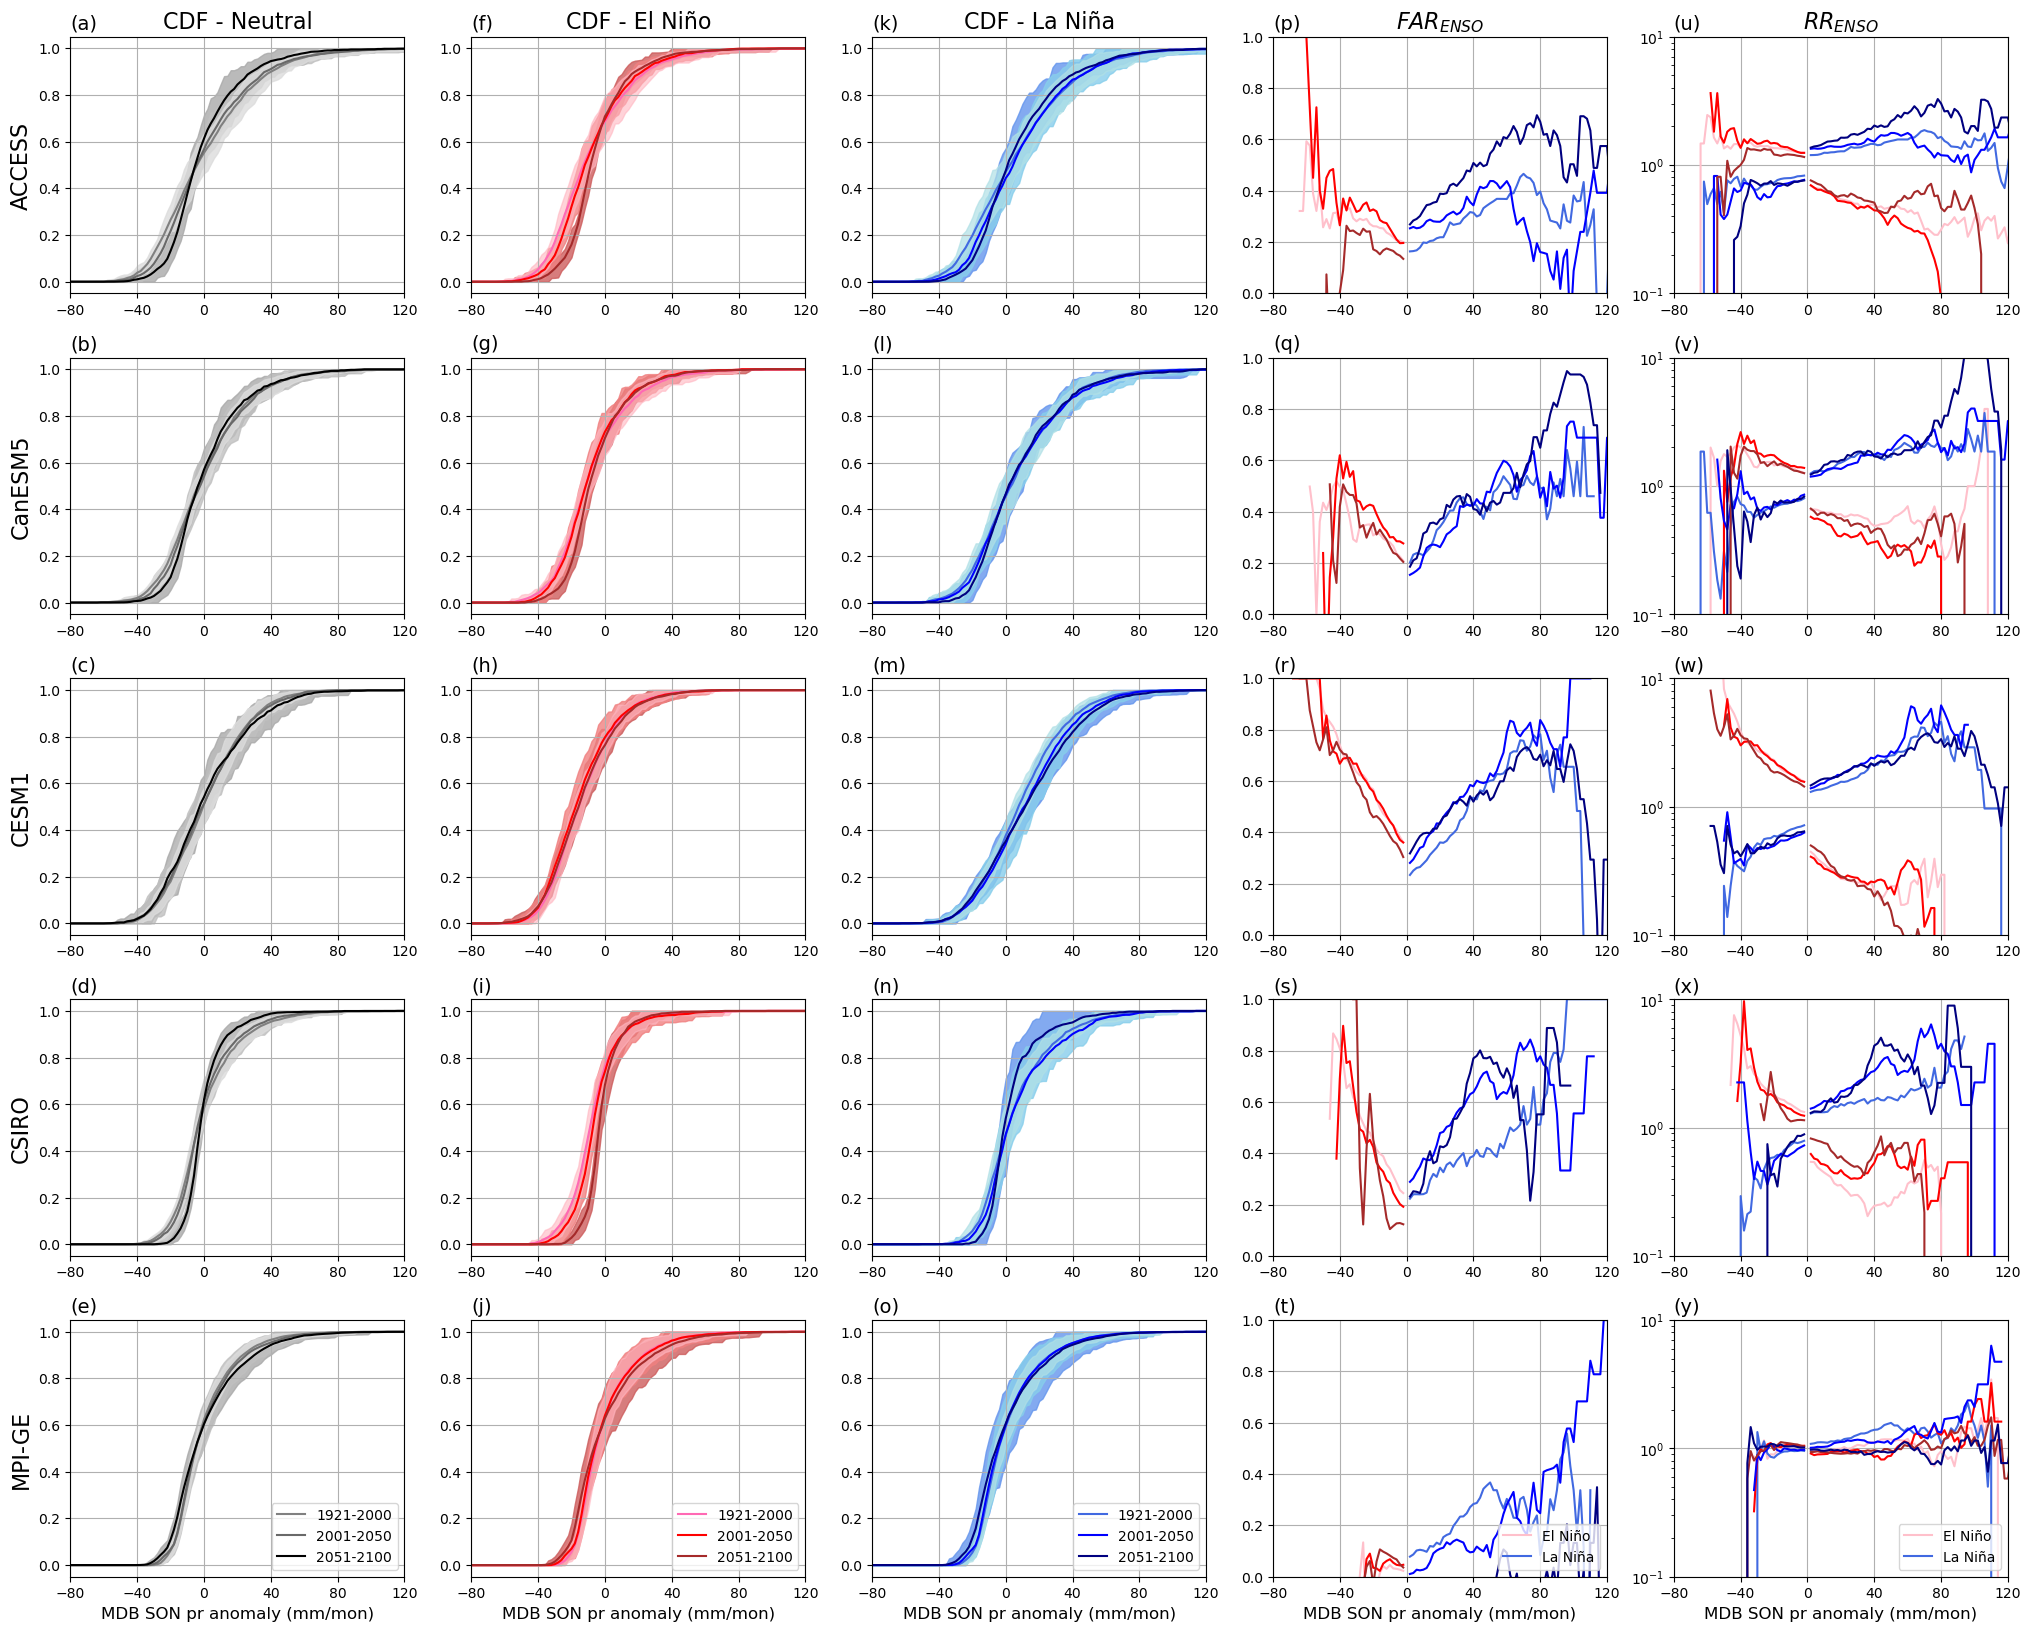

In [109]:
fig, axes = plt.subplots(5, 5, figsize=(25,20))
cdf_plot_same_enso(axes[0,0:3], 'ACCESS', ['(a)','(f)','(k)'], x_precip_general, res_MDB_precip_ACCESS_N_mean_1921_2000, res_MDB_precip_ACCESS_N_mean_2001_2050, res_MDB_precip_ACCESS_N_mean_2051_2100, res_MDB_precip_ACCESS_N_std_1921_2000, res_MDB_precip_ACCESS_N_std_2001_2050, res_MDB_precip_ACCESS_N_std_2051_2100,\
                       res_MDB_precip_ACCESS_EN_mean_1921_2000, res_MDB_precip_ACCESS_EN_mean_2001_2050, res_MDB_precip_ACCESS_EN_mean_2051_2100, res_MDB_precip_ACCESS_EN_std_1921_2000, res_MDB_precip_ACCESS_EN_std_2001_2050, res_MDB_precip_ACCESS_EN_std_2051_2100,\
                       res_MDB_precip_ACCESS_LN_mean_1921_2000, res_MDB_precip_ACCESS_LN_mean_2001_2050, res_MDB_precip_ACCESS_LN_mean_2051_2100, res_MDB_precip_ACCESS_LN_std_1921_2000, res_MDB_precip_ACCESS_LN_std_2001_2050, res_MDB_precip_ACCESS_LN_std_2051_2100)
cdf_plot_same_enso(axes[1,0:3], 'CanESM5', ['(b)','(g)','(l)'], x_precip_general, res_MDB_precip_CanESM5_N_mean_1921_2000, res_MDB_precip_CanESM5_N_mean_2001_2050, res_MDB_precip_CanESM5_N_mean_2051_2100, res_MDB_precip_CanESM5_N_std_1921_2000, res_MDB_precip_CanESM5_N_std_2001_2050, res_MDB_precip_CanESM5_N_std_2051_2100,\
                       res_MDB_precip_CanESM5_EN_mean_1921_2000, res_MDB_precip_CanESM5_EN_mean_2001_2050, res_MDB_precip_CanESM5_EN_mean_2051_2100, res_MDB_precip_CanESM5_EN_std_1921_2000, res_MDB_precip_CanESM5_EN_std_2001_2050, res_MDB_precip_CanESM5_EN_std_2051_2100,\
                       res_MDB_precip_CanESM5_LN_mean_1921_2000, res_MDB_precip_CanESM5_LN_mean_2001_2050, res_MDB_precip_CanESM5_LN_mean_2051_2100, res_MDB_precip_CanESM5_LN_std_1921_2000, res_MDB_precip_CanESM5_LN_std_2001_2050, res_MDB_precip_CanESM5_LN_std_2051_2100)
cdf_plot_same_enso(axes[2,0:3], 'CESM1', ['(c)','(h)','(m)'], x_precip_general, res_MDB_precip_CESM1_N_mean_1921_2000, res_MDB_precip_CESM1_N_mean_2001_2050, res_MDB_precip_CESM1_N_mean_2051_2100, res_MDB_precip_CESM1_N_std_1921_2000, res_MDB_precip_CESM1_N_std_2001_2050, res_MDB_precip_CESM1_N_std_2051_2100,\
                       res_MDB_precip_CESM1_EN_mean_1921_2000, res_MDB_precip_CESM1_EN_mean_2001_2050, res_MDB_precip_CESM1_EN_mean_2051_2100, res_MDB_precip_CESM1_EN_std_1921_2000, res_MDB_precip_CESM1_EN_std_2001_2050, res_MDB_precip_CESM1_EN_std_2051_2100,\
                       res_MDB_precip_CESM1_LN_mean_1921_2000, res_MDB_precip_CESM1_LN_mean_2001_2050, res_MDB_precip_CESM1_LN_mean_2051_2100, res_MDB_precip_CESM1_LN_std_1921_2000, res_MDB_precip_CESM1_LN_std_2001_2050, res_MDB_precip_CESM1_LN_std_2051_2100)
cdf_plot_same_enso(axes[3,0:3], 'CSIRO', ['(d)','(i)','(n)'], x_precip_general, res_MDB_precip_CSIRO_N_mean_1921_2000, res_MDB_precip_CSIRO_N_mean_2001_2050, res_MDB_precip_CSIRO_N_mean_2051_2100, res_MDB_precip_CSIRO_N_std_1921_2000, res_MDB_precip_CSIRO_N_std_2001_2050, res_MDB_precip_CSIRO_N_std_2051_2100,\
                       res_MDB_precip_CSIRO_EN_mean_1921_2000, res_MDB_precip_CSIRO_EN_mean_2001_2050, res_MDB_precip_CSIRO_EN_mean_2051_2100, res_MDB_precip_CSIRO_EN_std_1921_2000, res_MDB_precip_CSIRO_EN_std_2001_2050, res_MDB_precip_CSIRO_EN_std_2051_2100,\
                       res_MDB_precip_CSIRO_LN_mean_1921_2000, res_MDB_precip_CSIRO_LN_mean_2001_2050, res_MDB_precip_CSIRO_LN_mean_2051_2100, res_MDB_precip_CSIRO_LN_std_1921_2000, res_MDB_precip_CSIRO_LN_std_2001_2050, res_MDB_precip_CSIRO_LN_std_2051_2100)
cdf_plot_same_enso(axes[4,0:3], 'MPI-GE', ['(e)','(j)','(o)'], x_precip_general, res_MDB_precip_MPI_GE_N_mean_1921_2000, res_MDB_precip_MPI_GE_N_mean_2001_2050, res_MDB_precip_MPI_GE_N_mean_2051_2100, res_MDB_precip_MPI_GE_N_std_1921_2000, res_MDB_precip_MPI_GE_N_std_2001_2050, res_MDB_precip_MPI_GE_N_std_2051_2100,\
                       res_MDB_precip_MPI_GE_EN_mean_1921_2000, res_MDB_precip_MPI_GE_EN_mean_2001_2050, res_MDB_precip_MPI_GE_EN_mean_2051_2100, res_MDB_precip_MPI_GE_EN_std_1921_2000, res_MDB_precip_MPI_GE_EN_std_2001_2050, res_MDB_precip_MPI_GE_EN_std_2051_2100,\
                       res_MDB_precip_MPI_GE_LN_mean_1921_2000, res_MDB_precip_MPI_GE_LN_mean_2001_2050, res_MDB_precip_MPI_GE_LN_mean_2051_2100, res_MDB_precip_MPI_GE_LN_std_1921_2000, res_MDB_precip_MPI_GE_LN_std_2001_2050, res_MDB_precip_MPI_GE_LN_std_2051_2100, xlabel = True)

plot_FAR_RR(axes[0,3:5], ['(p)','(u)'], MDB_ACCESS_SON_FAR_EN_1921_2000, MDB_ACCESS_SON_FAR_LN_1921_2000, MDB_ACCESS_SON_FAR_EN_2001_2050, MDB_ACCESS_SON_FAR_LN_2001_2050, MDB_ACCESS_SON_FAR_EN_2051_2100, MDB_ACCESS_SON_FAR_LN_2051_2100,\
               MDB_ACCESS_SON_RR_EN_1921_2000, MDB_ACCESS_SON_RR_LN_1921_2000, MDB_ACCESS_SON_RR_EN_2001_2050, MDB_ACCESS_SON_RR_LN_2001_2050, MDB_ACCESS_SON_RR_EN_2051_2100, MDB_ACCESS_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[1,3:5], ['(q)','(v)'], MDB_CanESM5_SON_FAR_EN_1921_2000, MDB_CanESM5_SON_FAR_LN_1921_2000, MDB_CanESM5_SON_FAR_EN_2001_2050, MDB_CanESM5_SON_FAR_LN_2001_2050, MDB_CanESM5_SON_FAR_EN_2051_2100, MDB_CanESM5_SON_FAR_LN_2051_2100,\
               MDB_CanESM5_SON_RR_EN_1921_2000, MDB_CanESM5_SON_RR_LN_1921_2000, MDB_CanESM5_SON_RR_EN_2001_2050, MDB_CanESM5_SON_RR_LN_2001_2050, MDB_CanESM5_SON_RR_EN_2051_2100, MDB_CanESM5_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[2,3:5], ['(r)','(w)'], MDB_CESM1_SON_FAR_EN_1921_2000, MDB_CESM1_SON_FAR_LN_1921_2000, MDB_CESM1_SON_FAR_EN_2001_2050, MDB_CESM1_SON_FAR_LN_2001_2050, MDB_CESM1_SON_FAR_EN_2051_2100, MDB_CESM1_SON_FAR_LN_2051_2100,\
               MDB_CESM1_SON_RR_EN_1921_2000, MDB_CESM1_SON_RR_LN_1921_2000, MDB_CESM1_SON_RR_EN_2001_2050, MDB_CESM1_SON_RR_LN_2001_2050, MDB_CESM1_SON_RR_EN_2051_2100, MDB_CESM1_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[3,3:5], ['(s)','(x)'], MDB_CSIRO_SON_FAR_EN_1921_2000, MDB_CSIRO_SON_FAR_LN_1921_2000, MDB_CSIRO_SON_FAR_EN_2001_2050, MDB_CSIRO_SON_FAR_LN_2001_2050, MDB_CSIRO_SON_FAR_EN_2051_2100, MDB_CSIRO_SON_FAR_LN_2051_2100,\
               MDB_CSIRO_SON_RR_EN_1921_2000, MDB_CSIRO_SON_RR_LN_1921_2000, MDB_CSIRO_SON_RR_EN_2001_2050, MDB_CSIRO_SON_RR_LN_2001_2050, MDB_CSIRO_SON_RR_EN_2051_2100, MDB_CSIRO_SON_RR_LN_2051_2100,\
               xlabel = False)
plot_FAR_RR(axes[4,3:5], ['(t)','(y)'], MDB_MPI_GE_SON_FAR_EN_1921_2000, MDB_MPI_GE_SON_FAR_LN_1921_2000, MDB_MPI_GE_SON_FAR_EN_2001_2050, MDB_MPI_GE_SON_FAR_LN_2001_2050, MDB_MPI_GE_SON_FAR_EN_2051_2100, MDB_MPI_GE_SON_FAR_LN_2051_2100,\
               MDB_MPI_GE_SON_RR_EN_1921_2000, MDB_MPI_GE_SON_RR_LN_1921_2000, MDB_MPI_GE_SON_RR_EN_2001_2050, MDB_MPI_GE_SON_RR_LN_2001_2050, MDB_MPI_GE_SON_RR_EN_2051_2100, MDB_MPI_GE_SON_RR_LN_2051_2100,\
               xlabel = True)

axes[0,0].set_title('CDF - Neutral', fontsize = 16)
axes[0,1].set_title('CDF - El Niño', fontsize = 16)
axes[0,2].set_title('CDF - La Niña', fontsize = 16)
axes[0,3].set_title('$FAR_{ENSO}$', fontsize = 16)
axes[0,4].set_title('$RR_{ENSO}$', fontsize = 16)

axes[4,0].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')
axes[4,1].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')
axes[4,2].legend(['1921-2000','2001-2050','2051-2100'], loc = 'lower right')
axes[4,3].legend(['El Niño','La Niña'], loc = 'lower right')
axes[4,4].legend(['El Niño','La Niña'], loc = 'lower right')

plt.subplots_adjust(wspace=0.2,hspace=0.25)

plt.savefig('/g/data/x77/ah3693/Rainfall_risk_project/eps_figure/FigS3_other_5_model_CDF_FAR.eps', format='eps',bbox_inches="tight",dpi=700)

plt.show()